# DS 7331 Data Mining: Lab 3 iPython Notebook
### Created On: March 29, 2019
## Authors:  
               



## Table of Contents
- Business Understanding
- Import Modules
- Load Data

# Business Understanding 

The data set comes from pulsar candidates collected during the High Time Resolution Universe Survey (South) (HTRU2).

<b>Background</b><br>
A neutron star is a large mass star that is at the end of its stellar evolution.  At this time, the star has run out of fuel and collapsed post supernova (the mass of the original start is what determines if the star will end as a white dwarf, neutron star or black hole – in order of mass smallest to largest).   These stars begin as 1 to 3 solar masses but end as a neutron star as ~12.5 miles across.  Neutron stars do not generally emit enough electromagnetic radiation to be detected, which is why we search for pulsars.  Pulsars are neutron stars that are spinning fast enough to produce enough electromagnetic radiation for our telescopes to measure (nasa.gov). <br>
There are about 2600 pulsars currently known and almost all of them lie within our galaxy.  There are two kinds of pulsars – normal pulsars (having pulse speed 0.3 – 3 seconds) and millisecond pulsars (MSP, having a pulse period between 1mSec – 10 mSec). The pulse period is very stable and predictable, but not constant << kumar:  what’s the ref for this paragraph>>.
In order to detect pulsars, we look for the electromagnetic radiation that has cyclical pulses.  The best analogy is that a pulsar is like a lighthouse – the light is emitted at regular intervals that can be measured from a distance.  The HTRU2 study used radio telescopes to scan for wavelengths in that part of the electromagnetic spectrum to detect pulsars.

<b>Why detect pulsars?</b> <br> 
Pulsars are used as tools in many areas in physics and astrophysics.  The areas range from theories of gravity, cosmology, extrasolar planets, stellar evolution and galactic structure. <br>
<u>Theories of Gravity</u><br>
One reason the scientific community is trying to detect neutron stars is in order to study its gravitation forces.  Gravity is at the center of the theory of General Relativity.  If we prove or have prove conflicting theories to General Relativity, we gain better understanding of our solar system’s behavior (nrao.edu).<br>
<u>Cosmology</u><br>
Pulsars timing is used to understand cosmology.  Cosmology is the part of astronomy focused on studying the origin and birth of the universe. Gravitational background wave, left from big bang, systematically affects the pulsar timing of a millisecond pulsar. Currently pulsar is the only tool to understand cosmology.<br>
<u>Extrasolar Planets</u><br>
The first planets outside the solar system were discovered using pulsar timing.
<u>Stellar Evolution</u><br>
Stellar evolution describes the lifecycle of a star.  The more we understand about stellar evolution, the better we understand our Sun and its life.  During stellar evolution, some stars - based on their mass - reach the supernova state.  Supernova explosions are not spherically symmetric, but evidence is mounting, including the possibility of jetted gamma-ray bursts and hypernovae, that they are in fact asymmetric. Apart from evidence obtained from optical observations of very young supernovae, the strongest evidence comes from the observed pulsar velocities. <br>
<u>Galactic Structure</u><br>
The free electron component of the galactic interstellar medium is interacting with pulsar signals as it disperses the radio waves. The amount of dispersion is characterized by the dispersion measure DM. DM is used to understand the galactic structure.
(source : University of Manchester – Jodrell Bank Observatory)
<br>
<br>
<b>Specifics about this Pulsar data set</b><br>
The candidates for pulsar consideration are described the simple statistics (mean, standard deviation, skewness and kurtosis) of the probability distributions from the integrated profile and the DM-SNR curve.  <br>

<u>Integrated profile</u>:  Most candidates also include a copy of the integrated pulse profile (Lorimer and Kramer, 2005; Ghosh, 2007; Lorimer, 2008), which visually depicts a version of the signal averaged across all observed frequencies and time (see (C) in Figure 2.15)
<br>
<u>DM-SNR curve</u>:  the single curve used to describe the relationship between the DM and the SNR.  A candidate which achieves a peak SNR at a DM of zero, is therefore likely caused by local interference. A legitimate pulsar signal on the other hand will be dispersed, therefore its SNR should peak at a DM greater than zero (http://www.scienceguyrob.com/wp-content/uploads/2016/12/WhyArePulsarsHardToFind_Lyon_2016.pdf)

To further help understand the data or the measurements:<br>
<u>Kurotsis</u>: measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.  High kurtosis tend to have outliers, heavy tails, and low kurtosis tend to lack outliers, light tails (nist.gov).<br>
<u>Dispersion Measure (DM)</u>:  the measure of the delay (or propagation effects) in the pulse that was caused as the signal passed through the interstellar medium (jb.man.ac.uk).   DM is different for each frequency since they are dependent.<br>
<u>Signal-to-noise ratio (SNR)</u>:  the signal compared to the random noise in the environment.  Larger SNR implies a stronger signal that cannot be blocked out by noise.
<br>
<br>

#### What makes our algorithm good
The effectiveness of a good algorithm will be measured by << xxxx >>.  This method was chosen because << xxxx >>.

### Data Meaning Type
- **mean_intg** - Mean of the integrated profile.
- **sd_intg** - Standard deviation of the integrated profile. 
- **exc_kurt_intg** - Excess kurtosis of the integrated profile. 
- **skw_intg** - Skewness of the integrated profile. 
- **mean_dmsnr** - Mean of the DM-SNR curve.                               
- **sd_dmsnr** - Standard deviation of the DM-SNR curve. 
- **exc_kurt_dmsnr** - Excess kurtosis of the DM-SNR curve. 
- **skw_dmsnr** - Skewness of the DM-SNR curve. 
- **class** - class

### Import Modules

In [701]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

### Load Data

In [702]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/HTRU_2.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0

102.5078125,58.88243001,0.465318154,-0.515087909,1.677257525,14.86014572,10.57648674,127.3935796,0

103.015625,39.34164944,0.323328365,1.051164429,3.121237458,21.74466875,7.735822015,63.17190911,0

136.75,57.17844874,-0.068414638,-0.636238369,3.642976589,20.9592803,6.89649891,53.59366067,0

88.7265625,40.67222541,0.600866079,1.123491692,1.178929766,11.4687196,14.26957284,252.5673058,0



In [703]:
# Import the colon delimited data file into pandas dataFrame
pulsars_Df = pd.read_csv(pathOfDataFile, sep = ",", names= ["mean_intg", "sd_intg", "exc_kurt_intg", "skw_intg", "mean_dmsnr", \
                                      "sd_dmsnr", "exc_kurt_dmsnr", "skw_dmsnr", "class"])

pulsars_Df.head(7)

mean_intg    sd_intg  exc_kurt_intg  skw_intg  mean_dmsnr   sd_dmsnr  \
0  140.562500  55.683782      -0.234571 -0.699648    3.199833  19.110426   
1  102.507812  58.882430       0.465318 -0.515088    1.677258  14.860146   
2  103.015625  39.341649       0.323328  1.051164    3.121237  21.744669   
3  136.750000  57.178449      -0.068415 -0.636238    3.642977  20.959280   
4   88.726562  40.672225       0.600866  1.123492    1.178930  11.468720   
5   93.570312  46.698114       0.531905  0.416721    1.636288  14.545074   
6  119.484375  48.765059       0.031460 -0.112168    0.999164   9.279612   

   exc_kurt_dmsnr   skw_dmsnr  class  
0        7.975532   74.242225      0  
1       10.576487  127.393580      0  
2        7.735822   63.171909      0  
3        6.896499   53.593661      0  
4       14.269573  252.567306      0  
5       10.621748  131.394004      0  
6       19.206230  479.756567      0

# Data Quality

In [704]:
pulsars_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_intg         17898 non-null float64
sd_intg           17898 non-null float64
exc_kurt_intg     17898 non-null float64
skw_intg          17898 non-null float64
mean_dmsnr        17898 non-null float64
sd_dmsnr          17898 non-null float64
exc_kurt_dmsnr    17898 non-null float64
skw_dmsnr         17898 non-null float64
class             17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


Data Types for columns are matching as specified in data description. Columns containing numeric data are represented as of type "float64" and column containing class variable, a categorical variable is encoded in type "int64", in which value "0" means "No" - "Star is Not a pulsar" and "1" means "Yes" - "Star is a pulsar"

dtypes: float64(8), int64(1)

Also, number of entries in all columns is same, signalling that either data contains no missing values or missing values have been already replaced with some specific values(eg -1,999 or mean/median of the series etc). Next we would try to uncover details on these missing values.

In [705]:
# To find any missing values
pulsars_Df.isnull().any()

mean_intg         False
sd_intg           False
exc_kurt_intg     False
skw_intg          False
mean_dmsnr        False
sd_dmsnr          False
exc_kurt_dmsnr    False
skw_dmsnr         False
class             False
dtype: bool

**There are no missing values for any observations/rows in our data set.**

In [706]:
# To find duplicated rows in data Frame
pulsars_Df.duplicated().any()

False

**There are no duplicate values for any observations/rows in our data set.**

In [707]:
pulsars_Df.describe()

mean_intg       sd_intg  exc_kurt_intg      skw_intg    mean_dmsnr  \
count  17898.000000  17898.000000   17898.000000  17898.000000  17898.000000   
mean     111.079968     46.549532       0.477857      1.770279     12.614400   
std       25.652935      6.843189       1.064040      6.167913     29.472897   
min        5.812500     24.772042      -1.876011     -1.791886      0.213211   
25%      100.929688     42.376018       0.027098     -0.188572      1.923077   
50%      115.078125     46.947479       0.223240      0.198710      2.801839   
75%      127.085938     51.023202       0.473325      0.927783      5.464256   
max      192.617188     98.778911       8.069522     68.101622    223.392140   

           sd_dmsnr  exc_kurt_dmsnr     skw_dmsnr         class  
count  17898.000000    17898.000000  17898.000000  17898.000000  
mean      26.326515        8.303556    104.857709      0.091574  
std       19.470572        4.506092    106.514540      0.288432  
min        7.370432       -3.139270     -1.976976      0.000000  
25%       14.437332        5.781506     34.960504      0.000000  
50%       18.461316        8.433515     83.064556      0.000000  
75%       28.428104       10.702959    139.309331      0.000000  
max      110.642211       34.539844   1191.000837      1.000000

## Outlier Analysis

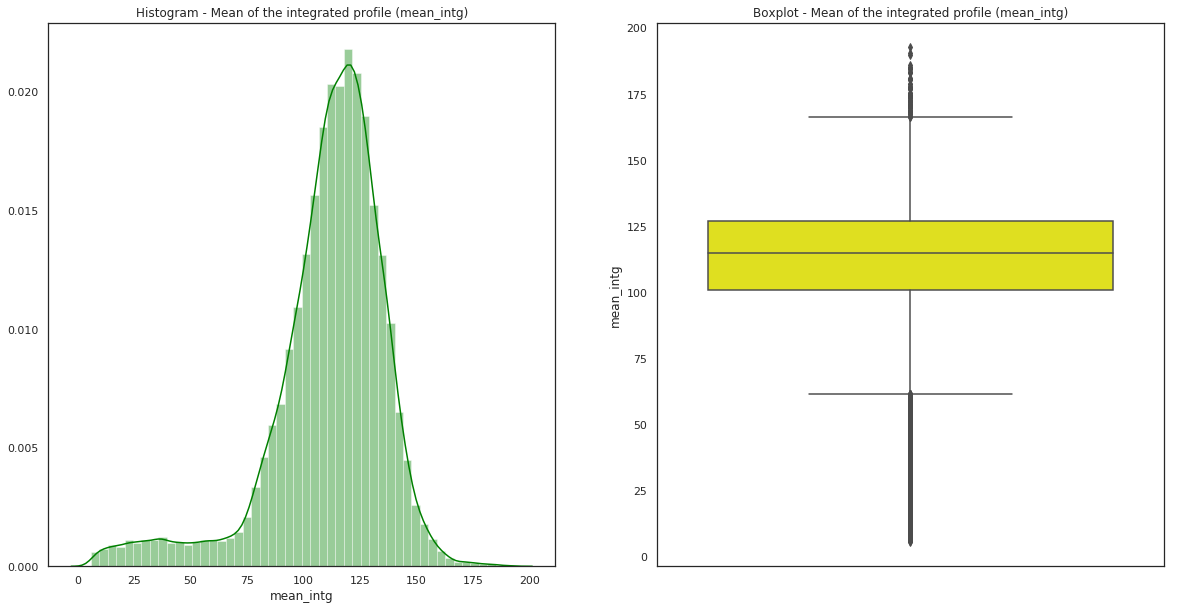

In [708]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Mean of the integrated profile (mean_intg)")
sns.distplot(pulsars_Df['mean_intg'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Mean of the integrated profile (mean_intg)")
sns.boxplot(x = 'mean_intg', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

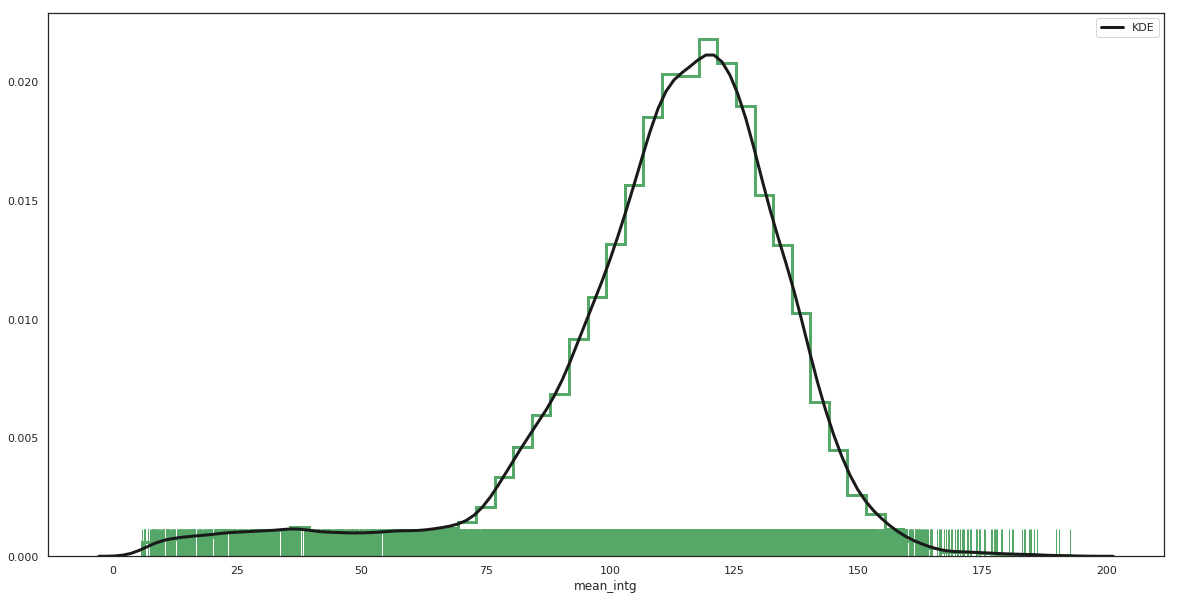

In [709]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['mean_intg'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()


In [710]:
# Check how many values of mean_intg variable are over or below 3 std deviations
a = np.mean(pulsars_Df['mean_intg']) - (3 * np.std(pulsars_Df['mean_intg']))
b = np.mean(pulsars_Df['mean_intg']) + (3 * np.std(pulsars_Df['mean_intg']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['mean_intg'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['mean_intg'] > b]['class'].count())

Number of values under 3 Std. = 451
Number of values above 3 Std. = 3


In [711]:
c = pulsars_Df[pulsars_Df['mean_intg'] < a]['class'].count()
d = sum(pulsars_Df[pulsars_Df['mean_intg'] < a]['class'])
print("Percentage of values of class 0 under 3 Std. of mean_intg Variable = %s" %((c - d)/c))
print("Percentage of values of class 1 under 3 Std. of mean_intg Variable = %s" %((d)/c))

Percentage of values of class 0 under 3 Std. of mean_intg Variable = 0.008869179600886918
Percentage of values of class 1 under 3 Std. of mean_intg Variable = 0.991130820399113


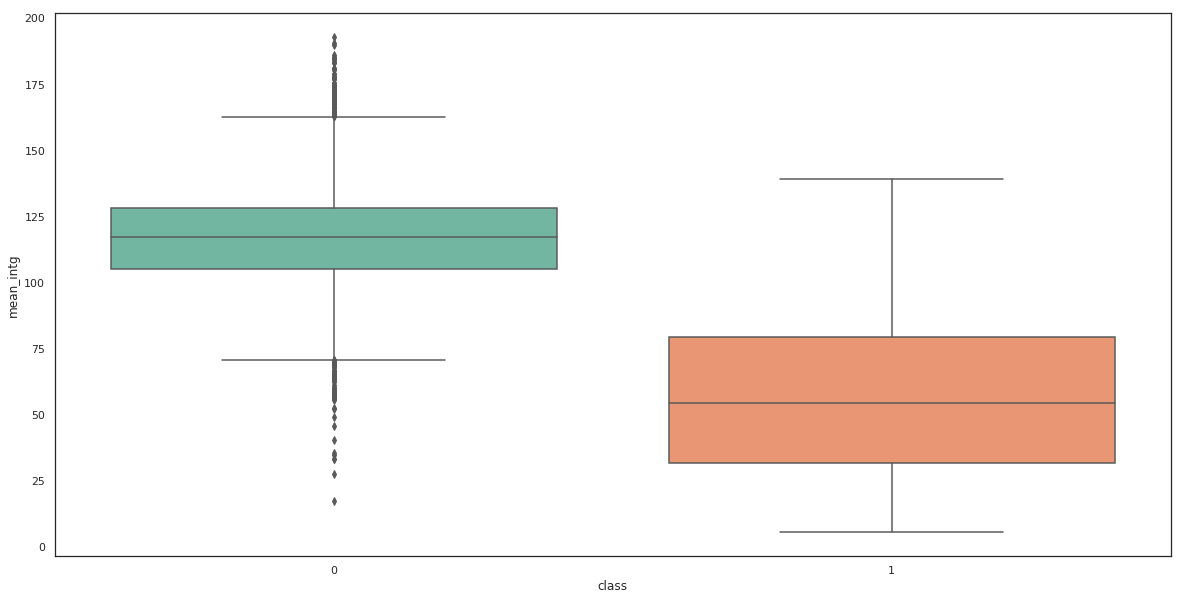

In [712]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'mean_intg', data=pulsars_Df)
plt.show()

In [713]:
# Values of mean_intg variable over 3 std of mean
pulsars_Df[pulsars_Df['mean_intg'] > b]

mean_intg    sd_intg  exc_kurt_intg  skw_intg  mean_dmsnr   sd_dmsnr  \
4548   190.421875  59.106447      -1.517159  1.497580   95.719900  97.754509   
6564   189.734375  59.578268      -1.641515  1.868564  147.019231  76.999786   
15687  192.617188  56.926093      -1.876011  2.444698   20.024247  53.103249   

       exc_kurt_dmsnr  skw_dmsnr  class  
4548         0.058366  -1.964998      0  
6564        -0.898056  -0.649195      0  
15687        2.764809   6.341108      0

-- Var 1 Ends --

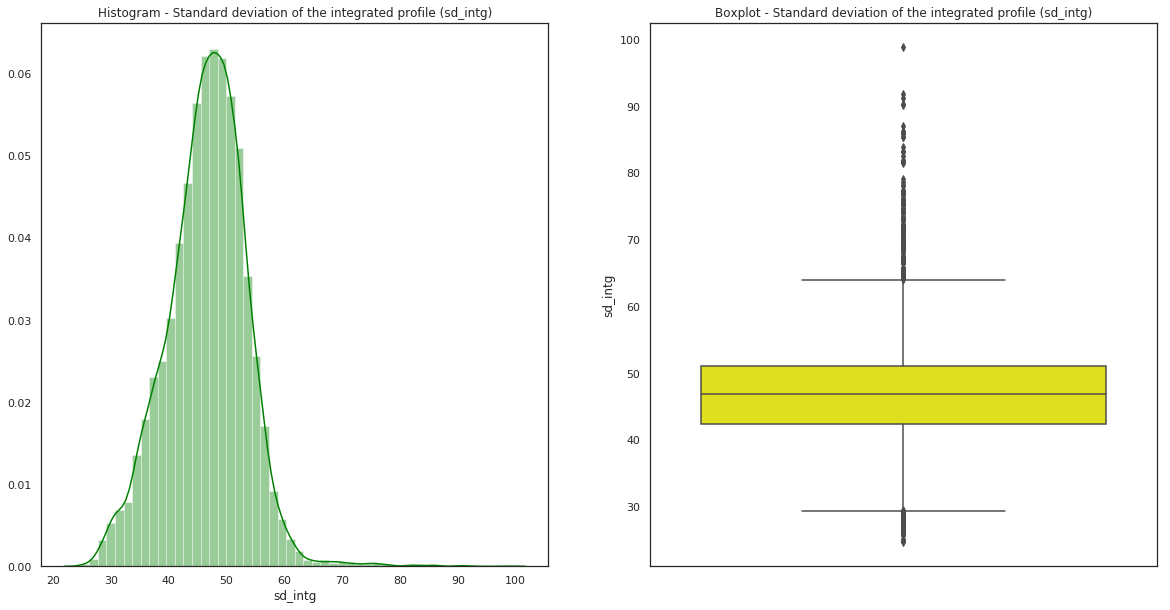

In [714]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Standard deviation of the integrated profile (sd_intg)")
sns.distplot(pulsars_Df['sd_intg'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Standard deviation of the integrated profile (sd_intg)")
sns.boxplot(x = 'sd_intg', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

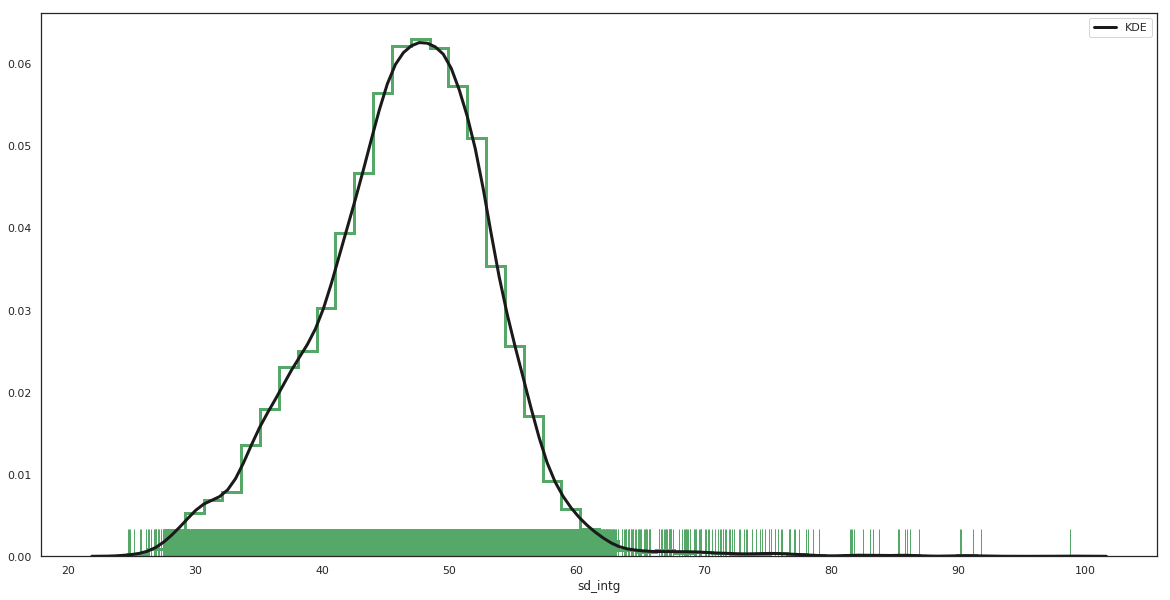

In [715]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['sd_intg'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()


In [716]:
# Check how many values of sd_intg variable are over or below 3 std deviations
a = np.mean(pulsars_Df['sd_intg']) - (3 * np.std(pulsars_Df['sd_intg']))
b = np.mean(pulsars_Df['sd_intg']) + (3 * np.std(pulsars_Df['sd_intg']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['sd_intg'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['sd_intg'] > b]['class'].count())

Number of values under 3 Std. = 6
Number of values above 3 Std. = 99


In [717]:
# Taking random 20 obs over 3 std for manual inspection
pulsars_Df[pulsars_Df['sd_intg'] > b].head(20)

mean_intg    sd_intg  exc_kurt_intg  skw_intg  mean_dmsnr   sd_dmsnr  \
370   107.539062  86.951396      -0.008928 -1.676724  211.948997  54.010310   
525   119.367188  71.516046       0.061737 -1.383625    0.886288   9.267690   
544   120.539062  71.487313       0.066583 -1.237876    1.568562  15.701101   
758    59.351562  76.784458       1.536309  0.736696    0.636288  10.566986   
893   136.828125  67.336504      -0.257778 -1.276375    0.962375   8.426909   
961   162.039062  67.439371      -0.911776 -0.229593    0.807692  10.852915   
1124  118.984375  77.139786       0.173310 -1.501641    0.836957  11.997185   
1233  144.945312  70.872388      -0.359561 -1.011004    7.689799  37.922381   
1235  130.406250  72.400949      -0.020930 -1.267204    5.086957  27.146896   
1236   74.632812  75.867161       0.834880 -0.838742   67.623746  81.199889   
1666  109.039062  81.853089       0.346044 -1.339971    4.505853  29.640614   
1673  107.554688  75.139434       0.526715 -1.286904   87.088629  91.049357   
1677  111.218750  71.325173       0.333783 -1.215763    1.031773  12.953764   
2004  129.375000  70.379995      -0.004722 -1.239225   13.843645  39.058632   
2018   71.984375  79.084407       1.086365 -0.535666  176.015050  60.662340   
2137  135.859375  81.503042       0.023921 -1.791886    3.655518  19.638924   
2558  103.351562  71.262783       0.515849 -1.000507   17.805184  50.209141   
2579  139.375000  69.674691      -0.138304 -0.972711    5.885452  29.832774   
2876   99.281250  71.956469       0.765558 -0.827640  197.234114  63.758798   
2953   66.796875  67.402865       1.134214  0.007024    1.111204  13.058532   

      exc_kurt_dmsnr   skw_dmsnr  class  
370        -2.556795    5.768458      0  
525        19.865582  493.538840      0  
544        11.669448  146.713841      0  
758        21.017232  466.135457      0  
893        23.742638  691.196174      0  
961        21.274814  483.251270      0  
1124       17.941527  340.366461      0  
1233        5.006665   24.171402      0  
1235        6.109138   38.936796      0  
1236        0.998825   -0.311267      0  
1666        7.469904   56.149667      0  
1673        0.467833   -1.357949      0  
1677       15.971510  277.369560      0  
2004        3.180326   10.384730      0  
2018       -1.081765    0.377426      1  
2137        7.228962   63.401192      0  
2558        2.773783    6.446037      0  
2579        5.730760   34.036690      0  
2876       -1.876388    2.431297      0  
2953       13.967321  217.194927      0

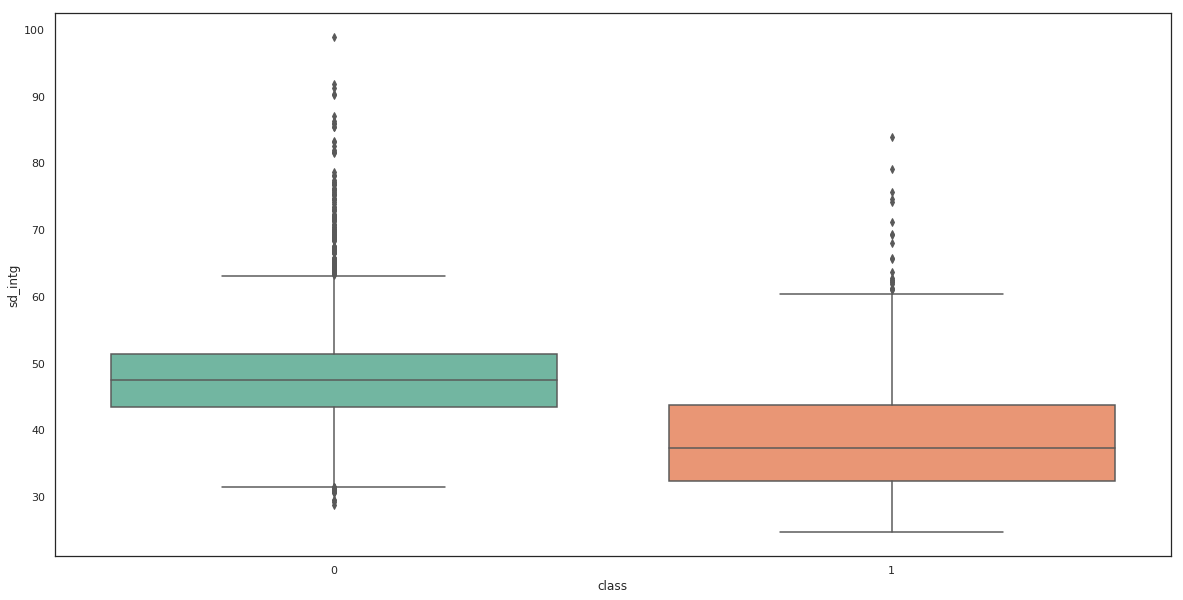

In [718]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'sd_intg', data=pulsars_Df)
plt.show()

--Var 2 Ends -- 

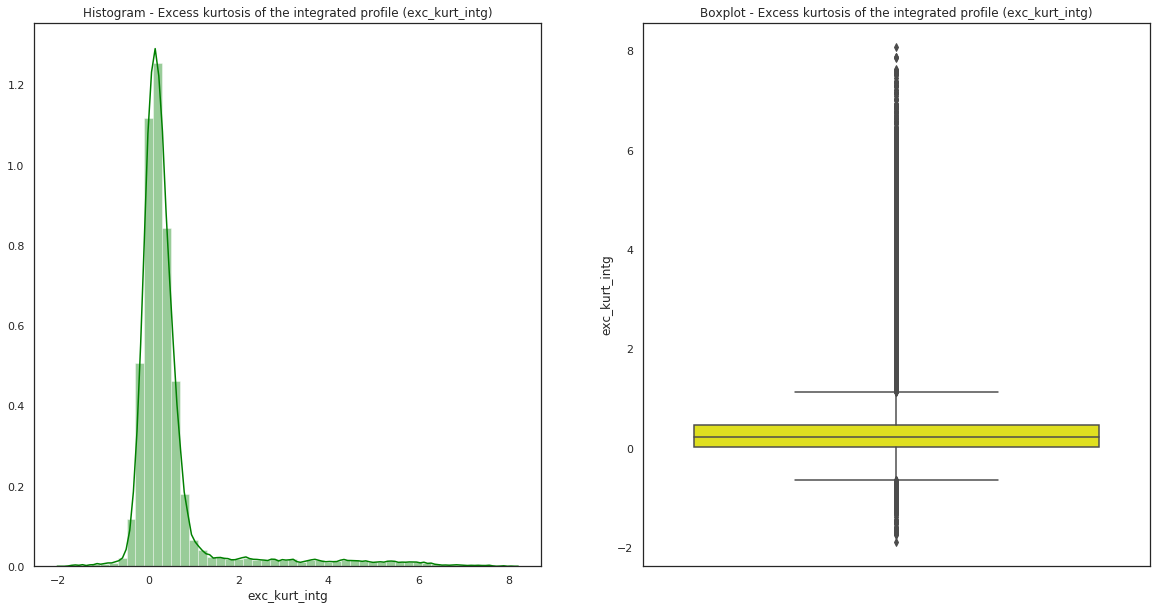

In [719]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Excess kurtosis of the integrated profile (exc_kurt_intg)")
sns.distplot(pulsars_Df['exc_kurt_intg'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Excess kurtosis of the integrated profile (exc_kurt_intg)")
sns.boxplot(x = 'exc_kurt_intg', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

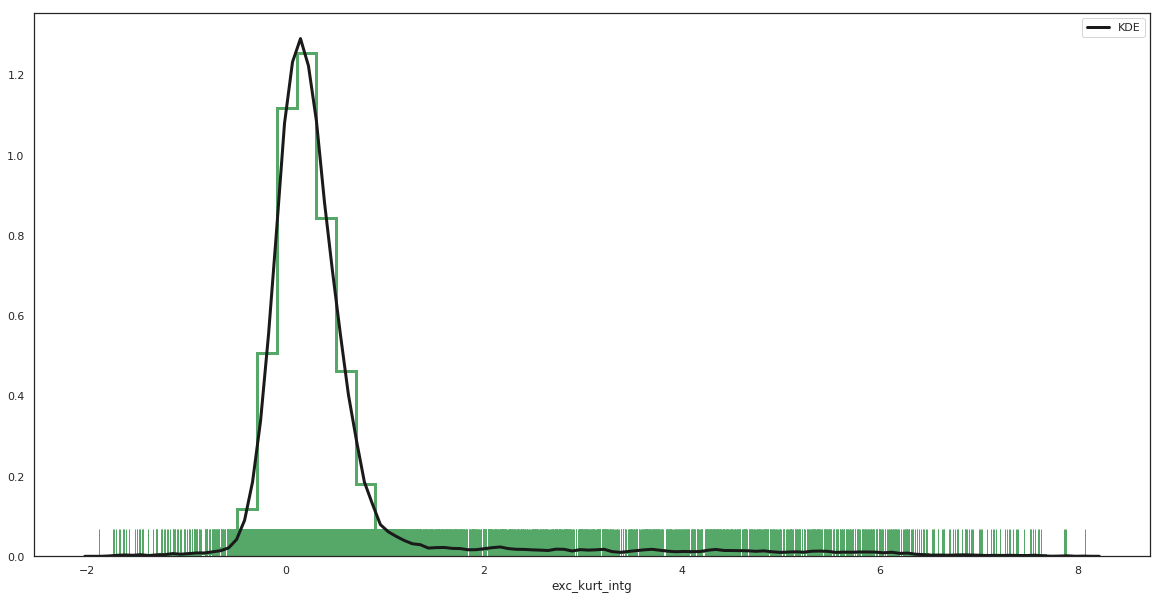

In [720]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['exc_kurt_intg'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

In [721]:
# Check how many values of exc_kurt_intg variable are over or below 3 std deviations
a = np.mean(pulsars_Df['exc_kurt_intg']) - (3 * np.std(pulsars_Df['exc_kurt_intg']))
b = np.mean(pulsars_Df['exc_kurt_intg']) + (3 * np.std(pulsars_Df['exc_kurt_intg']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['exc_kurt_intg'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['exc_kurt_intg'] > b]['class'].count())

Number of values under 3 Std. = 0
Number of values above 3 Std. = 636


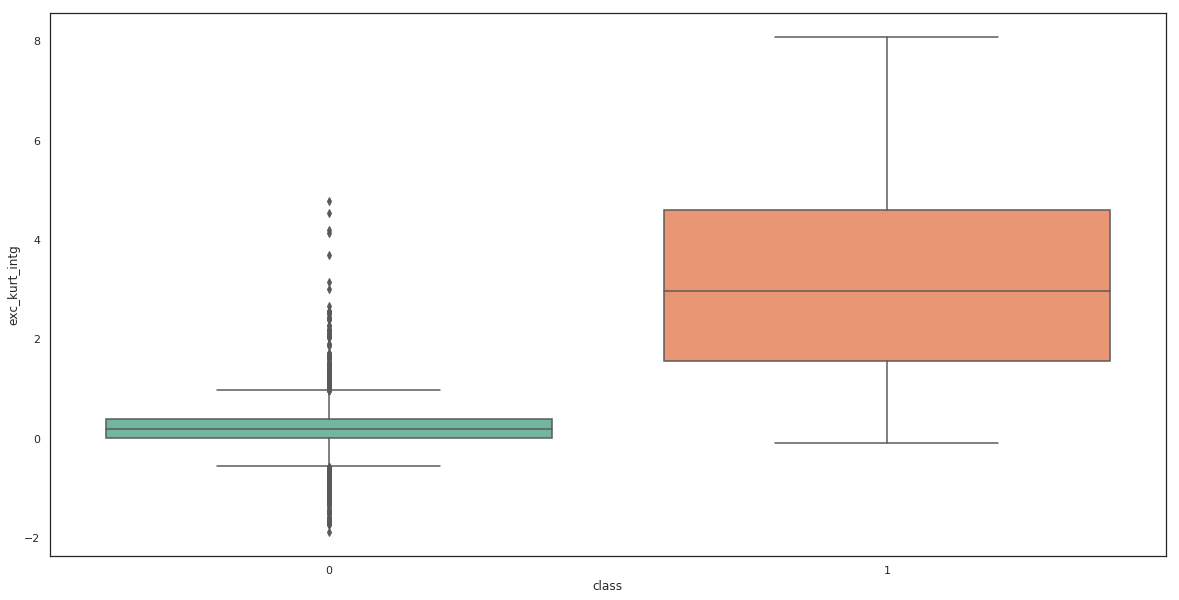

In [722]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'exc_kurt_intg', data=pulsars_Df)
plt.show()

-- Var 3 Ends -- 

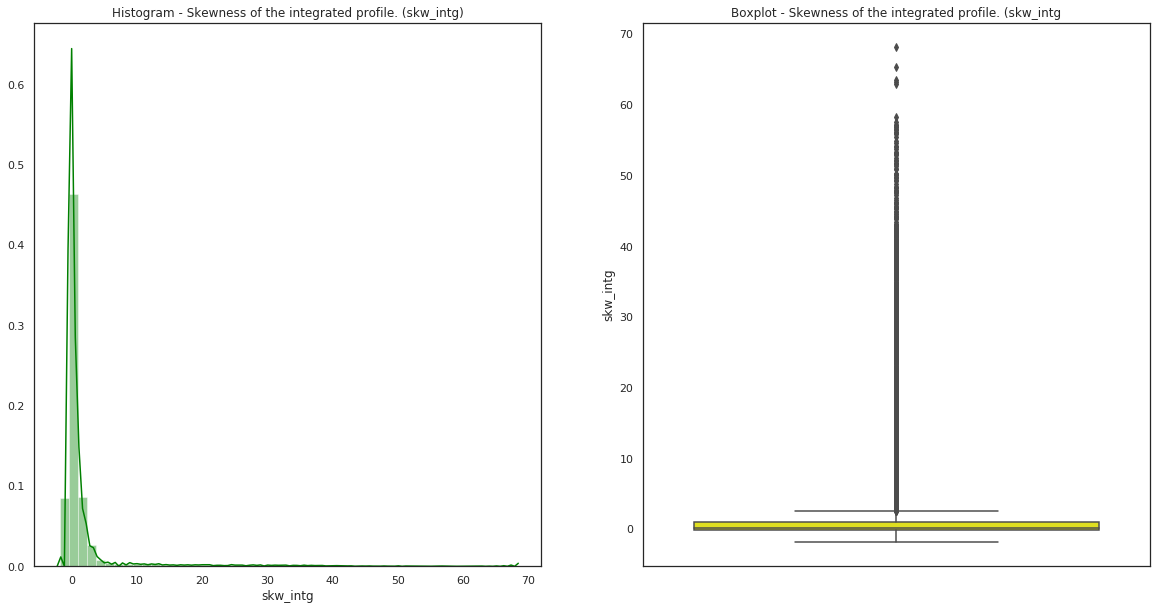

In [723]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Skewness of the integrated profile. (skw_intg)")
sns.distplot(pulsars_Df['skw_intg'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Skewness of the integrated profile. (skw_intg")
sns.boxplot(x = 'skw_intg', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

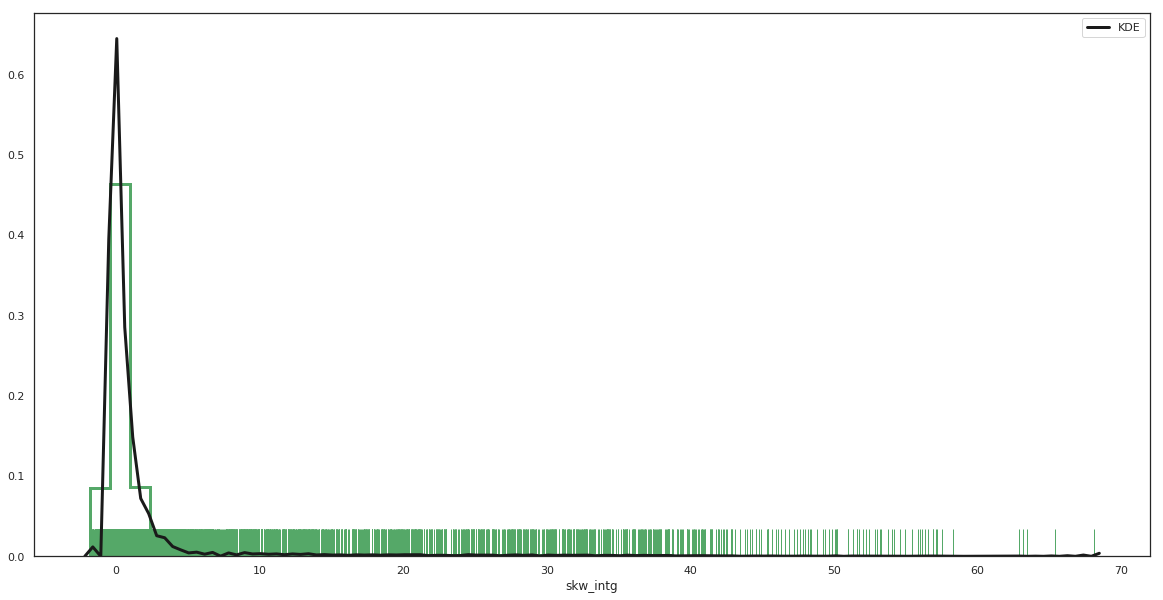

In [724]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['skw_intg'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

In [725]:
# Check how many values of skw_intg variable are over or below 3 std deviations
a = np.mean(pulsars_Df['skw_intg']) - (3 * np.std(pulsars_Df['skw_intg']))
b = np.mean(pulsars_Df['skw_intg']) + (3 * np.std(pulsars_Df['skw_intg']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['skw_intg'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['skw_intg'] > b]['class'].count())

Number of values under 3 Std. = 0
Number of values above 3 Std. = 526


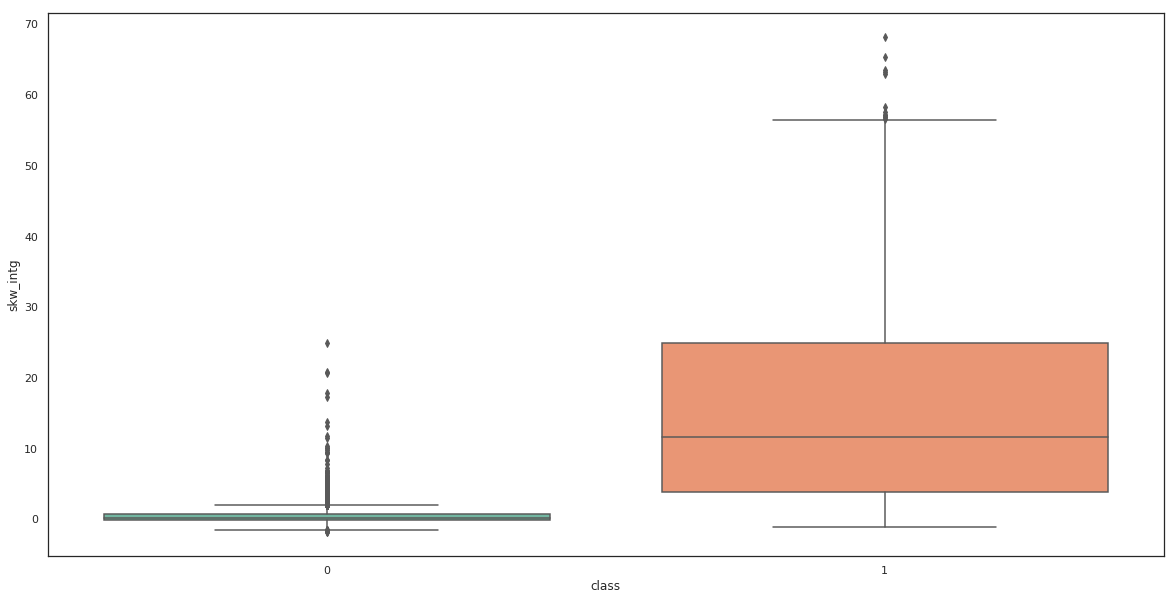

In [726]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'skw_intg', data=pulsars_Df)
plt.show()

--Var 4 End --

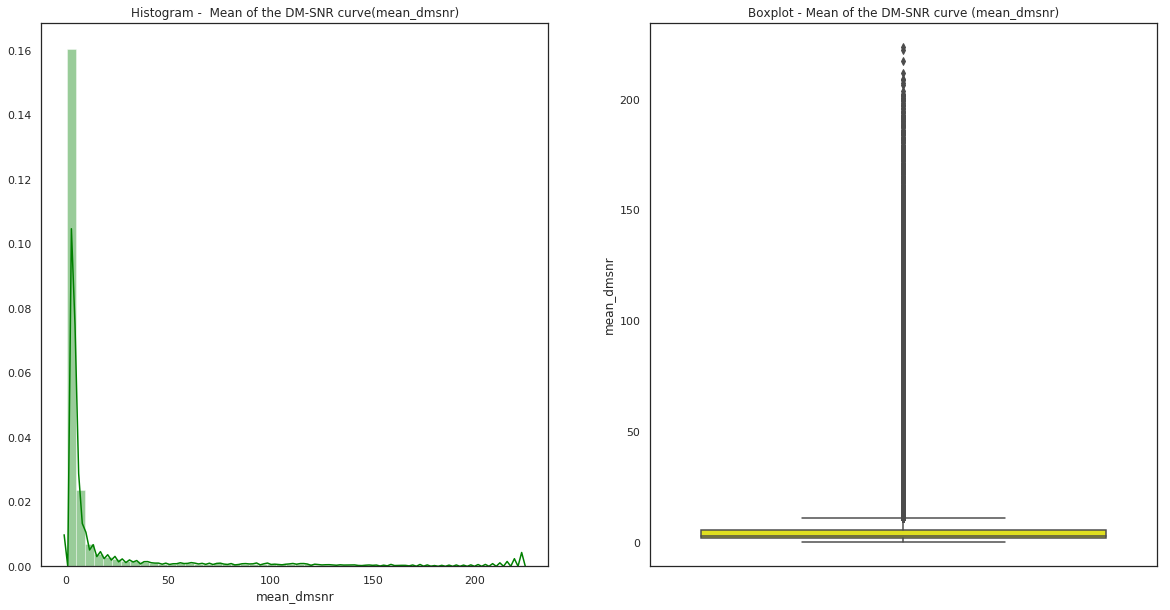

In [727]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram -  Mean of the DM-SNR curve(mean_dmsnr)")
sns.distplot(pulsars_Df['mean_dmsnr'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Mean of the DM-SNR curve (mean_dmsnr)")
sns.boxplot(x = 'mean_dmsnr', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

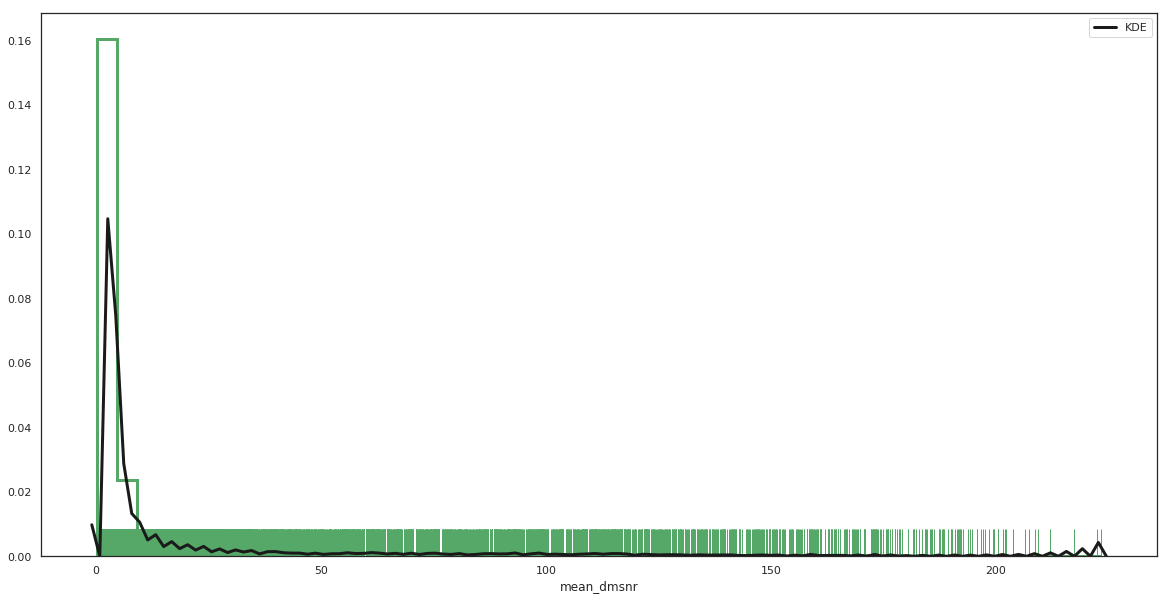

In [728]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['mean_dmsnr'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

In [729]:
# Check how many values of mean_dmsnr variable are over or below 3 std deviations
a = np.mean(pulsars_Df['mean_dmsnr']) - (3 * np.std(pulsars_Df['mean_dmsnr']))
b = np.mean(pulsars_Df['mean_dmsnr']) + (3 * np.std(pulsars_Df['mean_dmsnr']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['mean_dmsnr'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['mean_dmsnr'] > b]['class'].count())

Number of values under 3 Std. = 0
Number of values above 3 Std. = 654


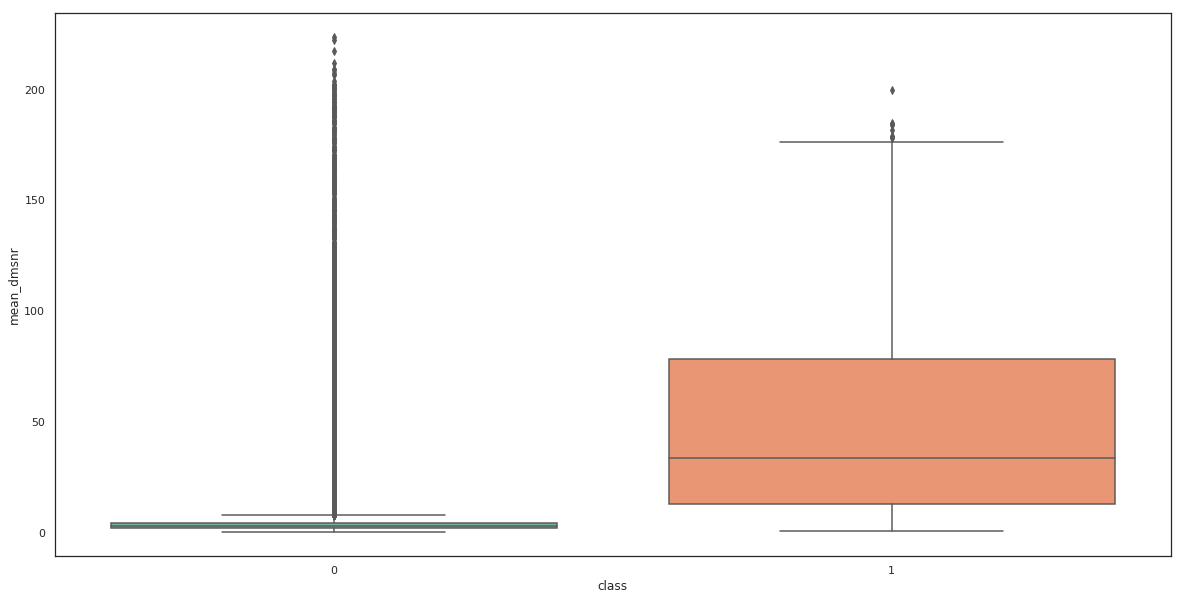

In [730]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'mean_dmsnr', data=pulsars_Df)
plt.show()

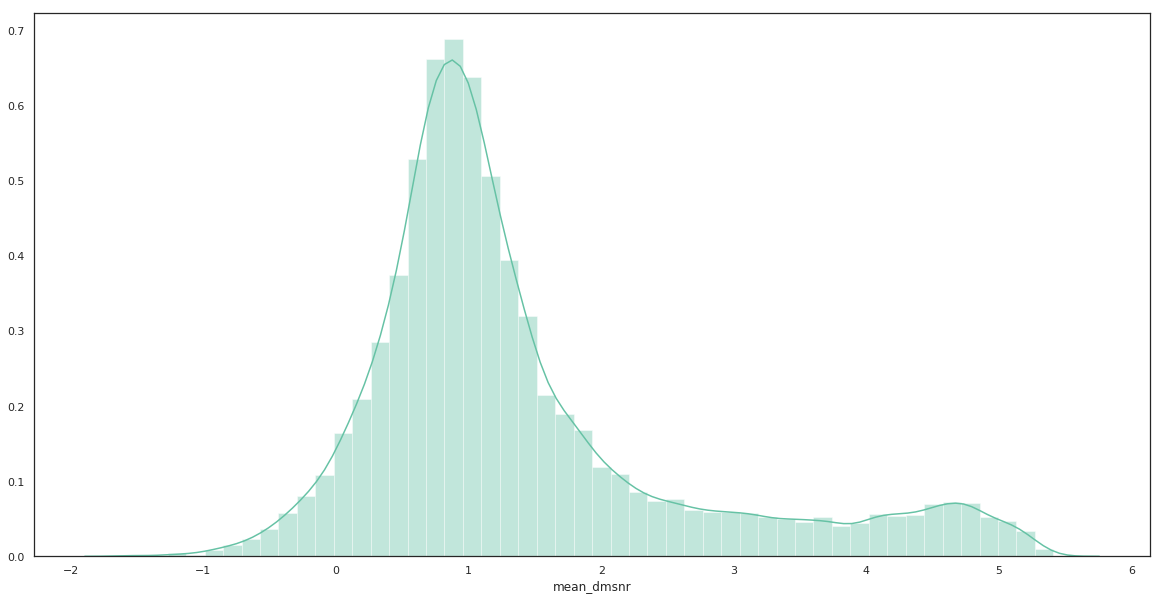

In [731]:
# Taking log of mean_dmsnr variable
fig, axes = plt.subplots(1,1,figsize = (20,10))
sns.distplot(np.log(pulsars_Df['mean_dmsnr']),kde=True, ax=axes)
plt.show()

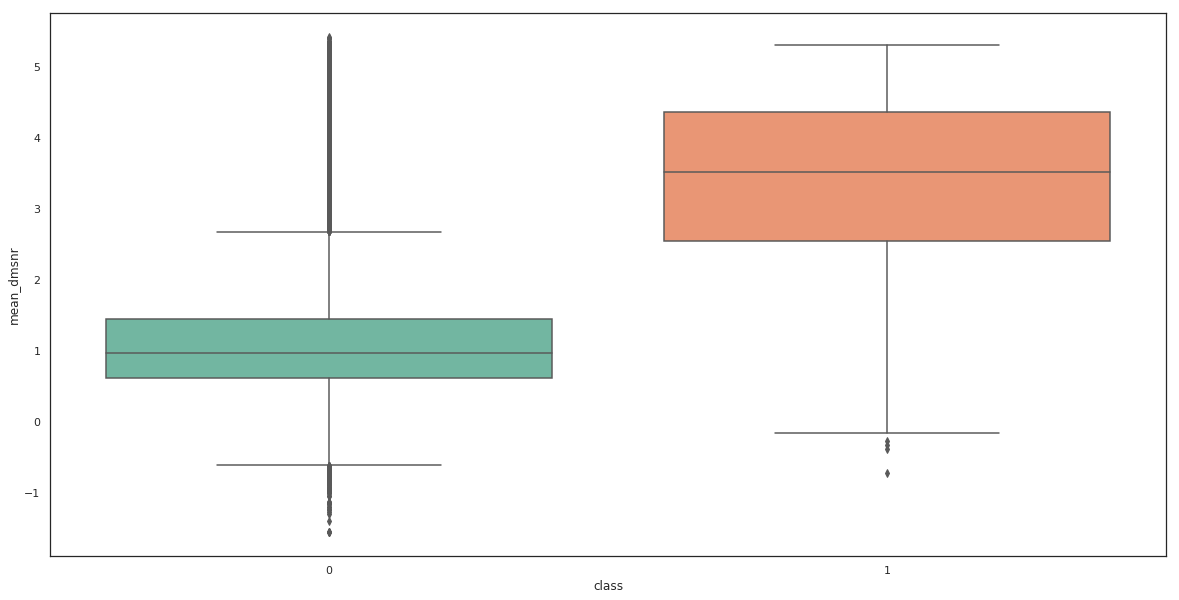

In [732]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = np.log(pulsars_Df['mean_dmsnr']), data=pulsars_Df)
plt.show()

-- Var 5 Ends --

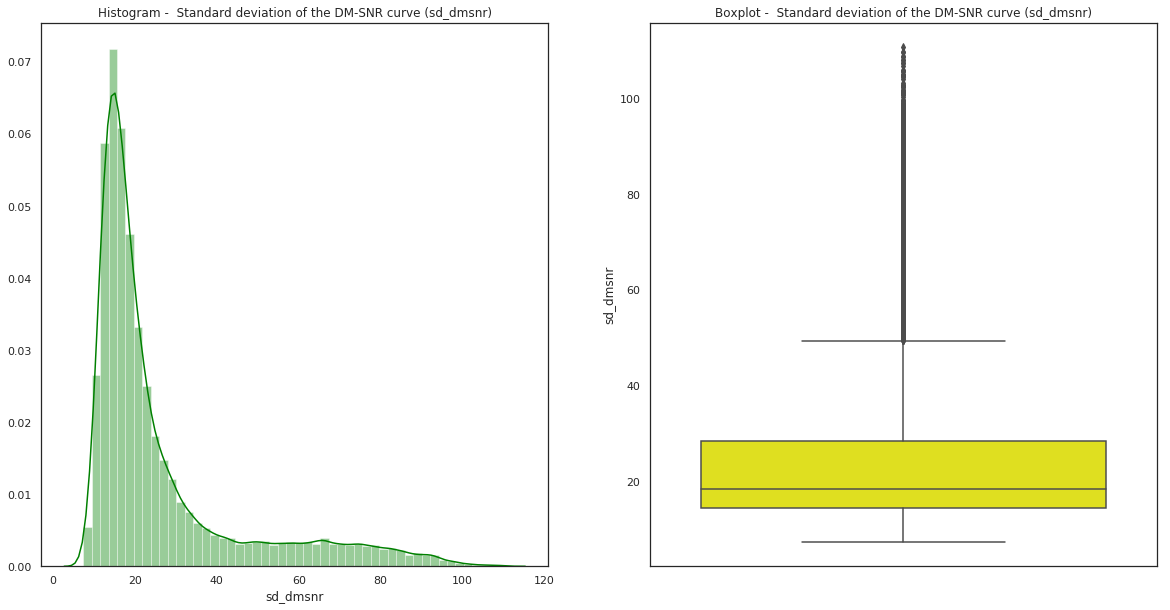

In [733]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram -  Standard deviation of the DM-SNR curve (sd_dmsnr)")
sns.distplot(pulsars_Df['sd_dmsnr'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot -  Standard deviation of the DM-SNR curve (sd_dmsnr)")
sns.boxplot(x = 'sd_dmsnr', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

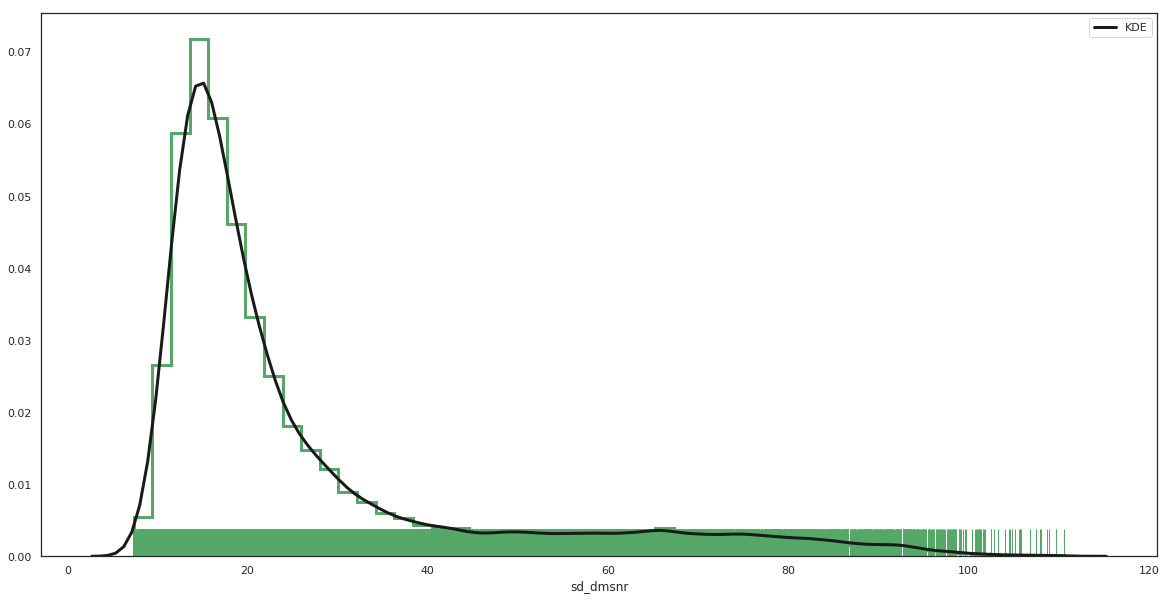

In [734]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['sd_dmsnr'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

In [735]:
# Check how many values of sd_dmsnr variable are over or below 3 std deviations
a = np.mean(pulsars_Df['sd_dmsnr']) - (3 * np.std(pulsars_Df['sd_dmsnr']))
b = np.mean(pulsars_Df['sd_dmsnr']) + (3 * np.std(pulsars_Df['sd_dmsnr']))
print("Number of values under 3 Std. = %s" %pulsars_Df[pulsars_Df['sd_dmsnr'] < a]['class'].count())
print("Number of values above 3 Std. = %s" %pulsars_Df[pulsars_Df['sd_dmsnr'] > b]['class'].count())

Number of values under 3 Std. = 0
Number of values above 3 Std. = 406


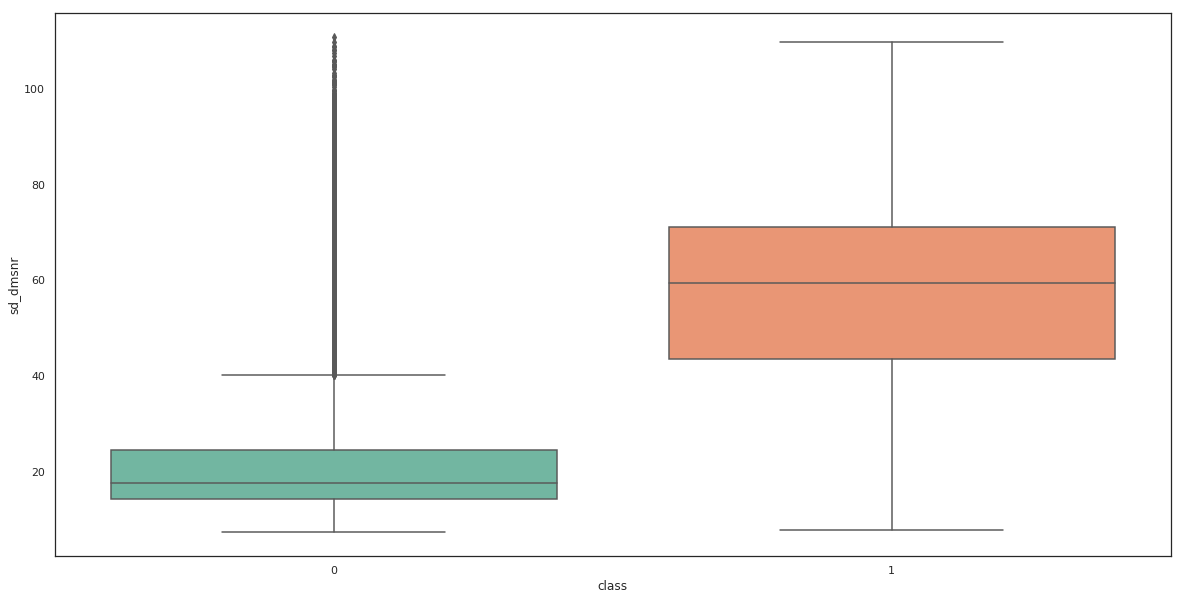

In [736]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = pulsars_Df['sd_dmsnr'], data=pulsars_Df)
plt.show()

In [737]:
# Looking at 25 values at random that are greater than 3 std.
pulsars_Df[pulsars_Df['sd_dmsnr'] > b].head(25)

mean_intg    sd_intg  exc_kurt_intg   skw_intg  mean_dmsnr    sd_dmsnr  \
134   126.398438  60.418248       0.048077  -0.814893   66.547659   85.322761   
359    60.632812  47.564737       2.401281   5.858265   93.586957   89.542258   
364   169.539062  57.060673      -1.082567   0.624954  127.636288   94.410682   
447    86.218750  53.083357       0.972318   0.341129  139.614549  101.090779   
505    42.023438  33.027088       3.668886  19.648005   87.904682   86.479951   
673   147.523438  52.398856      -0.440764  -0.210694   79.328595   93.943998   
688    57.398438  44.955245       2.638750   7.709673   59.050167   85.546869   
709   137.875000  51.161967       0.015710  -0.306694   77.465719   89.397611   
784   160.601562  54.810802      -1.130722   0.991810  135.439799   95.842195   
787   137.343750  52.050822      -0.400641  -0.119314  105.989130   91.672115   
877   139.054688  46.640130       0.042860  -0.396081  129.867893   98.018415   
934   127.828125  50.540997       0.090408  -0.334408   62.443980   87.361516   
996   111.289062  57.133499       0.419450  -0.466672  168.258361   91.612556   
1037  115.476562  47.230314       0.125991  -0.130416   88.088629   88.351554   
1269  154.656250  44.079374      -0.224626   0.311801   76.215719   94.202551   
1330  119.140625  57.019697       0.377411  -0.986065   90.950669   87.700492   
1493   28.546875  29.131399       5.421874  34.243176   56.295987   85.124408   
1548  115.343750  56.825038       0.314129  -0.748100  102.100334   88.659376   
1673  107.554688  75.139434       0.526715  -1.286904   87.088629   91.049357   
1775   98.359375  51.190626       1.057578   0.759414  134.582776   94.924652   
2000  120.156250  53.934051      -0.075318  -0.601715   65.014214   84.871045   
2019  110.992188  56.748692       0.529349  -0.628165  160.493311   96.803316   
2081  111.781250  53.471946       0.205553  -0.321112  108.350334   92.056585   
2094   50.195312  30.431033       3.255719  18.661811   78.260033   87.392208   
2265  147.101562  50.324702      -0.797783   0.147756  107.467391  110.642211   

      exc_kurt_dmsnr  skw_dmsnr  class  
134         0.750702  -1.037197      0  
359         0.383887  -1.319026      1  
364        -0.276185  -1.578509      0  
447        -0.612073  -1.548335      0  
505         0.259049  -1.504341      1  
673         0.481280  -1.551990      0  
688         1.141041  -0.250512      1  
709         0.463503  -1.551208      0  
784        -0.424526  -1.492953      0  
787         0.003882  -1.648097      0  
877        -0.144233  -1.706513      0  
934         0.908055  -0.876787      0  
996        -1.090745  -0.525926      0  
1037        0.149566  -1.766947      0  
1269        0.531849  -1.551833      0  
1330        0.273337  -1.510652      0  
1493        1.229159  -0.059996      1  
1548       -0.092917  -1.674608      0  
1673        0.467833  -1.357949      0  
1775       -0.481317  -1.497141      1  
2000        0.708684  -1.225191      0  
2019       -0.971316  -0.941511      0  
2081       -0.147072  -1.722876      0  
2094        0.631438  -1.088491      1  
2265        0.072755  -1.976976      0

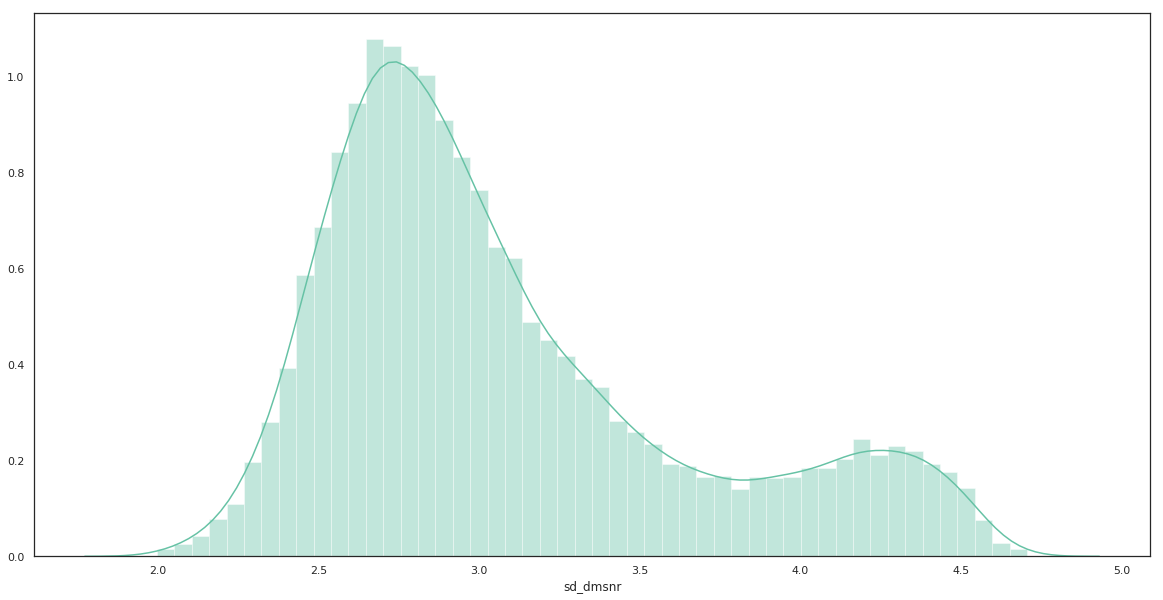

In [738]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
sns.distplot(np.log(pulsars_Df['sd_dmsnr']),kde=True, ax=axes)
plt.show()

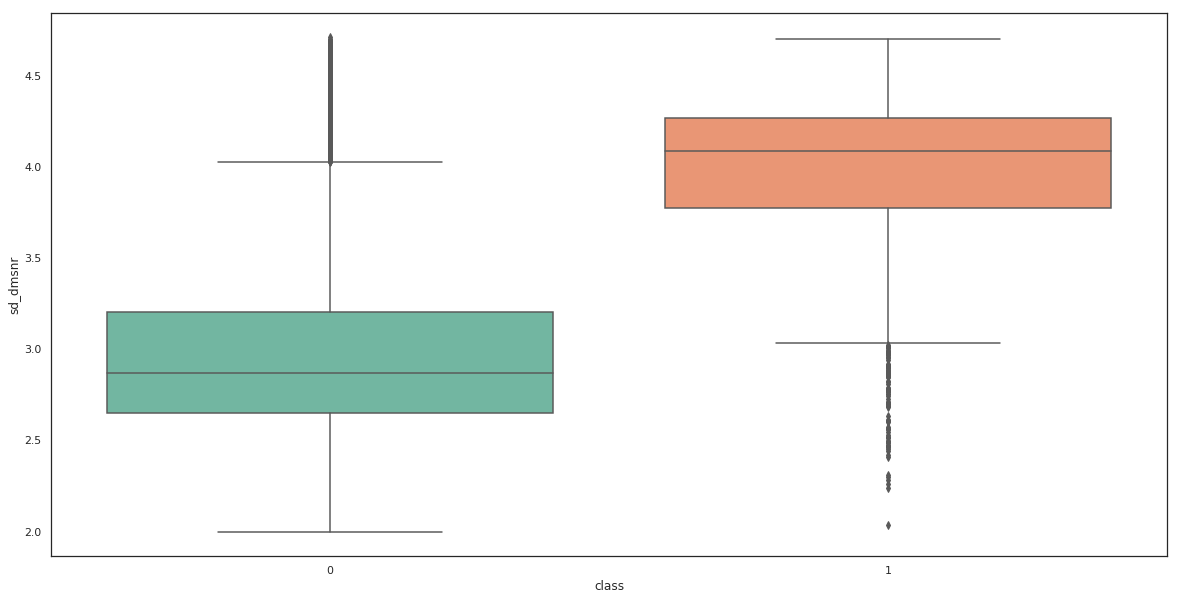

In [739]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = np.log(pulsars_Df['sd_dmsnr']), data=pulsars_Df)
plt.show()

--  Var 6 Ends --

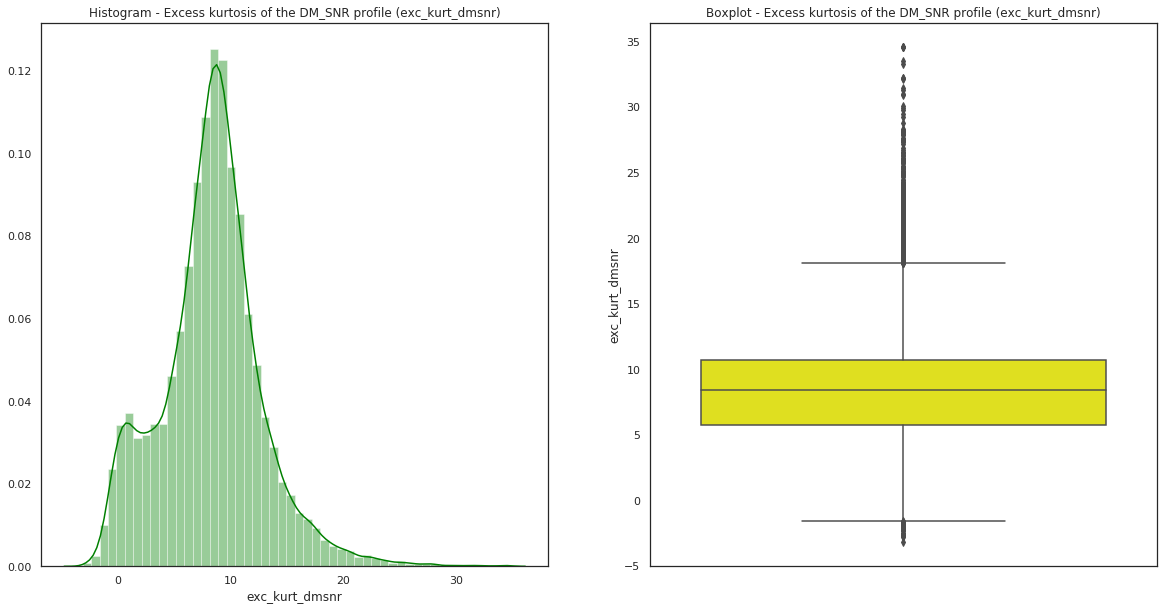

In [740]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Excess kurtosis of the DM_SNR profile (exc_kurt_dmsnr)")
sns.distplot(pulsars_Df['exc_kurt_dmsnr'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Excess kurtosis of the DM_SNR profile (exc_kurt_dmsnr)")
sns.boxplot(x = 'exc_kurt_dmsnr', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

Histogram reflects close to that of normalized data, skews slightly toward right for a small number . From the above plots, it is evident that about 50% records have excess kurtosis values for DM_SNR profile in an approx range of (7,12), with median around 8. We do see few outliers which we can check further by studying how many records are outside 3 std deviations away. 

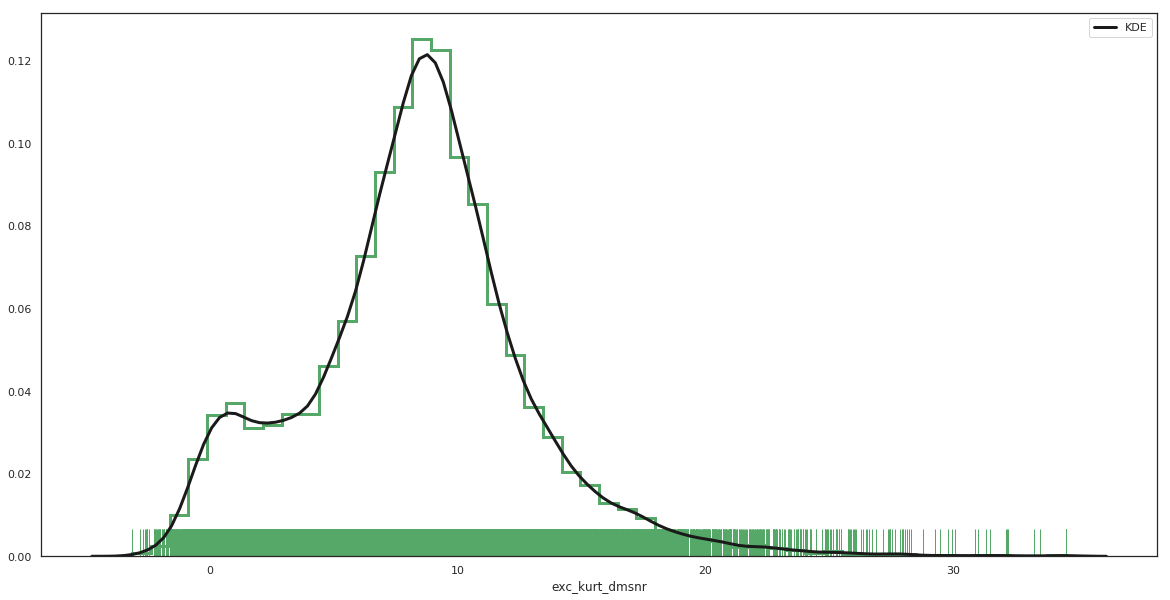

In [741]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['exc_kurt_dmsnr'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

Since variable "exc_kurt_dmsnr" is a continuous variable, we have plotted a kdeplot and rugplot for the values. And while the distribution is almost normal, we cna see that majority values lie within (-2,22) and clearly shows the < 1% outliers

In [742]:
# Check how many values of exc_kurt_dmsnr variable are over or below 3 std deviations
a = np.mean(pulsars_Df['exc_kurt_dmsnr']) - (3 * np.std(pulsars_Df['exc_kurt_dmsnr']))
b = np.mean(pulsars_Df['exc_kurt_dmsnr']) + (3 * np.std(pulsars_Df['exc_kurt_dmsnr']))
print("3 std deviations range : %f - %f" %(a , b) )
print("Number of values > 3 Std. = %s" %pulsars_Df[~pulsars_Df['exc_kurt_dmsnr'].between (a,b,inclusive=True) ]['class'].count())
p = (pulsars_Df[~pulsars_Df['exc_kurt_dmsnr'].between (a,b,inclusive=True) ]['class'].count()/pulsars_Df['class'].count())*100

print("% of values > 3 Std. = " + "{:.2f}".format(p) + "%")

3 std deviations range : -5.214342 - 21.821454
Number of values > 3 Std. = 156
% of values > 3 Std. = 0.87%


From the above calculations we know that < 1% records are greater than 3 std deviations away. 

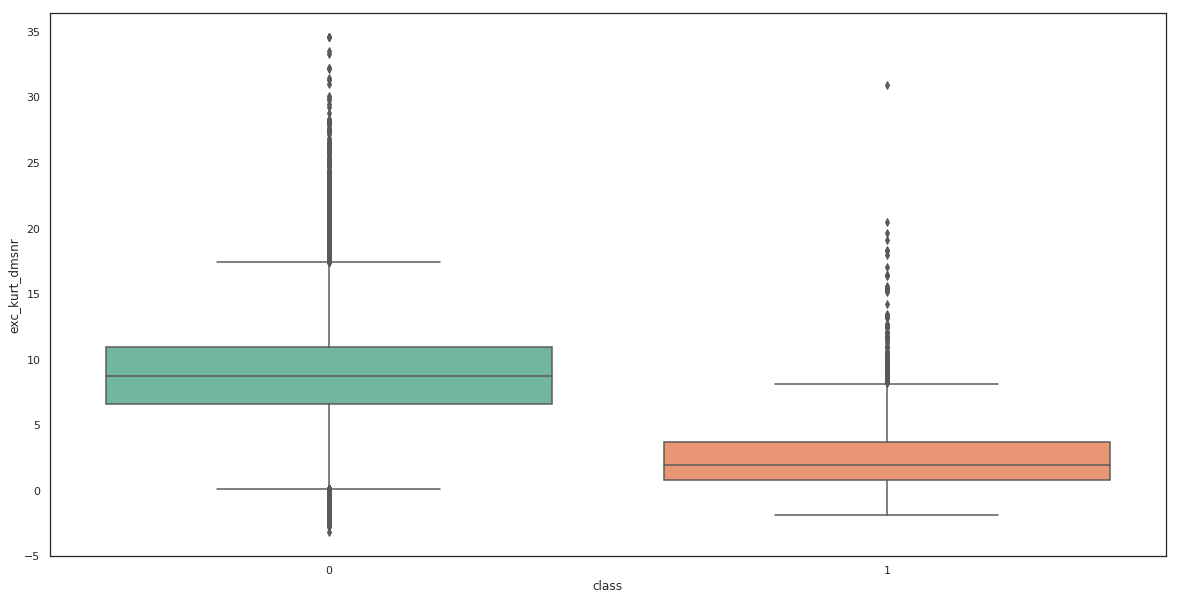

In [743]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'exc_kurt_dmsnr', data=pulsars_Df)
plt.show()

From the above box plots to compare the "exc_kurt_dmsnr" value for the 2 classes (pulsar or not pulsar ), we can see that non-pulsar stars have a  higher value of excess kurtosis for the dm_snr profile, with 50% range around (7,12) with average around 8, which reflects our general range for this value for the entire set.This also agrees with the dataset having majority of non-pulsars. On the other hand pulsar stars have a lower excess kurtosis value for the DM_SNR profile with 50% of data ranging (1,4) and an average of approx 2. There are few outliers for the pulsar stars but when compared to the entire dataset, almost all values of pulsar stars are within the inter quartile range.

-- var 7 ends--

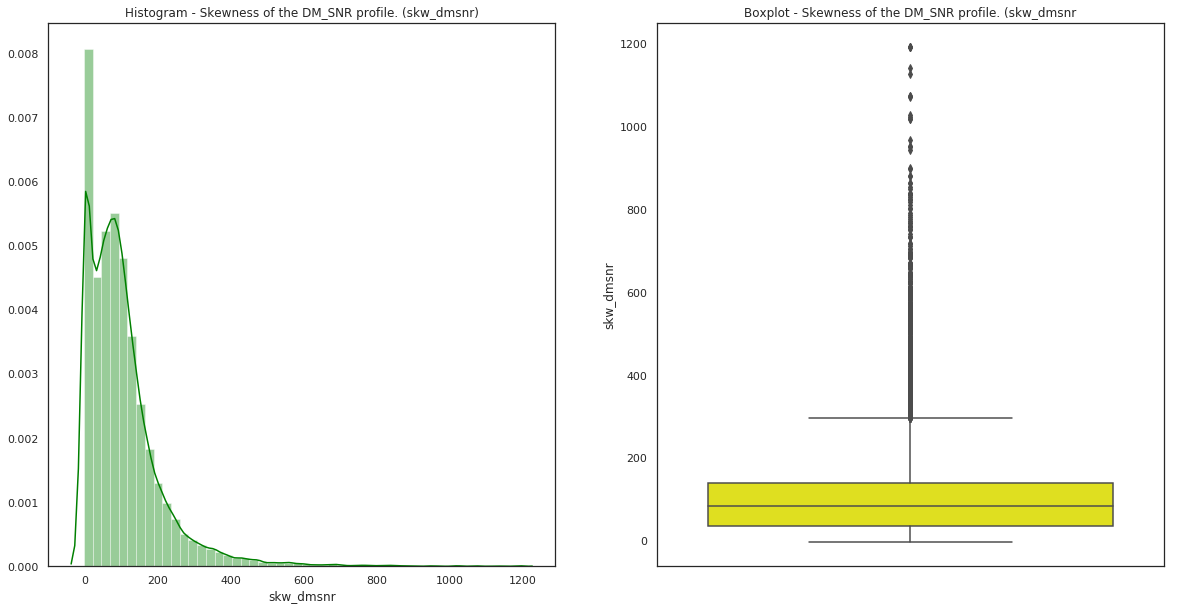

In [744]:
sns.set_palette("Set2")
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_title("Histogram - Skewness of the DM_SNR profile. (skw_dmsnr)")
sns.distplot(pulsars_Df['skw_dmsnr'],kde=True, ax=axes[0],color="green")
axes[1].set_title("Boxplot - Skewness of the DM_SNR profile. (skw_dmsnr")
sns.boxplot(x = 'skw_dmsnr', ax=axes[1], orient='v', data=pulsars_Df, color="yellow")
plt.show()

Although variable "skw_dmsnr" i.e. skewness of the DM_SNR profile is continuous we have created a histogram to get a high level frequency of the values and it clearly shows the data is right skewed. While 50% of data have value approxing (0,180) with an average around 100 we do see quiet a few outliers on the higher end.

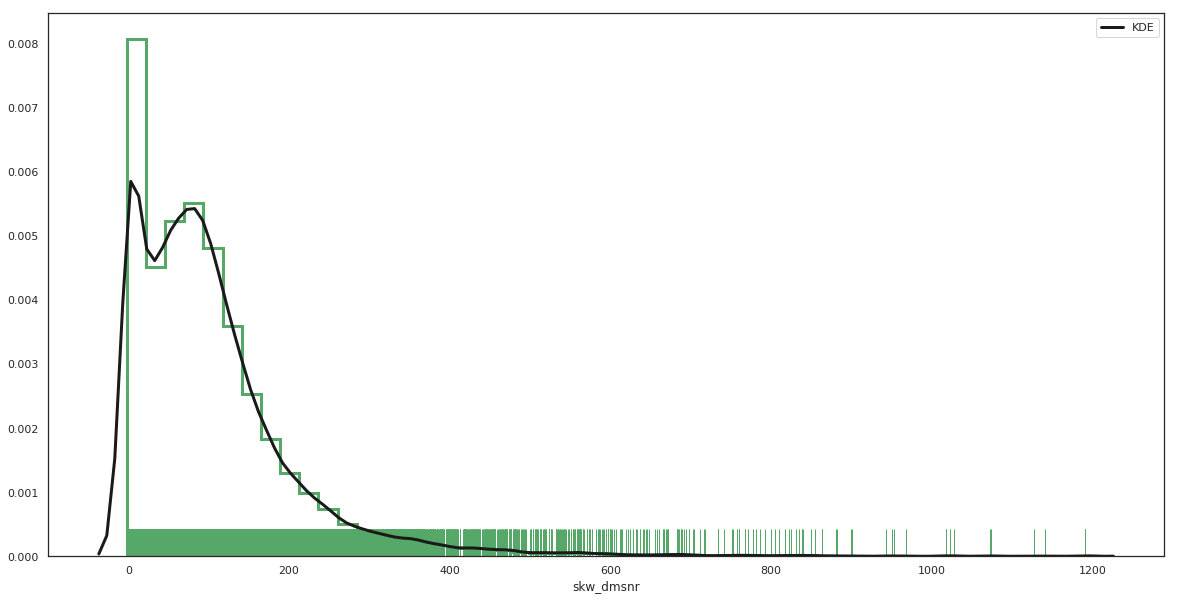

In [745]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.distplot(pulsars_Df['skw_dmsnr'],rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
plt.show()

Above kdeplot and rugplot shows higher density for values ranging from (0,400) after which outliers start showing gaps. Majority of the stars have the value int he range of (0,400) 

In [746]:
# Check how many values of skw_dmsnr variable are over or below 3 std deviations
a = np.mean(pulsars_Df['skw_dmsnr']) - (3 * np.std(pulsars_Df['skw_dmsnr']))
b = np.mean(pulsars_Df['skw_dmsnr']) + (3 * np.std(pulsars_Df['skw_dmsnr']))
print("3 std deviations range : %f - %f" %(a , b) )
print("Number of values > 3 Std. = %s" %pulsars_Df[~pulsars_Df['skw_dmsnr'].between (a,b,inclusive=True) ]['class'].count())
p = (pulsars_Df[~pulsars_Df['skw_dmsnr'].between (a,b,inclusive=True) ]['class'].count()/pulsars_Df['class'].count())*100

print("% of values > 3 Std. = " + "{:.2f}".format(p) + "%")


3 std deviations range : -214.676983 - 424.392400
Number of values > 3 Std. = 337
% of values > 3 Std. = 1.88%


 Above caluclations show that close to 1.8% records have skw_dmsnr outside 3 std deviations and going by the values of this range , we can say the outliers are approximately 2% of the entire dataset.

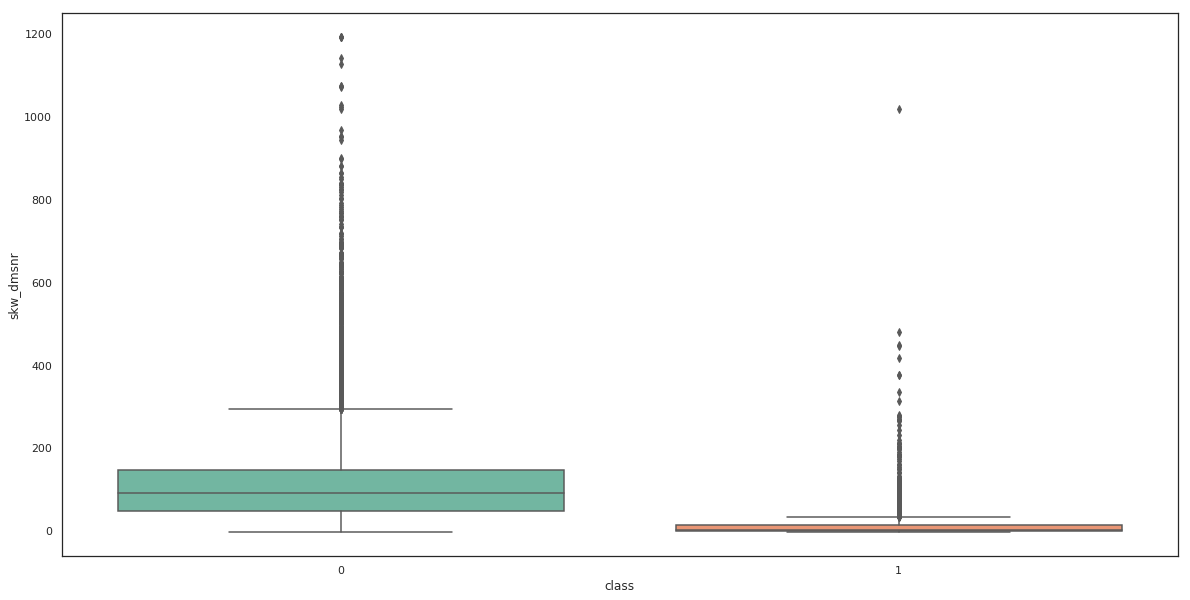

In [747]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = 'skw_dmsnr', data=pulsars_Df)
plt.show()

Since the dataset is unbalanced we can see that non-pulsar stars reflect same pattern as the entire dataset for this value, having 50% records in the range of (0,180) and a lot of outliers on the hihgher end. On the other hand pulsar stars form a smaller range near 0 and the outliers for this subset falls within the normal range of the entire dataset. Since the data range is so high, log value will show a better distinction

/home/rajat/venv/data-science/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


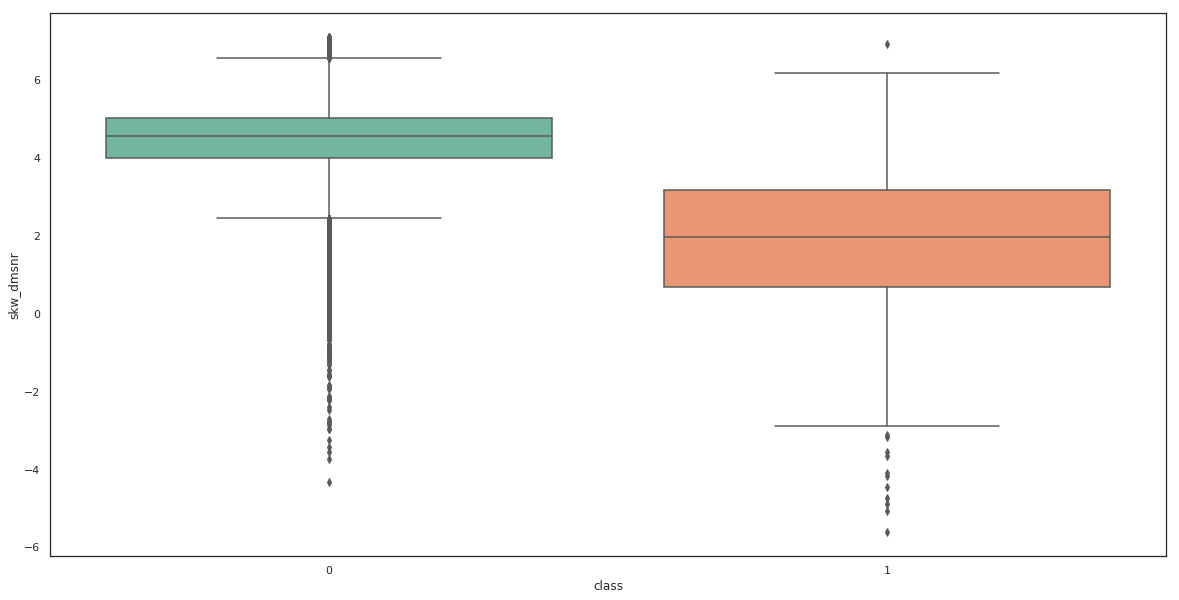

In [748]:
fig, axes = plt.subplots(1,1,figsize = (20,10))
axes = sns.boxplot(x = 'class', y = np.log(pulsars_Df['skw_dmsnr']), data=pulsars_Df)
plt.show()

Clearly the skewness of DM_SNR profile for the 2 classes is not overlapping , and also indicates that pulsars show a wider range with a fewer outliers compared to non-pulsars that show a narrow range and more outliers

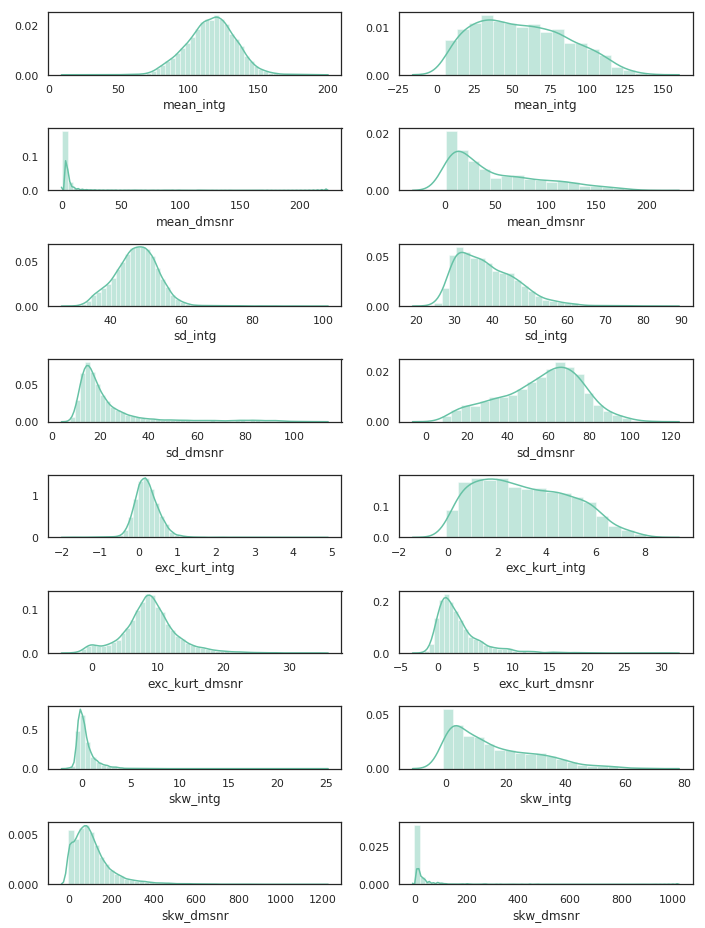

In [749]:


f,axes = plt.subplots(8,2,figsize=(10,13))
#f.figsize(15,15)
#f = plt.figure(figsize=(15,15))
sns.distplot(pulsars_Df[pulsars_Df['class']==0]['mean_intg'] ,kde=True, ax=axes[0,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['mean_intg'],kde=True, ax=axes[0,1])

sns.distplot(pulsars_Df[pulsars_Df['class']==0][pulsars_Df['class']==0]['mean_dmsnr'] ,kde=True, ax=axes[1,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1][pulsars_Df['class']==1]['mean_dmsnr'],kde=True, ax=axes[1,1])

#sns.distplot(pulsars_Df['mean_dmsnr'],kde=True, ax=axes[0,1])
sns.distplot(pulsars_Df[pulsars_Df['class']==0]['sd_intg'],kde=True, ax=axes[2,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['sd_intg'],kde=True, ax=axes[2,1])

sns.distplot(pulsars_Df[pulsars_Df['class']==0]['sd_dmsnr'],kde=True, ax=axes[3,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['sd_dmsnr'],kde=True, ax=axes[3,1])

sns.distplot(pulsars_Df[pulsars_Df['class']==0]['exc_kurt_intg'],kde=True, ax=axes[4,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['exc_kurt_intg'],kde=True, ax=axes[4,1])

sns.distplot(pulsars_Df[pulsars_Df['class']==0]['exc_kurt_dmsnr'],kde=True, ax=axes[5,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['exc_kurt_dmsnr'],kde=True, ax=axes[5,1])

sns.distplot(pulsars_Df[pulsars_Df['class']==0]['skw_intg'],kde=True, ax=axes[6,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['skw_intg'],kde=True, ax=axes[6,1])

sns.distplot(pulsars_Df[pulsars_Df['class']==0]['skw_dmsnr'],kde=True, ax=axes[7,0])
sns.distplot(pulsars_Df[pulsars_Df['class']==1]['skw_dmsnr'],kde=True, ax=axes[7,1])

plt.tight_layout()

Text(0.5, 0, 'skw_intg')

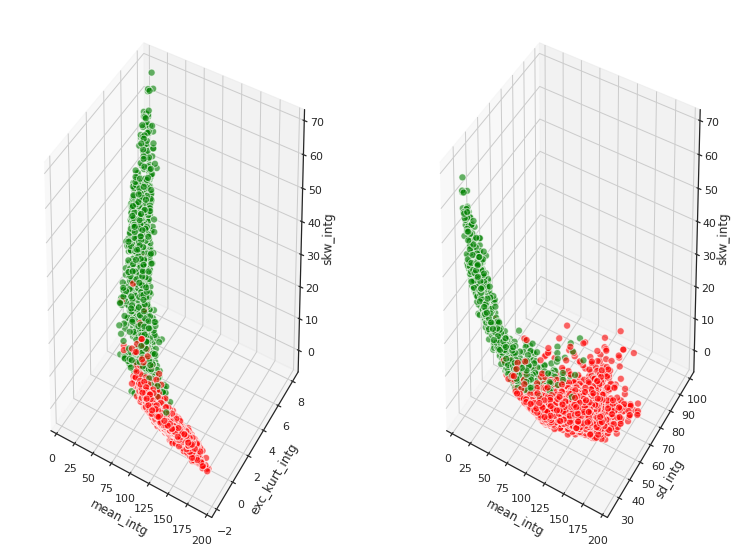

In [750]:
from mpl_toolkits.mplot3d import Axes3D
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(13, 10))
#f,axes = plt.subplots(1,2,figsize=(10,13))
ax = fig.add_subplot(121, projection='3d')

xs = pulsars_Df['mean_intg']
ys = pulsars_Df['exc_kurt_intg']
zs = pulsars_Df['skw_intg']
color= ['red' if l == 0 else 'green' for l in pulsars_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_xlabel('mean_intg')
ax.set_ylabel('exc_kurt_intg')
ax.set_zlabel('skw_intg')

#fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(122, projection='3d')

xs = pulsars_Df['mean_intg']
ys = pulsars_Df['sd_intg']
zs = pulsars_Df['skw_intg']
color= ['red' if l == 0 else 'green' for l in pulsars_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_xlabel('mean_intg')
ax.set_ylabel('sd_intg')
ax.set_zlabel('skw_intg')

-- green for pulsars and red for non-pulsars  
Based on the integrated profile values, we can see that the records show 2 distinct clusters with some overlap. 

Pulsars generally have a lower mean value for integrated profile with a few outliers having higher value, on the other hand non-pulsars have a wide range of mean values for hte integrated profile.

Pulsars have a higher range of skewness for the integrated profile while non-pulsars have lower range of skewness 

excess kurtosis for integrated profile , similar to mean values differentiate the 2 classes with a small  overlap 

Std deviation for the integrated profile shows an overalap between the classes.

Text(0.5, 0, 'skw_dmsnr')

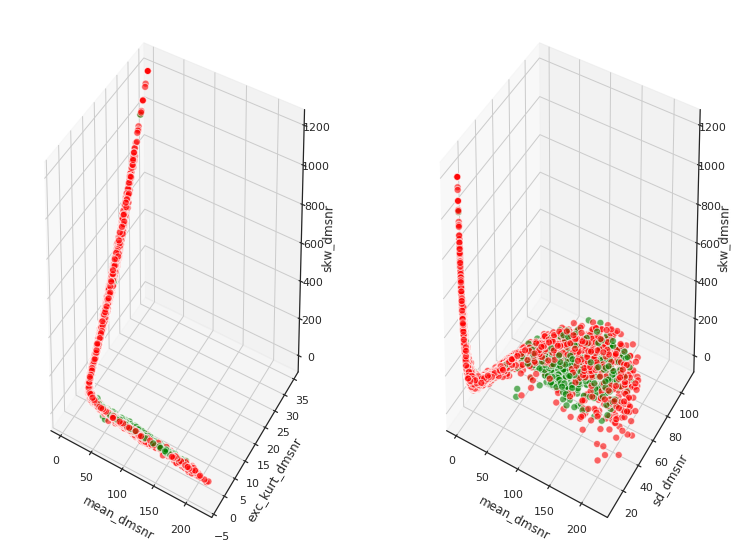

In [751]:
fig = plt.figure(figsize=(13, 10))
#f,axes = plt.subplots(1,2,figsize=(10,13))
ax = fig.add_subplot(121, projection='3d')

xs = pulsars_Df['mean_dmsnr']
ys = pulsars_Df['exc_kurt_dmsnr']
zs = pulsars_Df['skw_dmsnr']
color= ['red' if l == 0 else 'green' for l in pulsars_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_xlabel('mean_dmsnr')
ax.set_ylabel('exc_kurt_dmsnr')
ax.set_zlabel('skw_dmsnr')

#fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(122, projection='3d')

xs = pulsars_Df['mean_dmsnr']
ys = pulsars_Df['sd_dmsnr']
zs = pulsars_Df['skw_dmsnr']
color= ['red' if l == 0 else 'green' for l in pulsars_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_xlabel('mean_dmsnr')
ax.set_ylabel('sd_dmsnr')
ax.set_zlabel('skw_dmsnr')

-- green for pulsars and red for non-pulsars

There is a lot of overlap in the DM_SNR profile. Few inferences though,
mean is low , close to 0, skewness has a wide range, as mean increases > 0 , skewness is relatively low 

for lower mean values in this profile, excess kurtosis increases as skewness increases.

For the higher mean, low skewness records, std deviation is all over and shows a somwhat circular plot,with a lot of overlap

In [752]:
## Attempt to diff variables for integrated profile and DM_SNR profile to see if these show less overlap in clusters
pulsars_diff_Df=pulsars_Df.copy()
pulsars_diff_Df['mean_diff']=pulsars_diff_Df['mean_intg']-pulsars_diff_Df['mean_dmsnr']
pulsars_diff_Df['sd_diff']=pulsars_diff_Df['sd_intg']-pulsars_diff_Df['sd_dmsnr']
pulsars_diff_Df['exc_kurt_diff']=pulsars_diff_Df['exc_kurt_intg']-pulsars_diff_Df['exc_kurt_dmsnr']
pulsars_diff_Df['skw_diff']=pulsars_diff_Df['skw_intg']-pulsars_diff_Df['skw_dmsnr']

Text(0.5, 0, 'skw_diff')

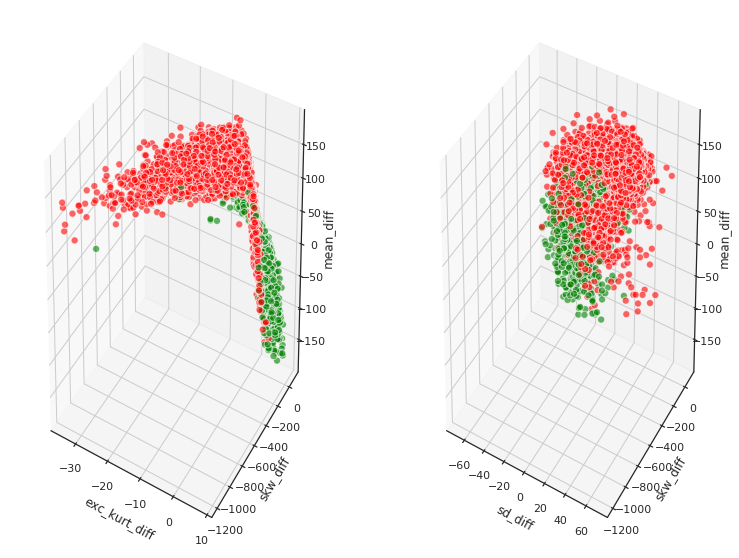

In [753]:
fig = plt.figure(figsize=(13, 10))
#f,axes = plt.subplots(1,2,figsize=(10,13))
ax = fig.add_subplot(121, projection='3d')

zs = pulsars_diff_Df['mean_diff']
xs = pulsars_diff_Df['exc_kurt_diff']
ys = pulsars_diff_Df['skw_diff']
color= ['red' if l == 0 else 'green' for l in pulsars_diff_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_zlabel('mean_diff')
ax.set_xlabel('exc_kurt_diff')
ax.set_ylabel('skw_diff')

#fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(122, projection='3d')

zs = pulsars_diff_Df['mean_diff']
xs = pulsars_diff_Df['sd_diff']
ys = pulsars_diff_Df['skw_diff']
color= ['red' if l == 0 else 'green' for l in pulsars_diff_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_zlabel('mean_diff')
ax.set_xlabel('sd_diff')
ax.set_ylabel('skw_diff')

Text(0.5, 0, 'skw_diff')

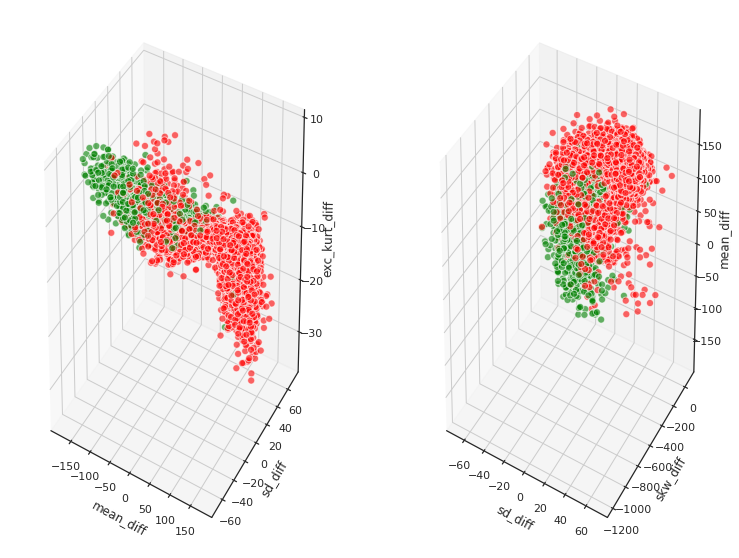

In [754]:
fig = plt.figure(figsize=(13, 10))
#f,axes = plt.subplots(1,2,figsize=(10,13))
ax = fig.add_subplot(121, projection='3d')

xs = pulsars_diff_Df['mean_diff']
zs = pulsars_diff_Df['exc_kurt_diff']
ys = pulsars_diff_Df['sd_diff']
color= ['red' if l == 0 else 'green' for l in pulsars_diff_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_xlabel('mean_diff')
ax.set_zlabel('exc_kurt_diff')
ax.set_ylabel('sd_diff')

#fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(122, projection='3d')

zs = pulsars_diff_Df['mean_diff']
xs = pulsars_diff_Df['sd_diff']
ys = pulsars_diff_Df['skw_diff']
color= ['red' if l == 0 else 'green' for l in pulsars_diff_Df['class']]

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w', color = color)

ax.set_zlabel('mean_diff')
ax.set_xlabel('sd_diff')
ax.set_ylabel('skw_diff')

Multiple combinations of the diff variables, show a lot of overlap for the 2 classes. Overall from the 3D plots , we can see that integrated profiles show less overlap between the classes but the DM_SNR profile and the diff values show a great overlap and so other methods will be looked into to help with better clustering

In [755]:
imputedPulsarDf = pulsars_Df.copy()
imputedPulsarDf['log_mean_dmsnr'] = np.log(imputedPulsarDf['mean_dmsnr'])
imputedPulsarDf['log_sd_dmsnr'] = np.log(imputedPulsarDf['sd_dmsnr'])
imputedPulsarDf.drop(['sd_dmsnr', 'mean_dmsnr'], axis = 1, inplace = True)
imputedPulsarDf.describe()

mean_intg       sd_intg  exc_kurt_intg      skw_intg  \
count  17898.000000  17898.000000   17898.000000  17898.000000   
mean     111.079968     46.549532       0.477857      1.770279   
std       25.652935      6.843189       1.064040      6.167913   
min        5.812500     24.772042      -1.876011     -1.791886   
25%      100.929688     42.376018       0.027098     -0.188572   
50%      115.078125     46.947479       0.223240      0.198710   
75%      127.085938     51.023202       0.473325      0.927783   
max      192.617188     98.778911       8.069522     68.101622   

       exc_kurt_dmsnr     skw_dmsnr         class  log_mean_dmsnr  \
count    17898.000000  17898.000000  17898.000000    17898.000000   
mean         8.303556    104.857709      0.091574        1.390669   
std          4.506092    106.514540      0.288432        1.235812   
min         -3.139270     -1.976976      0.000000       -1.545474   
25%          5.781506     34.960504      0.000000        0.653926   
50%          8.433515     83.064556      0.000000        1.030276   
75%         10.702959    139.309331      0.000000        1.698228   
max         34.539844   1191.000837      1.000000        5.408929   

       log_sd_dmsnr  
count  17898.000000  
mean       3.079164  
std        0.572203  
min        1.997476  
25%        2.669817  
50%        2.915677  
75%        3.347378  
max        4.706302

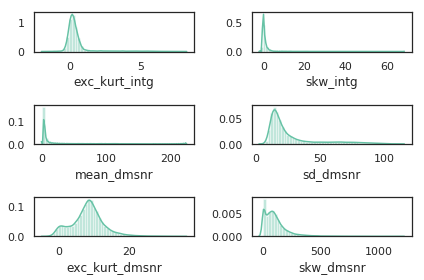

In [756]:
f,axes = plt.subplots(3,2)
sns.distplot(pulsars_Df['exc_kurt_intg'],kde=True, ax=axes[0,0])
sns.distplot(pulsars_Df['skw_intg'],kde=True, ax=axes[0,1])
sns.distplot(pulsars_Df['mean_dmsnr'],kde=True, ax=axes[1,0])
sns.distplot(pulsars_Df['sd_dmsnr'],kde=True, ax=axes[1,1])
sns.distplot(pulsars_Df['exc_kurt_dmsnr'],kde=True, ax=axes[2,0])
sns.distplot(pulsars_Df['skw_dmsnr'],kde=True, ax=axes[2,1])
plt.tight_layout()

## Pairs Plot

CPU times: user 3 µs, sys: 3 µs, total: 6 µs
Wall time: 5.48 µs


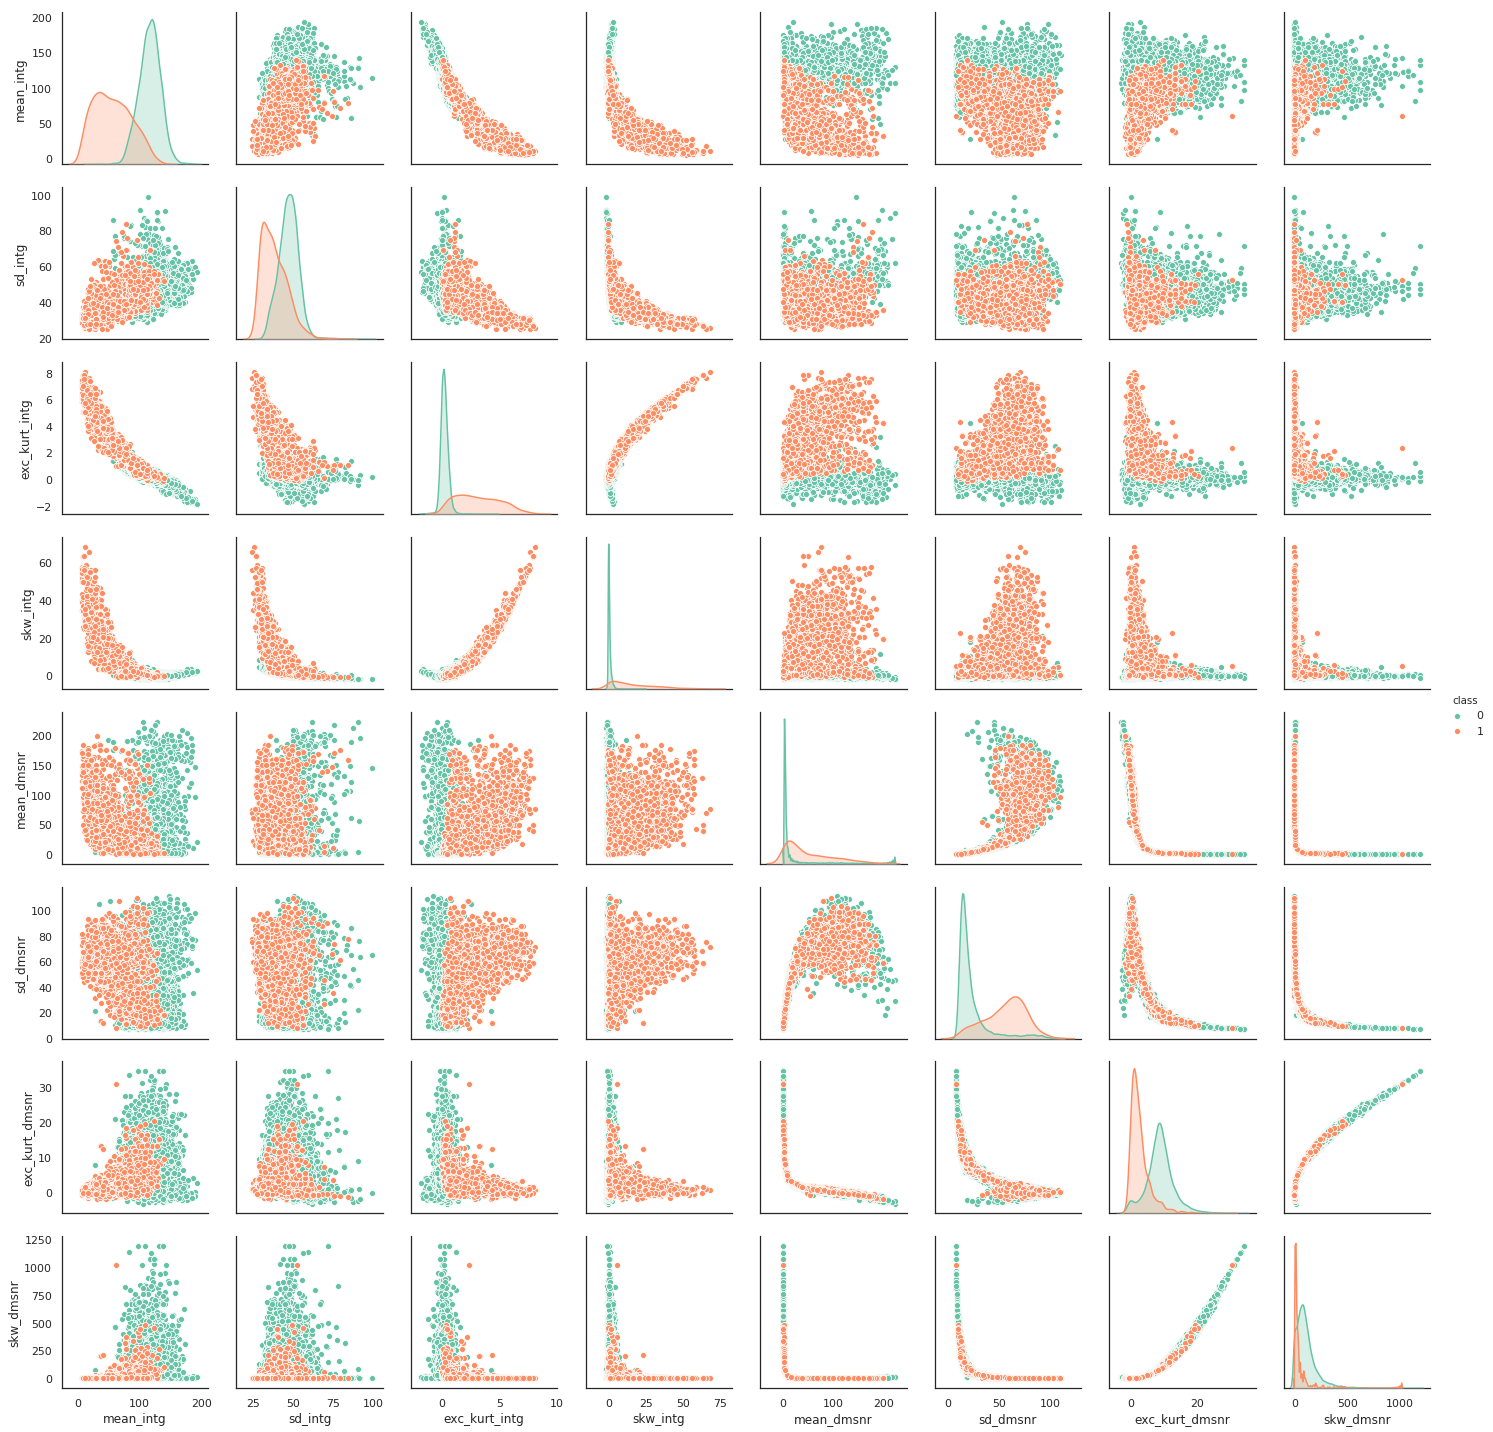

In [757]:
%time
sns.pairplot(data = pulsars_Df, vars=pulsars_Df.drop('class', axis = 1), hue='class')

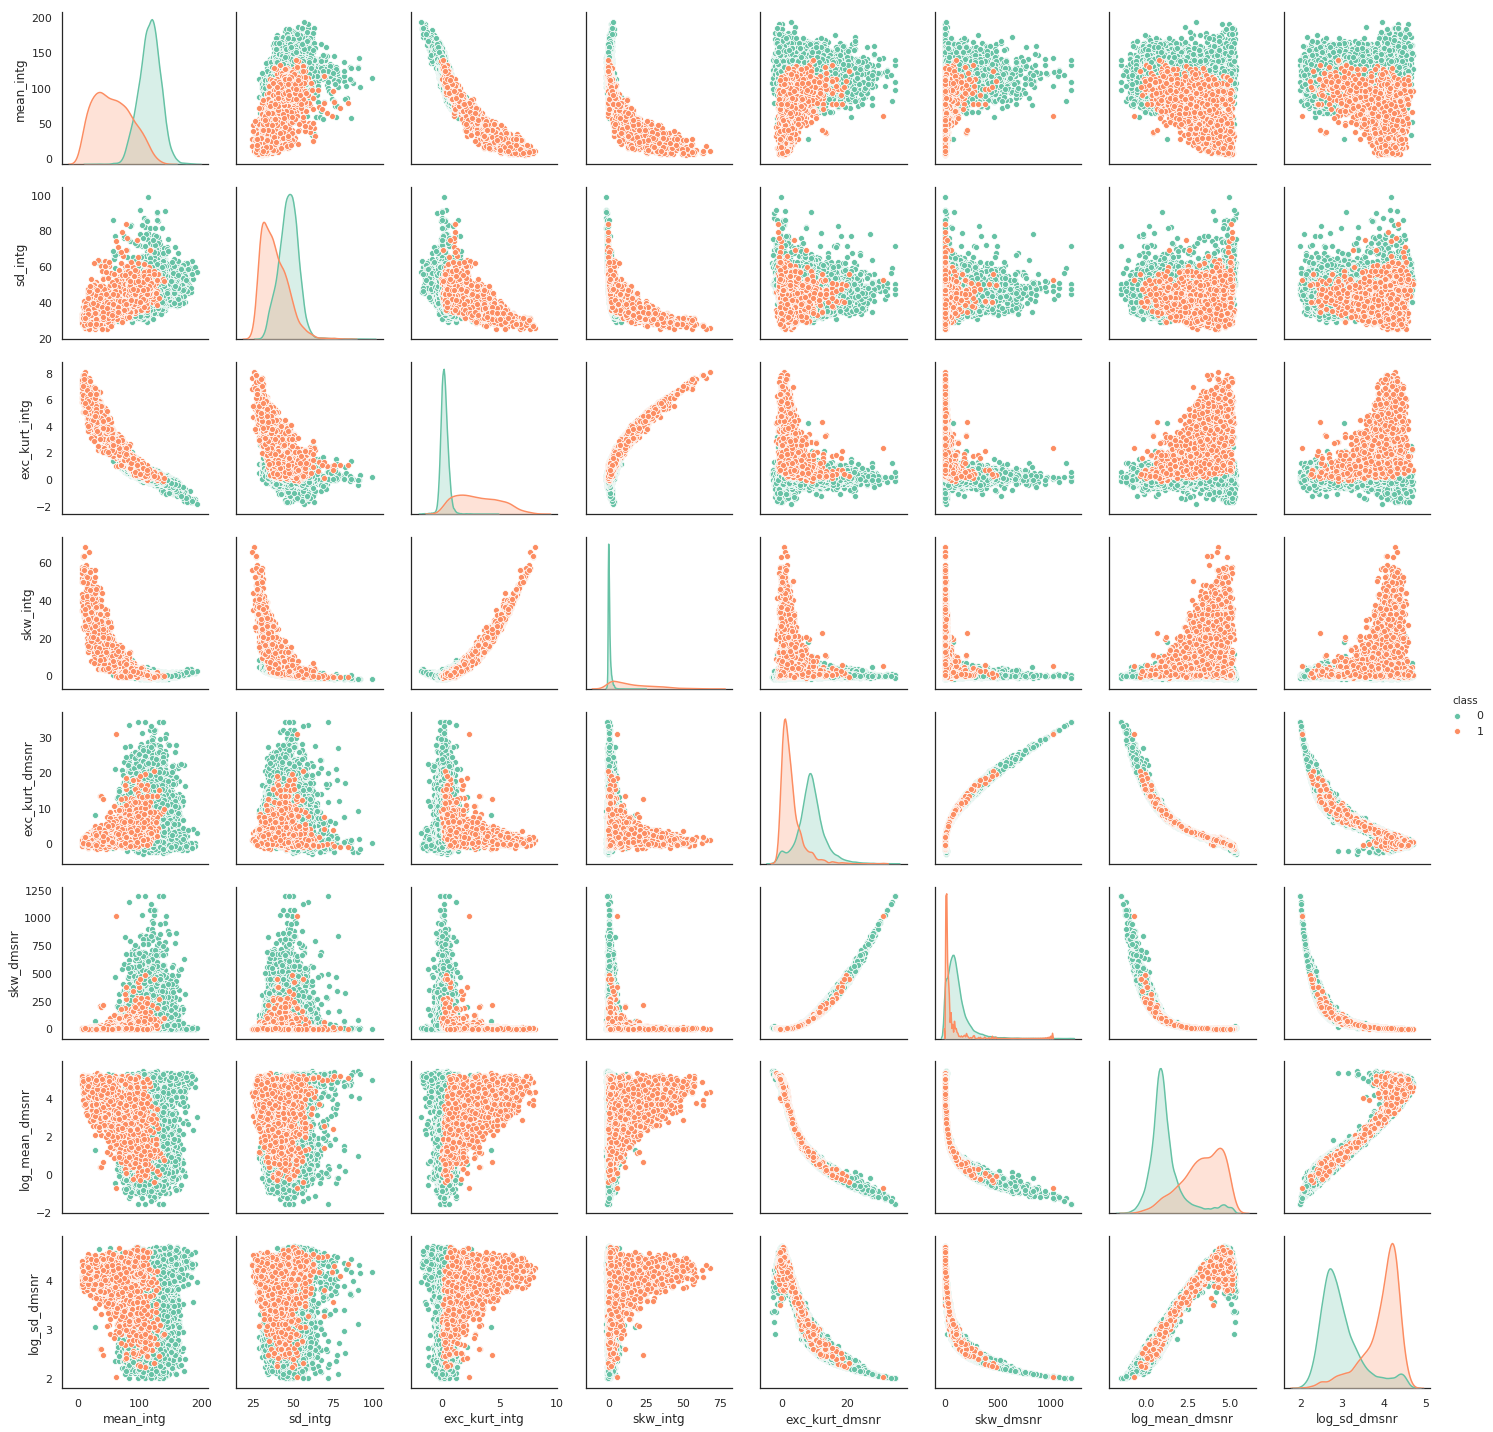

In [758]:
sns.pairplot(data = imputedPulsarDf, vars=imputedPulsarDf.drop('class', axis = 1), hue='class')

## Correlation Heat Map

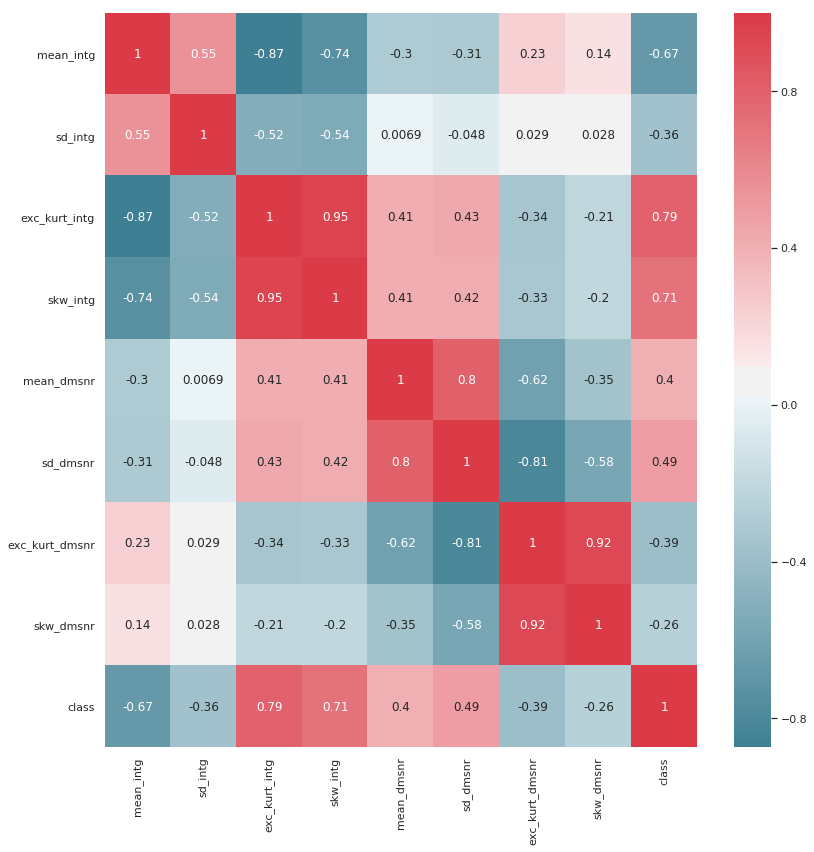

In [759]:
#Create heat map
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(pulsars_Df.corr(), cmap=sns.diverging_palette( 220 , 10 , as_cmap = True ), annot=True)
f.tight_layout()

In [760]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Standardize and Scale the dataset

scaler = StandardScaler()
scaledPulsarData = scaler.fit(imputedPulsarDf.drop("class", axis =1)).transform(imputedPulsarDf.drop("class", axis =1))


In [761]:
# Perform PCA and plot Scree plot

# initially set n_compoments = no of features and later look at variance explained in Scree plot
# To choose number of PCA components 

pca = PCA(n_components=8)
X_pca = pca.fit(scaledPulsarData).transform(scaledPulsarData)
print(scaledPulsarData.shape)
print(X_pca.shape)

(17898, 8)
(17898, 8)


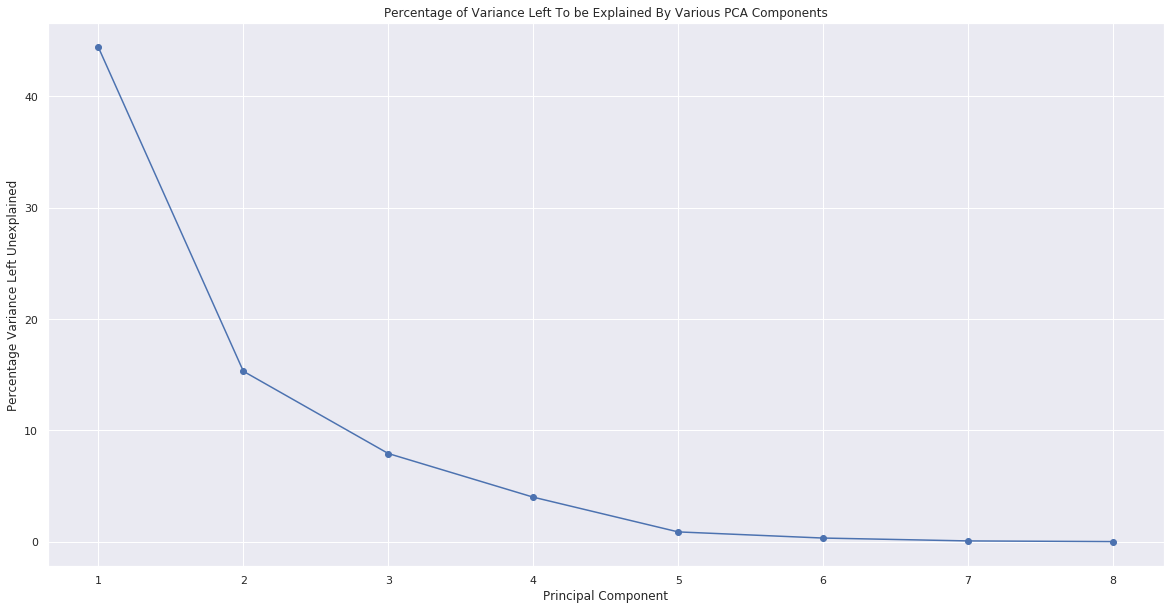

In [762]:
# Scree Plot
combinedVarExplained = []

for varExplained in list(pca.explained_variance_ratio_):
    if len(combinedVarExplained) != 0:
        combinedVarExplained.append(combinedVarExplained[-1] + varExplained)
    else:
        combinedVarExplained.append(varExplained)

unexplainedVarLeft = list((1 - np.array(combinedVarExplained)) * 100)
  
fig, axes = plt.subplots(1,1,figsize = (20,10))   
axes = plt.plot(range(1, 9), unexplainedVarLeft, '-o')
plt.title('Percentage of Variance Left To be Explained By Various PCA Components')
plt.ylabel('Percentage Variance Left Unexplained')
plt.xlabel('Principal Component')
plt.show()

In [763]:
###### Function Taken from Dr. Larsons Notebook ##############################

# this function definition just formats the weights into readable strings
# you can skip it without loss of generality to the Data Science content
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:])
        tmp_array.append(tmp_string)
    return tmp_array
  
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, imputedPulsarDf.drop("class", axis =1).columns) 

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])
df_pca["class"] = imputedPulsarDf["class"]


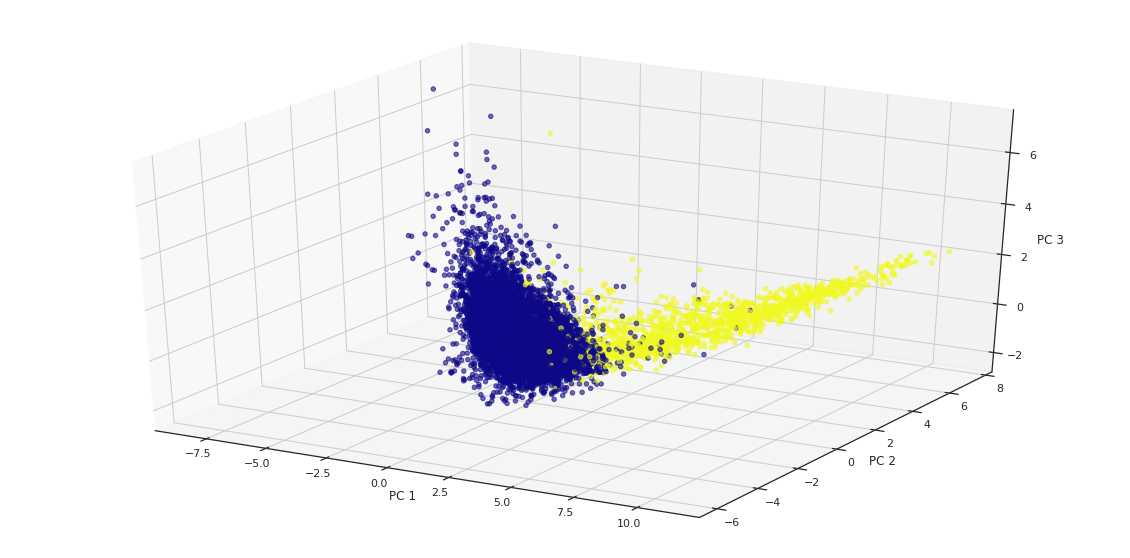

In [764]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style="white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], c=np.ndarray.flatten(df_pca['class'].values), cmap='plasma', alpha =0.6)

ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

plt.grid()

plt.show()

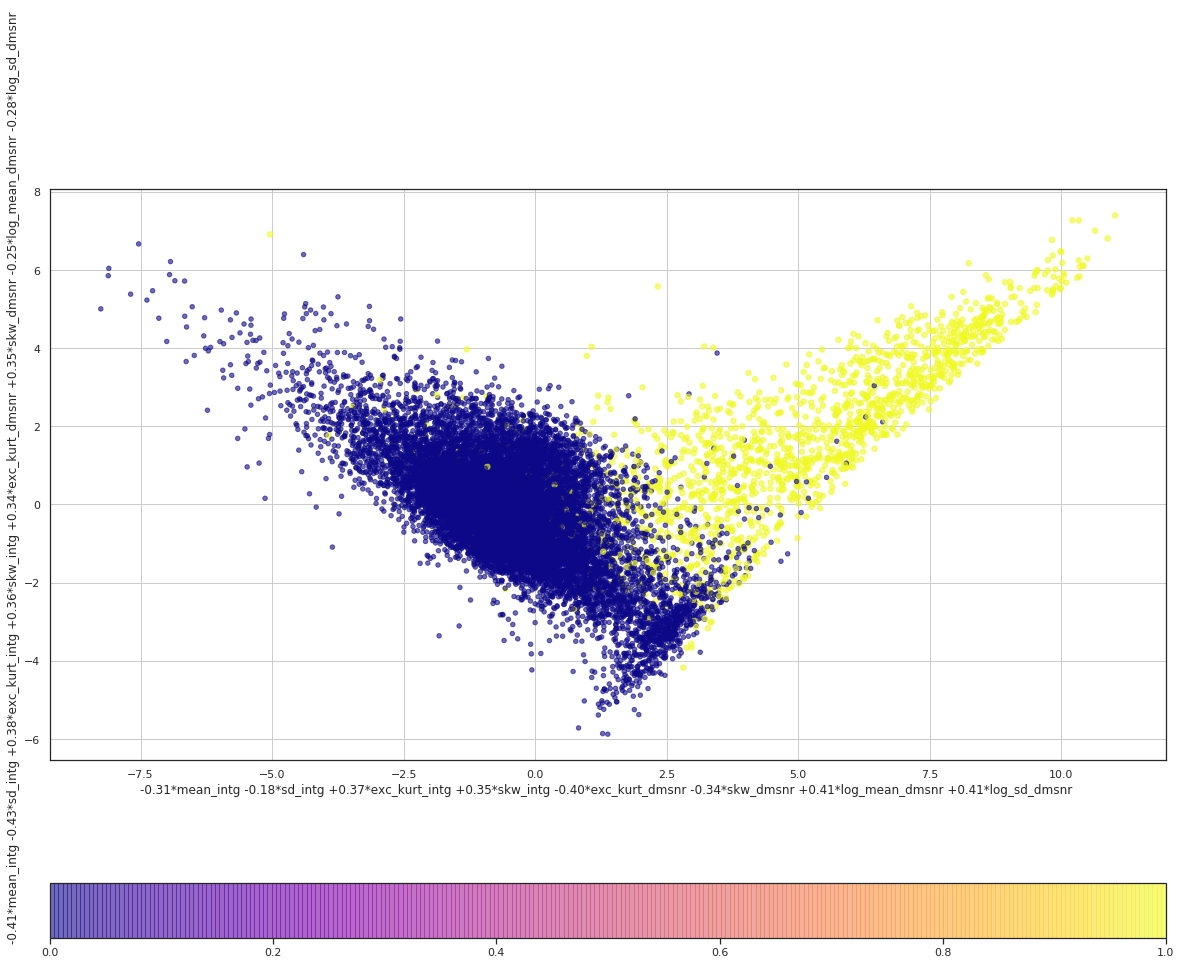

In [765]:
# Plot 2D Plot for first 2 Principal Components

plt.figure(figsize=(20,15))
sns.set(style="white")
plt.scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["class"], cmap ="plasma", s = (df_pca["class"] + 2)*10, alpha = 0.6)
plt.xlabel(pca_weight_strings[0])
plt.ylabel(pca_weight_strings[1])
plt.grid()
plt.colorbar(orientation = 'horizontal')

In [766]:
# Perform The LDA
lda = LDA(n_components=1)
X_lda = lda.fit(X = imputedPulsarDf.drop("class", axis =1), \
                y = imputedPulsarDf['class']).transform(imputedPulsarDf.drop("class", axis =1))
lda_weight_strings = get_feature_names_from_weights(lda.scalings_.T, imputedPulsarDf.drop("class", axis =1).columns)
df_lda = pd.DataFrame(X_lda,columns=[lda_weight_strings])
df_lda["class"] = imputedPulsarDf["class"]

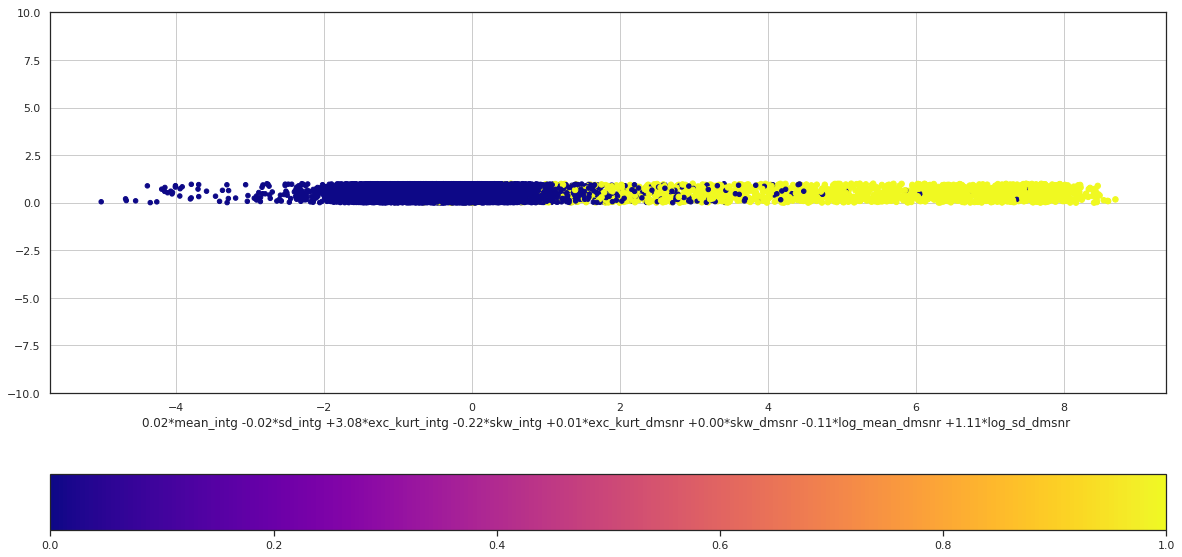

In [767]:
plt.figure(figsize=(20,10))
plt.scatter(x = df_lda[lda_weight_strings[0]] , y = np.zeros(df_lda[lda_weight_strings[0]].shape[0]) + \
            np.random.rand(df_lda[lda_weight_strings[0]].shape[0]), \
            c = df_lda["class"], cmap ="plasma", s = (df_lda["class"] + 2)*10)
plt.xlabel(lda_weight_strings[0])
plt.ylim(-10,10)
plt.colorbar(orientation = 'horizontal')
plt.grid()

In [821]:
# Test K Means
from sklearn.cluster import KMeans
k = 5
X = X_pca[: , [0,1,2]]
kmeans = KMeans(n_clusters=k, random_state=999)
y_pred = kmeans.fit_predict(X)

In [769]:
y_pred

array([2, 2, 0, ..., 3, 2, 3], dtype=int32)

In [770]:
from sklearn.metrics import silhouette_score

silhouette_score_list = []

for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=999)
    kmeans.fit_predict(X)
    silhouette_score_list.append(silhouette_score(X, kmeans.labels_))

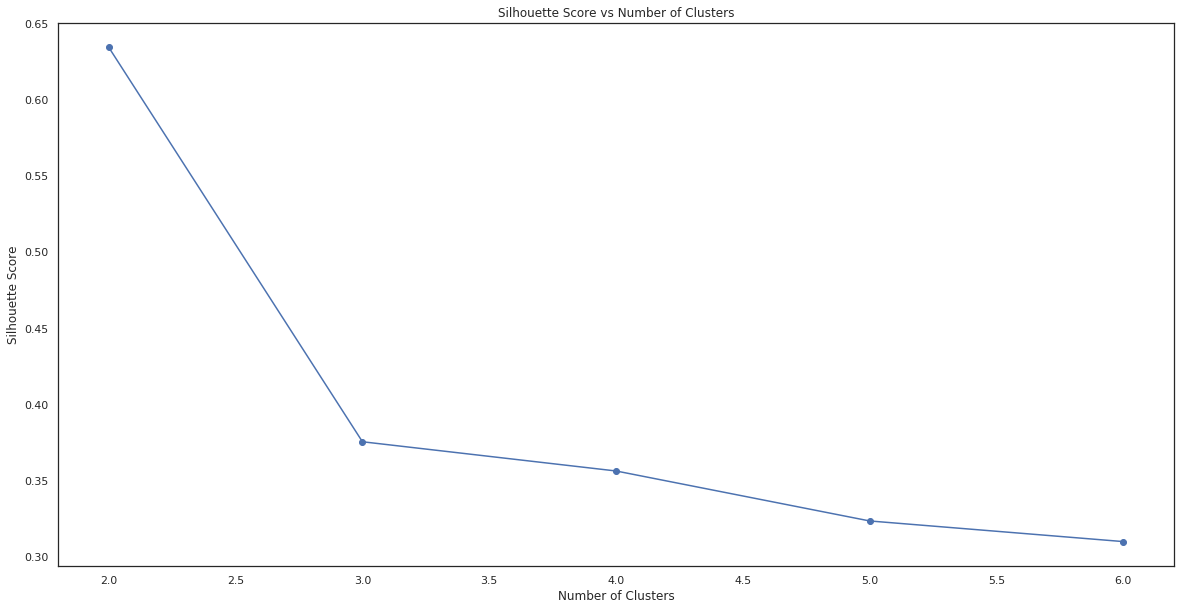

In [771]:
fig, axes = plt.subplots(1,1,figsize = (20,10))   
axes = plt.plot(range(2, 7), silhouette_score_list, '-o')
plt.title('Silhouette Score vs Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.show()

In [772]:
# Now running with 2 clusters as identified by highest Silhouette Score and dataset domain knowledge
k = 2
kmeans = KMeans(n_clusters=k, random_state=999)
y_pred = kmeans.fit_predict(X)

In [773]:
from sklearn.metrics import adjusted_rand_score

rand_score_pca_kmeans = adjusted_rand_score(imputedPulsarDf['class'].values, y_pred)

rand_score_pca_kmeans

0.768832906933443

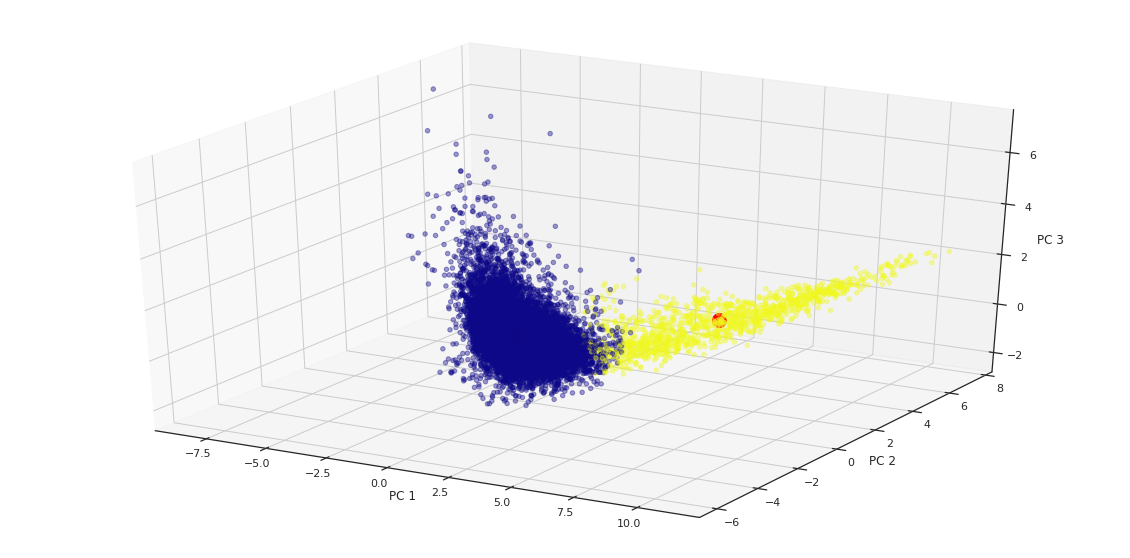

In [774]:

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[: , 0], X[: , 1], X[: , 2], c= (1- kmeans.labels_), cmap='plasma', alpha = 0.4)

for i,j,k in kmeans.cluster_centers_:
    ax.scatter(i,j,k,s=200,c='red',marker='o', alpha = 1)
    
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")

plt.grid()

plt.show()

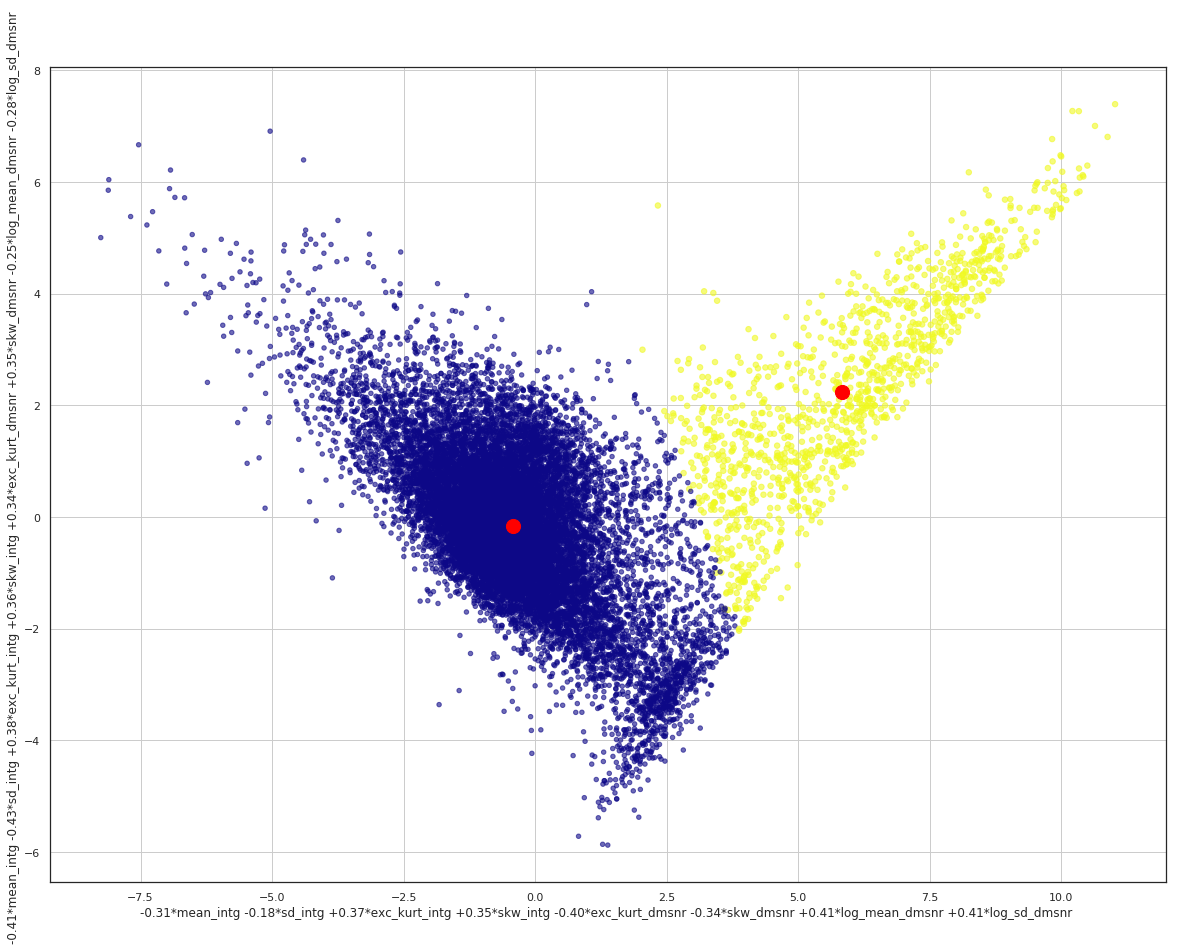

In [775]:
# Plot 2D Plot for first 2 Principal Components with cluster labels

plt.figure(figsize=(20,15))
sns.set(style="white")
plt.scatter(x = X[: , 0], y = X[: , 1] , \
            c = (1- kmeans.labels_) , cmap ="plasma", s = ((1- kmeans.labels_) + 2)*10, alpha =0.6)

for i,j,k in kmeans.cluster_centers_:
    plt.scatter(i,j,s=200,c='red',marker='o')
plt.xlabel(pca_weight_strings[0])
plt.ylabel(pca_weight_strings[1])
plt.grid()


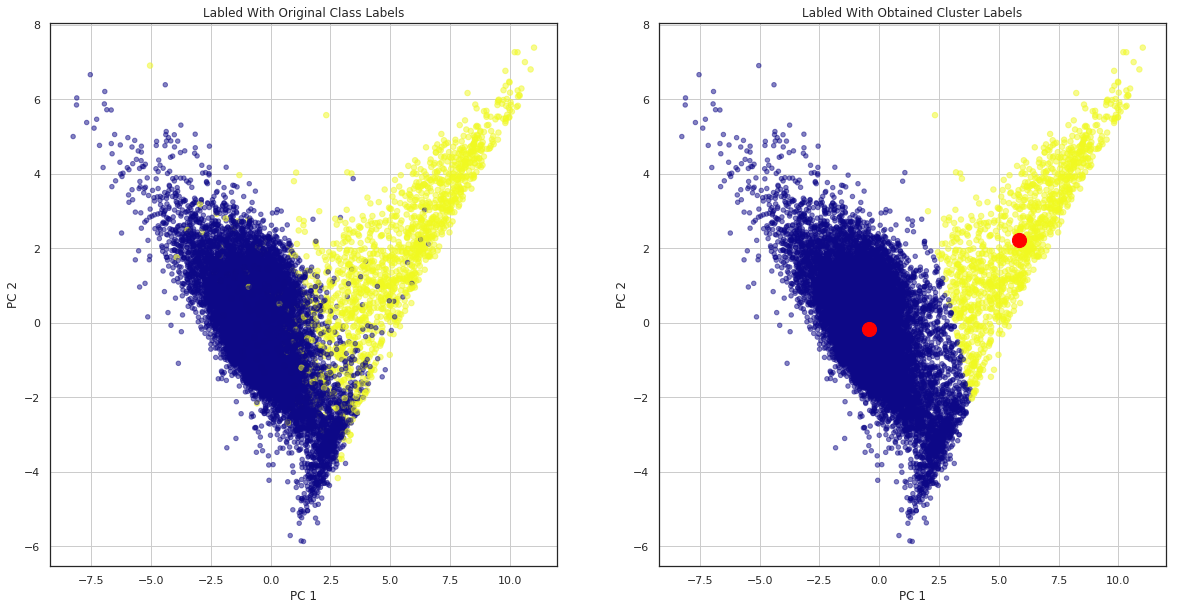

In [776]:
# Plotting 2d Graphs for Initial PCA with class label and PCA after Clustering graphs for visually inspecting
# clustering tendency in the data

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.set(style="white")
ax[0].scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["class"], cmap ="plasma", s = (df_pca["class"] + 2)*10, alpha = 0.5)

ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[0].set_title("Labled With Original Class Labels")
ax[0].grid()

ax[1].scatter(x = X[: , 0], y = X[: , 1] , \
            c = (1- kmeans.labels_) , cmap ="plasma", s = ((1- kmeans.labels_) + 2)*10, alpha = 0.5)

for i,j,k in kmeans.cluster_centers_:
    ax[1].scatter(i,j,s=200,c='red',marker='o')

ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 2")
ax[1].set_title("Labled With Obtained Cluster Labels")

ax[1].grid()


In [777]:
## Try Agglomerative clustering and visualize the resulting clusters

# First create a grid search like fn that will create a grid of parameters.
def make_generator(parameters):
    if not parameters:
        yield dict()
    else:
        key_to_iterate = list(parameters.keys())[0]
        next_round_parameters = {p : parameters[p]
                    for p in parameters if p != key_to_iterate}
        for val in parameters[key_to_iterate]:
            for pars in make_generator(next_round_parameters):
                temp_res = pars
                temp_res[key_to_iterate] = val
                yield temp_res

In [778]:
# add fix parameters
fixed_params = {"n_clusters": 2 } 

# Add variable parameters
param_grid = {"affinity": ["l1", "l2", "manhattan", "cosine"], "linkage": ["complete", "average", "single"] }

# Seperate Grid for ward linkage as it only uses euclidean distance
param_grid_ward = {"affinity": ["euclidean"], "linkage": ["ward"] }

In [779]:
# First run all the combinations except that involving ward linkage and record adjusted rand index and 
# silhouette score
from sklearn.cluster import AgglomerativeClustering
scoreDict = {}

for params in make_generator(param_grid):
    params.update(fixed_params)
    agClus = AgglomerativeClustering(**params)
    y_pred = agClus.fit_predict(X)
    scoreDict[str(params)] = (adjusted_rand_score(imputedPulsarDf['class'].values, y_pred), silhouette_score(X, y_pred))

In [780]:
# Run combination involing ward linkage now
for params in make_generator(param_grid_ward):
    params.update(fixed_params)
    agClus = AgglomerativeClustering(**params)
    y_pred = agClus.fit_predict(X)
    scoreDict[str(params)] = (adjusted_rand_score(imputedPulsarDf['class'].values, y_pred), silhouette_score(X, y_pred))

In [781]:
pd.DataFrame(scoreDict, index = ['Adjusted Rand Index', 'Silhouette Score']).T.sort_values(by=['Adjusted Rand Index'], \
                                                                                       ascending=False)


Adjusted Rand Index  \
{'linkage': 'ward', 'affinity': 'euclidean', 'n...             0.801518   
{'linkage': 'average', 'affinity': 'l2', 'n_clu...             0.743318   
{'linkage': 'complete', 'affinity': 'l2', 'n_cl...             0.724757   
{'linkage': 'complete', 'affinity': 'l1', 'n_cl...             0.346088   
{'linkage': 'complete', 'affinity': 'manhattan'...             0.346088   
{'linkage': 'average', 'affinity': 'cosine', 'n...             0.308548   
{'linkage': 'average', 'affinity': 'l1', 'n_clu...             0.299895   
{'linkage': 'average', 'affinity': 'manhattan',...             0.299895   
{'linkage': 'complete', 'affinity': 'cosine', '...             0.115011   
{'linkage': 'single', 'affinity': 'l1', 'n_clus...            -0.000100   
{'linkage': 'single', 'affinity': 'l2', 'n_clus...            -0.000100   
{'linkage': 'single', 'affinity': 'manhattan', ...            -0.000100   
{'linkage': 'single', 'affinity': 'cosine', 'n_...            -0.000100   

                                                    Silhouette Score  
{'linkage': 'ward', 'affinity': 'euclidean', 'n...          0.608321  
{'linkage': 'average', 'affinity': 'l2', 'n_clu...          0.634699  
{'linkage': 'complete', 'affinity': 'l2', 'n_cl...          0.618870  
{'linkage': 'complete', 'affinity': 'l1', 'n_cl...          0.598542  
{'linkage': 'complete', 'affinity': 'manhattan'...          0.598542  
{'linkage': 'average', 'affinity': 'cosine', 'n...          0.316667  
{'linkage': 'average', 'affinity': 'l1', 'n_clu...          0.690067  
{'linkage': 'average', 'affinity': 'manhattan',...          0.690067  
{'linkage': 'complete', 'affinity': 'cosine', '...          0.325172  
{'linkage': 'single', 'affinity': 'l1', 'n_clus...          0.670742  
{'linkage': 'single', 'affinity': 'l2', 'n_clus...          0.670742  
{'linkage': 'single', 'affinity': 'manhattan', ...          0.670742  
{'linkage': 'single', 'affinity': 'cosine', 'n_...         -0.333001

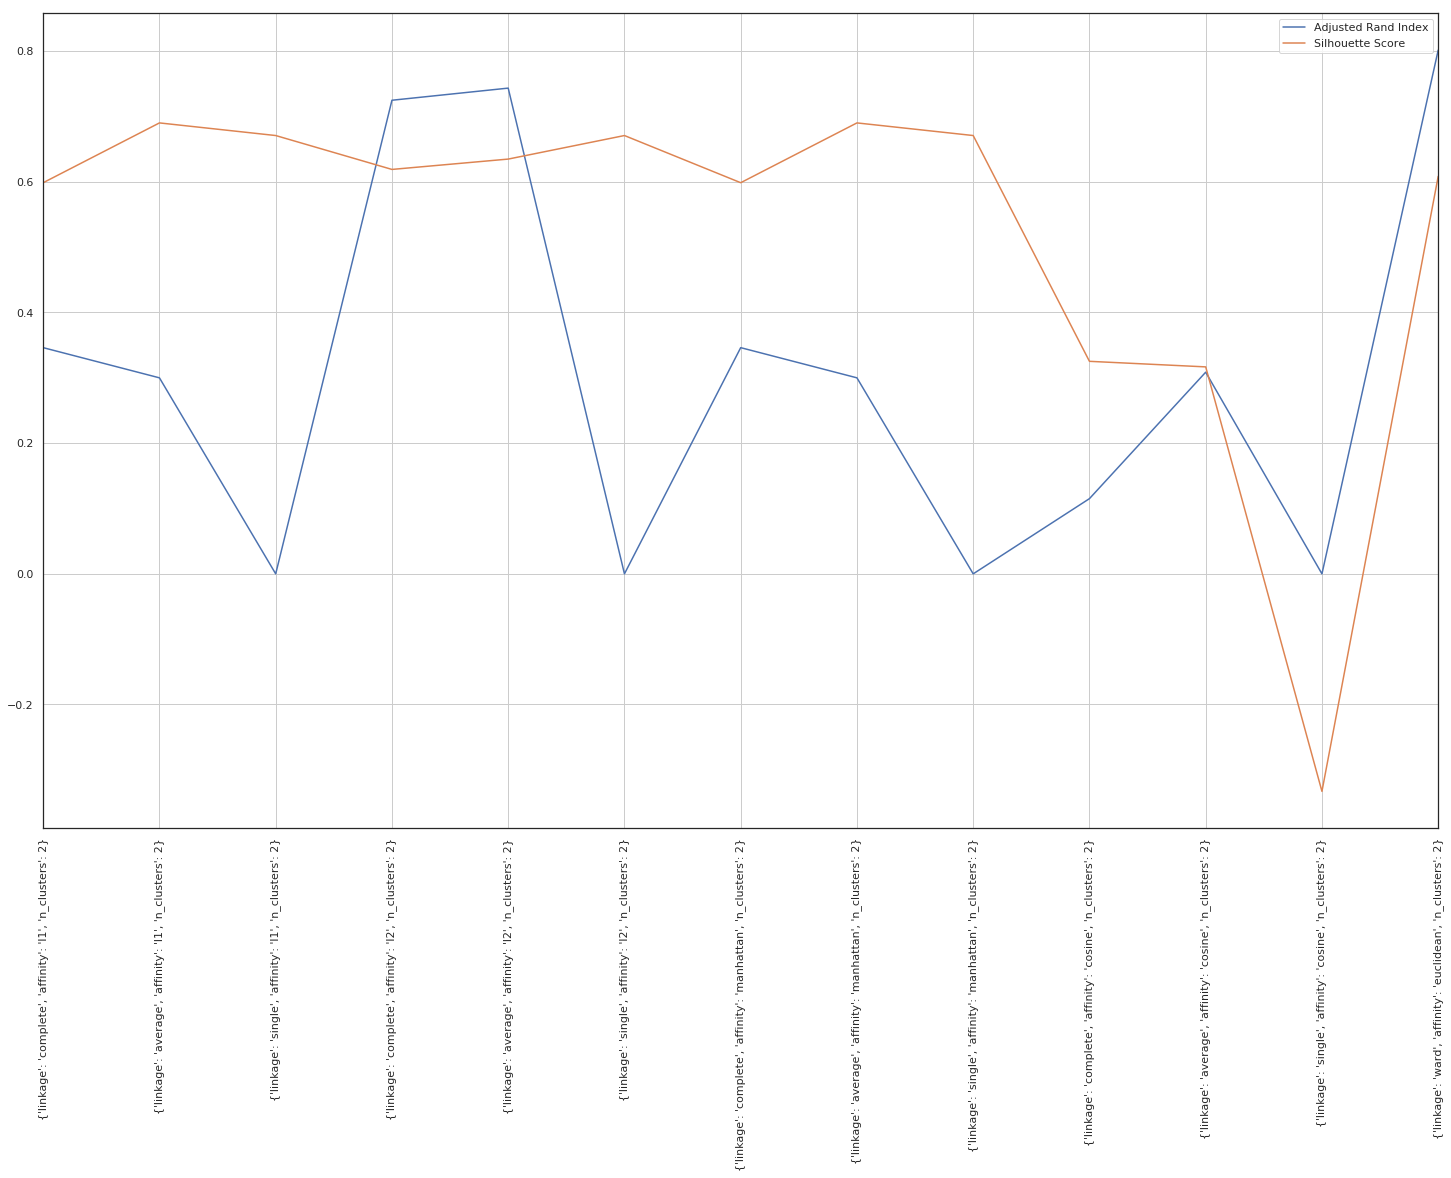

In [782]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (25,15))
sns.set(style="white")
tmpDf = pd.DataFrame(scoreDict, index = ['Adjusted Rand Index', 'Silhouette Score']).T
tmpDf.plot(ax=ax, grid = True)
plt.xticks(np.arange(len(tmpDf)), tmpDf.index, rotation=90)
plt.show()

In [783]:
agClusSingleLink = AgglomerativeClustering(linkage = 'single', affinity = 'l2', n_clusters = 2)
agClusSingleLink.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

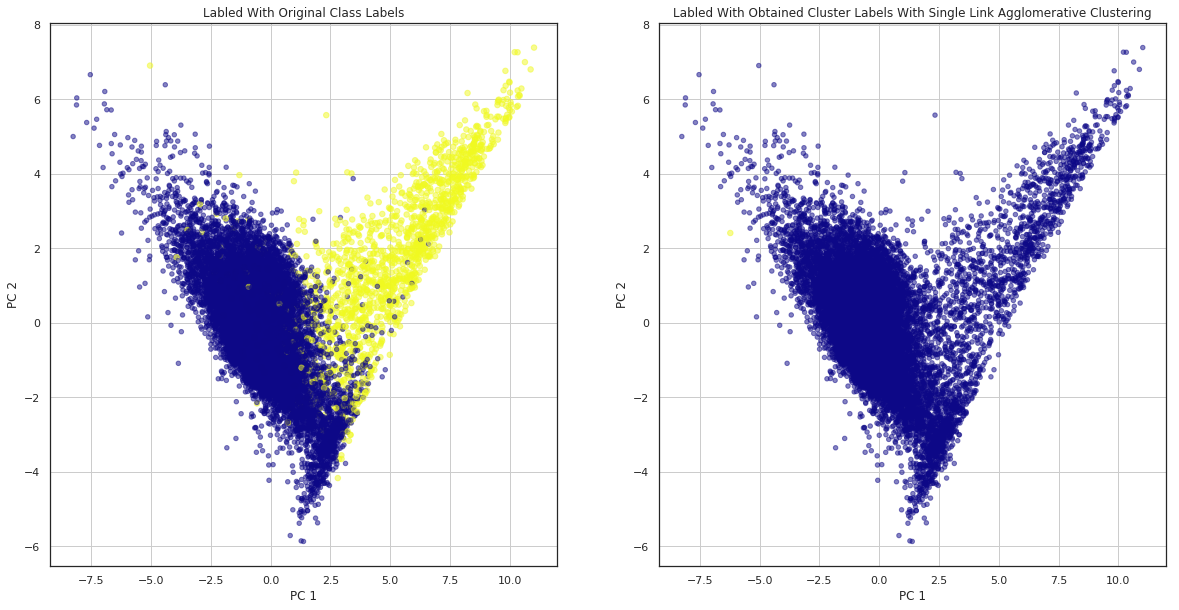

In [784]:
# Visualizing Single Link Agglomerative cluserting model that has relatve high silhouette score but poor rand Index

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.set(style="white")
ax[0].scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["class"], cmap ="plasma", s = (df_pca["class"] + 2)*10, alpha = 0.5)

ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[0].set_title("Labled With Original Class Labels")
ax[0].grid()

ax[1].scatter(x = X[: , 0], y = X[: , 1] , \
            c = (agClusSingleLink.labels_) , cmap ="plasma", s = ((agClusSingleLink.labels_) + 2)*10, alpha = 0.5)

ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 2")
ax[1].set_title("Labled With Obtained Cluster Labels With Single Link Agglomerative Clustering")

ax[1].grid()

In [785]:
# Now visualizing the ward linkage clustering that yielded the highest adjusted rand index
agClusWardLink = AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 2)
agClusWardLink.fit_predict(X)

array([0, 0, 0, ..., 0, 0, 0])

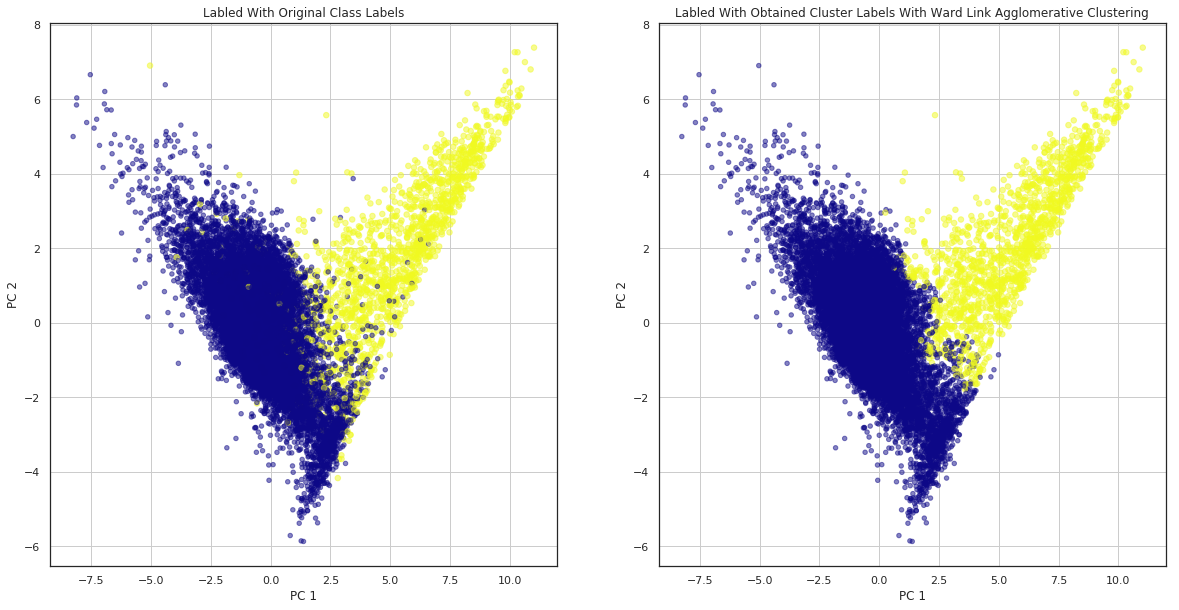

In [786]:
# Visualizing Ward Link Agglomerative cluserting model that has highest adjusted rand Index

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.set(style="white")
ax[0].scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["class"], cmap ="plasma", s = (df_pca["class"] + 2)*10, alpha = 0.5)

ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[0].set_title("Labled With Original Class Labels")
ax[0].grid()

ax[1].scatter(x = X[: , 0], y = X[: , 1] , \
            c = (agClusWardLink.labels_) , cmap ="plasma", s = ((agClusWardLink.labels_) + 2)*10, alpha = 0.5)

ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 2")
ax[1].set_title("Labled With Obtained Cluster Labels With Ward Link Agglomerative Clustering")

ax[1].grid()

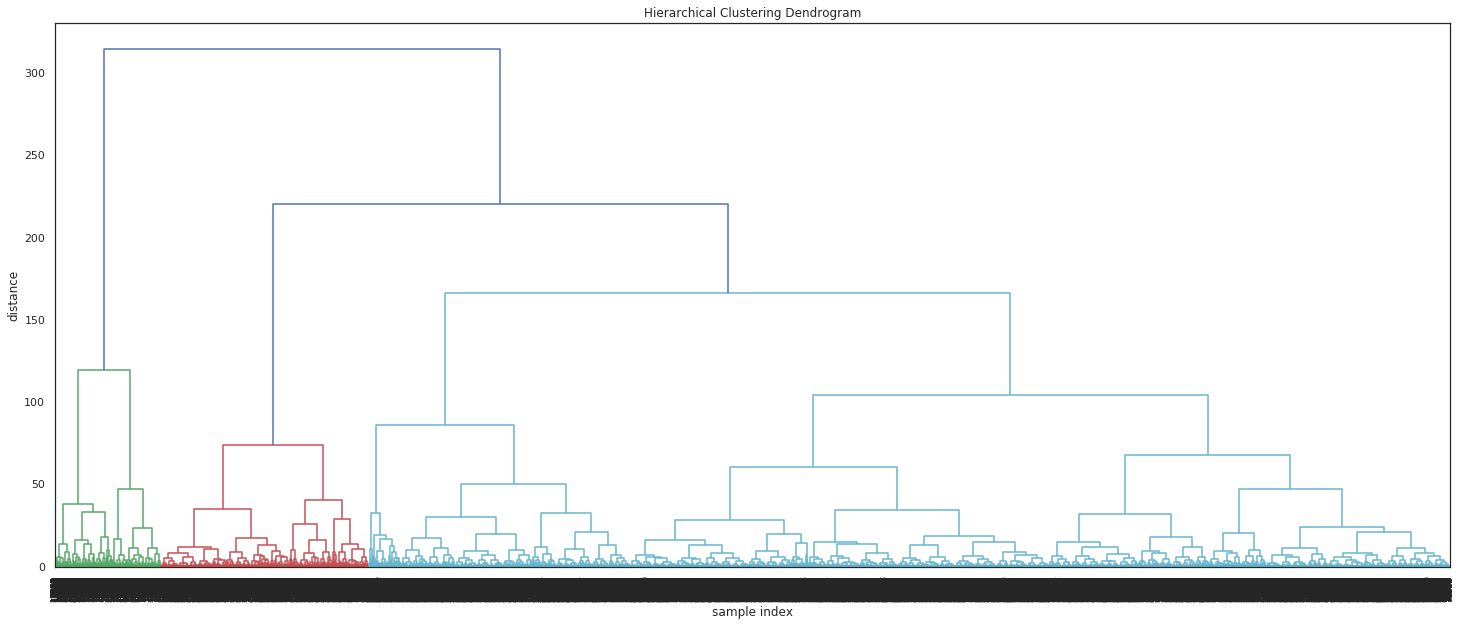

In [787]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, 'ward')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

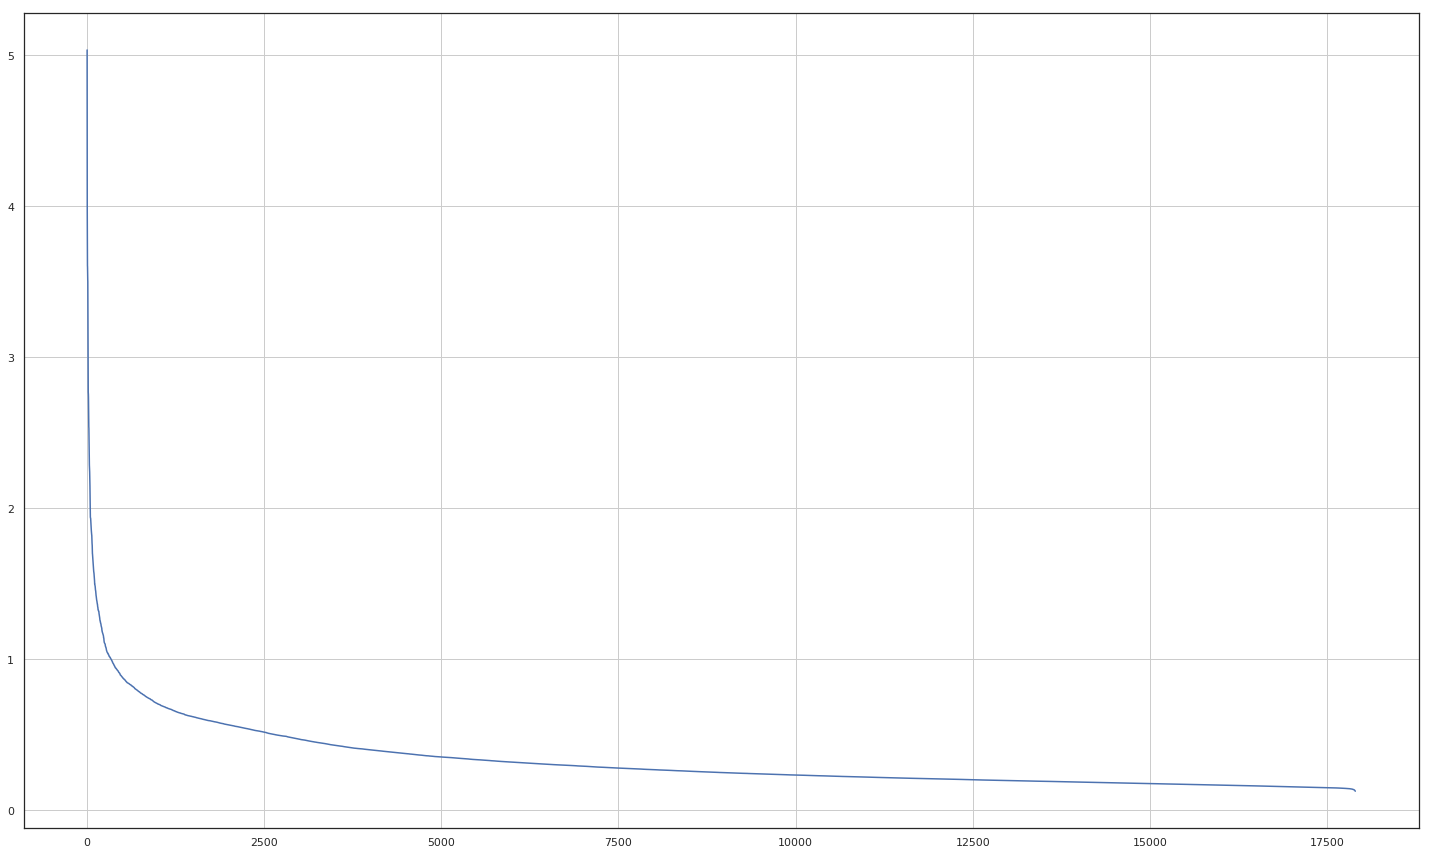

In [788]:
## Now trying to run DBSCAN on PCA compoments

## Since data is tightly packed, more core data points could have neighbours in
## close vicinity; hence trying with min samples = 35 and then searching for values
## near the elbow in the graph.

from sklearn.neighbors import NearestNeighbors

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (25,15))
sns.set(style="white")
ns = 35
nbrs = NearestNeighbors(n_neighbors=ns).fit(X)
distances, indices = nbrs.kneighbors(X)
distanceDec = sorted(distances[:,ns-1], reverse = True)
ax = plt.plot(list(range(1,X.shape[0]+1)), distanceDec)
plt.grid()
plt.show()

In [789]:
# Now creating grid near the EPS values as seen from Nearest Neighbour graph to find out
# values of EPS resulting in max rand Index

from sklearn.cluster import DBSCAN

# add fix parameters
fixed_params = {"min_samples": 35 } 

# Add variable parameters
param_grid = {"eps": np.arange(0.4, 1, 0.05)}


scoreDict = {}

for params in make_generator(param_grid):
    params.update(fixed_params)
    dbClus = DBSCAN(**params)
    y_pred = dbClus.fit_predict(X)
    scoreDict[str(params)] = (adjusted_rand_score(imputedPulsarDf['class'].values, y_pred), silhouette_score(X, y_pred)) 

In [790]:
pd.DataFrame(scoreDict, index = ['Adjusted Rand Index', 'Silhouette Score']).T.sort_values(by=['Adjusted Rand Index'], \
                                                                                       ascending=False)

Adjusted Rand Index  \
{'eps': 0.55, 'min_samples': 35}                           0.693870   
{'eps': 0.5, 'min_samples': 35}                            0.669956   
{'eps': 0.45, 'min_samples': 35}                           0.633132   
{'eps': 0.4, 'min_samples': 35}                            0.575255   
{'eps': 0.6, 'min_samples': 35}                            0.206560   
{'eps': 0.6499999999999999, 'min_samples': 35}             0.148996   
{'eps': 0.7, 'min_samples': 35}                            0.110896   
{'eps': 0.75, 'min_samples': 35}                           0.063969   
{'eps': 0.7999999999999999, 'min_samples': 35}             0.034615   
{'eps': 0.8499999999999999, 'min_samples': 35}             0.024657   
{'eps': 0.8999999999999999, 'min_samples': 35}             0.024535   
{'eps': 0.9499999999999998, 'min_samples': 35}             0.021387   

                                                Silhouette Score  
{'eps': 0.55, 'min_samples': 35}                        0.464114  
{'eps': 0.5, 'min_samples': 35}                         0.502343  
{'eps': 0.45, 'min_samples': 35}                        0.493497  
{'eps': 0.4, 'min_samples': 35}                         0.482580  
{'eps': 0.6, 'min_samples': 35}                         0.500576  
{'eps': 0.6499999999999999, 'min_samples': 35}          0.524402  
{'eps': 0.7, 'min_samples': 35}                         0.542751  
{'eps': 0.75, 'min_samples': 35}                        0.546569  
{'eps': 0.7999999999999999, 'min_samples': 35}          0.539199  
{'eps': 0.8499999999999999, 'min_samples': 35}          0.555079  
{'eps': 0.8999999999999999, 'min_samples': 35}          0.559579  
{'eps': 0.9499999999999998, 'min_samples': 35}          0.576567

In [791]:
## Now further searching near the eps = 0.55 since that produced max rand index score

# Update the param Grid
param_grid = {"eps": np.arange(0.49, 0.60, 0.01)}


scoreDict = {}

for params in make_generator(param_grid):
    params.update(fixed_params)
    dbClus = DBSCAN(**params)
    y_pred = dbClus.fit_predict(X)
    scoreDict[str(params)] = (adjusted_rand_score(imputedPulsarDf['class'].values, y_pred), silhouette_score(X, y_pred))

pd.DataFrame(scoreDict, index = ['Adjusted Rand Index', 'Silhouette Score']).T.sort_values(by=['Adjusted Rand Index'], \
                                                                                       ascending=False)

Adjusted Rand Index  \
{'eps': 0.56, 'min_samples': 35}                           0.696817   
{'eps': 0.55, 'min_samples': 35}                           0.693870   
{'eps': 0.54, 'min_samples': 35}                           0.692680   
{'eps': 0.53, 'min_samples': 35}                           0.685533   
{'eps': 0.52, 'min_samples': 35}                           0.681602   
{'eps': 0.51, 'min_samples': 35}                           0.680671   
{'eps': 0.49, 'min_samples': 35}                           0.671529   
{'eps': 0.5, 'min_samples': 35}                            0.669956   
{'eps': 0.5700000000000001, 'min_samples': 35}             0.579849   
{'eps': 0.5800000000000001, 'min_samples': 35}             0.576737   
{'eps': 0.5900000000000001, 'min_samples': 35}             0.566609   

                                                Silhouette Score  
{'eps': 0.56, 'min_samples': 35}                        0.463396  
{'eps': 0.55, 'min_samples': 35}                        0.464114  
{'eps': 0.54, 'min_samples': 35}                        0.397848  
{'eps': 0.53, 'min_samples': 35}                        0.393507  
{'eps': 0.52, 'min_samples': 35}                        0.393499  
{'eps': 0.51, 'min_samples': 35}                        0.480492  
{'eps': 0.49, 'min_samples': 35}                        0.502295  
{'eps': 0.5, 'min_samples': 35}                         0.502343  
{'eps': 0.5700000000000001, 'min_samples': 35}          0.510892  
{'eps': 0.5800000000000001, 'min_samples': 35}          0.514969  
{'eps': 0.5900000000000001, 'min_samples': 35}          0.547314

In [792]:
## Now running with values of Eps and MinPts that have yielded best Rand Index

dbClus = DBSCAN(min_samples=35, eps=0.56)
y_pred = dbClus.fit_predict(X)
np.unique(y_pred)

array([-1,  0,  1,  2])

In [793]:
adjusted_rand_score(imputedPulsarDf['class'].values, y_pred)

0.6968167346745997

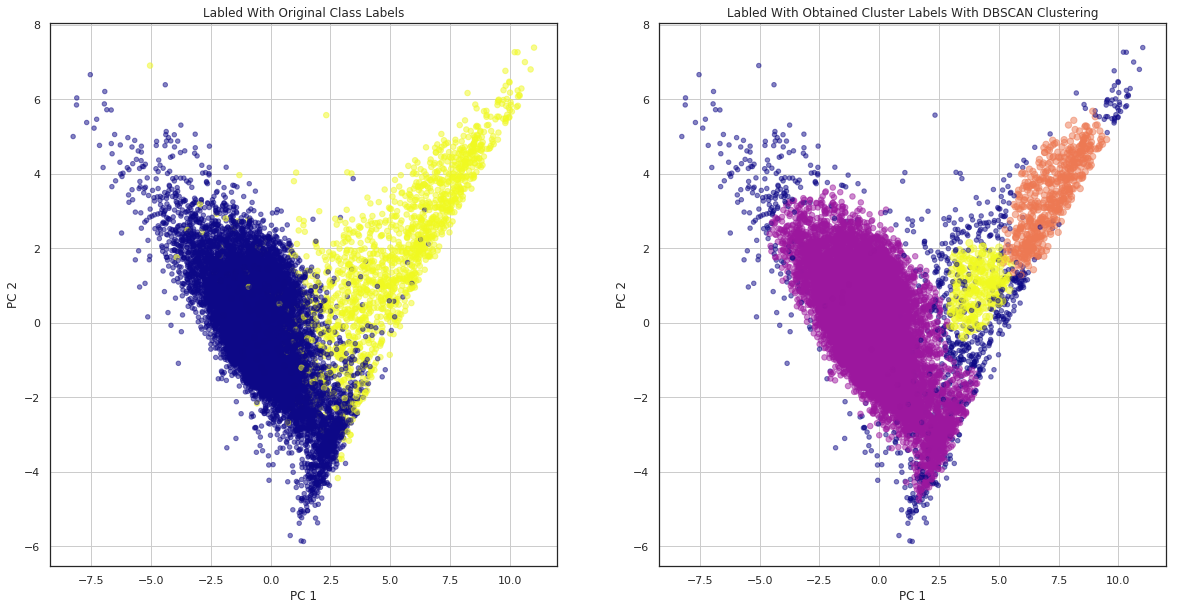

In [794]:
# Visualizing DBSCAN cluserting

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.set(style="white")
ax[0].scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["class"], cmap ="plasma", s = (df_pca["class"] + 2)*10, alpha = 0.5)

ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[0].set_title("Labled With Original Class Labels")
ax[0].grid()

ax[1].scatter(x = X[: , 0], y = X[: , 1] , \
            c = (dbClus.labels_ + 1) , cmap ="plasma", s = ((dbClus.labels_ + 1) + 2)*10, alpha = 0.5)

ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 2")
ax[1].set_title("Labled With Obtained Cluster Labels With DBSCAN Clustering")

ax[1].grid()

In [795]:
## Now trying the Guassian Mixture Model on PCA components

from sklearn.mixture import GaussianMixture

# add fix parameters
fixed_params = {"n_init": 100, "random_state": 999 } 

# Add variable parameters
param_grid = {"n_components": range(1, 6), "covariance_type": ['spherical', 'diag', 'full', 'tied'] }

scoreDictGMM = {}

for params in make_generator(param_grid):
    params.update(fixed_params)
    gmmClus = GaussianMixture(**params)
    y_pred = gmmClus.fit_predict(X)
    scoreDictGMM[str(params)] = (adjusted_rand_score(imputedPulsarDf['class'].values, y_pred), gmmClus.bic(X))

pd.DataFrame(scoreDictGMM, index = ['Adjusted Rand Index', 'BIC Score']).T.sort_values(by=['Adjusted Rand Index'], \
                                                                                       ascending=False)

Adjusted Rand Index  \
{'covariance_type': 'tied', 'n_components': 3, ...             0.793180   
{'covariance_type': 'spherical', 'n_components'...             0.729804   
{'covariance_type': 'tied', 'n_components': 2, ...             0.654935   
{'covariance_type': 'full', 'n_components': 2, ...             0.629337   
{'covariance_type': 'full', 'n_components': 3, ...             0.464060   
{'covariance_type': 'tied', 'n_components': 4, ...             0.457402   
{'covariance_type': 'tied', 'n_components': 5, ...             0.452844   
{'covariance_type': 'diag', 'n_components': 2, ...             0.368488   
{'covariance_type': 'full', 'n_components': 4, ...             0.359924   
{'covariance_type': 'spherical', 'n_components'...             0.341452   
{'covariance_type': 'diag', 'n_components': 3, ...             0.334313   
{'covariance_type': 'diag', 'n_components': 4, ...             0.314658   
{'covariance_type': 'spherical', 'n_components'...             0.264807   
{'covariance_type': 'full', 'n_components': 5, ...             0.179360   
{'covariance_type': 'diag', 'n_components': 5, ...             0.118537   
{'covariance_type': 'spherical', 'n_components'...             0.116928   
{'covariance_type': 'diag', 'n_components': 1, ...             0.000000   
{'covariance_type': 'tied', 'n_components': 1, ...             0.000000   
{'covariance_type': 'full', 'n_components': 1, ...             0.000000   
{'covariance_type': 'spherical', 'n_components'...             0.000000   

                                                        BIC Score  
{'covariance_type': 'tied', 'n_components': 3, ...  161009.899480  
{'covariance_type': 'spherical', 'n_components'...  175634.513598  
{'covariance_type': 'tied', 'n_components': 2, ...  166618.167614  
{'covariance_type': 'full', 'n_components': 2, ...  153339.083276  
{'covariance_type': 'full', 'n_components': 3, ...  151557.799392  
{'covariance_type': 'tied', 'n_components': 4, ...  158128.627948  
{'covariance_type': 'tied', 'n_components': 5, ...  154992.428114  
{'covariance_type': 'diag', 'n_components': 2, ...  167102.298859  
{'covariance_type': 'full', 'n_components': 4, ...  147798.182534  
{'covariance_type': 'spherical', 'n_components'...  169968.188010  
{'covariance_type': 'diag', 'n_components': 3, ...  163102.064745  
{'covariance_type': 'diag', 'n_components': 4, ...  160703.585242  
{'covariance_type': 'spherical', 'n_components'...  163689.465102  
{'covariance_type': 'full', 'n_components': 5, ...  146318.562454  
{'covariance_type': 'diag', 'n_components': 5, ...  157366.033139  
{'covariance_type': 'spherical', 'n_components'...  161104.655690  
{'covariance_type': 'diag', 'n_components': 1, ...  184870.767991  
{'covariance_type': 'tied', 'n_components': 1, ...  184900.145324  
{'covariance_type': 'full', 'n_components': 1, ...  184900.145324  
{'covariance_type': 'spherical', 'n_components'...  200654.039239

In [796]:
## Viz with 2 cluster components with Adj Rand Index = .72

gmmClus2Comp = GaussianMixture(covariance_type = 'spherical', n_components =  2, n_init = 100, random_state = 999)
y_pred = gmmClus2Comp.fit_predict(X)

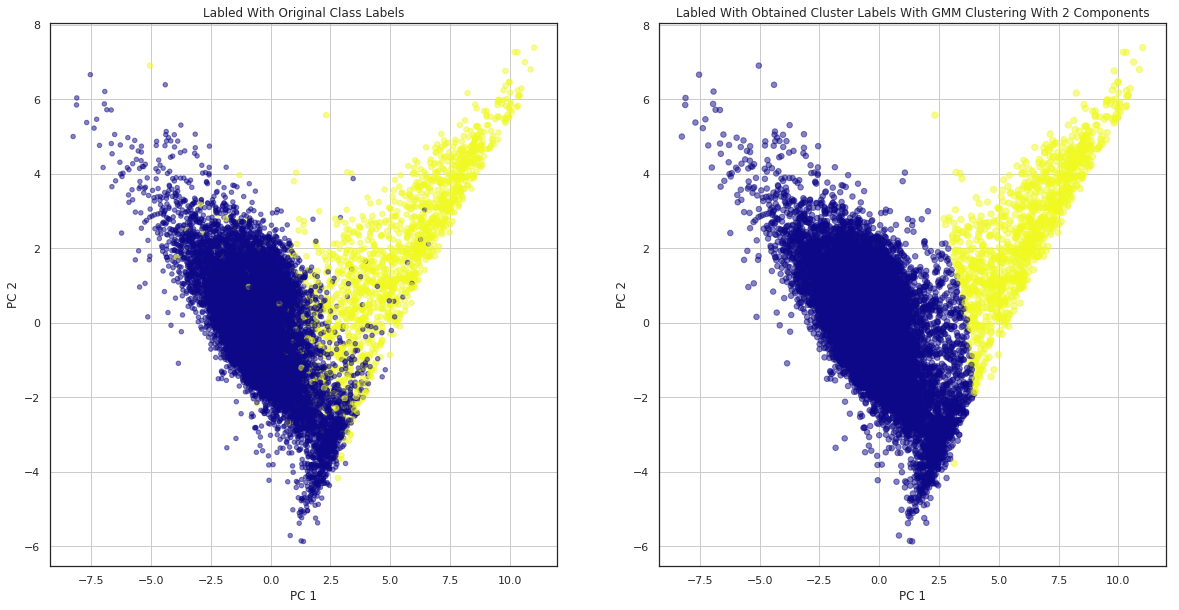

In [797]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.set(style="white")
ax[0].scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["class"], cmap ="plasma", s = (df_pca["class"] + 2)*10, alpha = 0.5)

ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[0].set_title("Labled With Original Class Labels")
ax[0].grid()

ax[1].scatter(x = X[: , 0], y = X[: , 1] , \
            c = (y_pred + 1) , cmap ="plasma", s = ((y_pred + 1) + 2)*10, alpha = 0.5)

ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 2")
ax[1].set_title("Labled With Obtained Cluster Labels With GMM Clustering With 2 Components")

ax[1].grid()

In [798]:
## Viz with 3 cluster components with Adj Rand Index = .79

gmmClus3Comp = GaussianMixture(covariance_type = 'tied', n_components =  3, n_init = 100, random_state = 999)
y_pred = gmmClus3Comp.fit_predict(X)

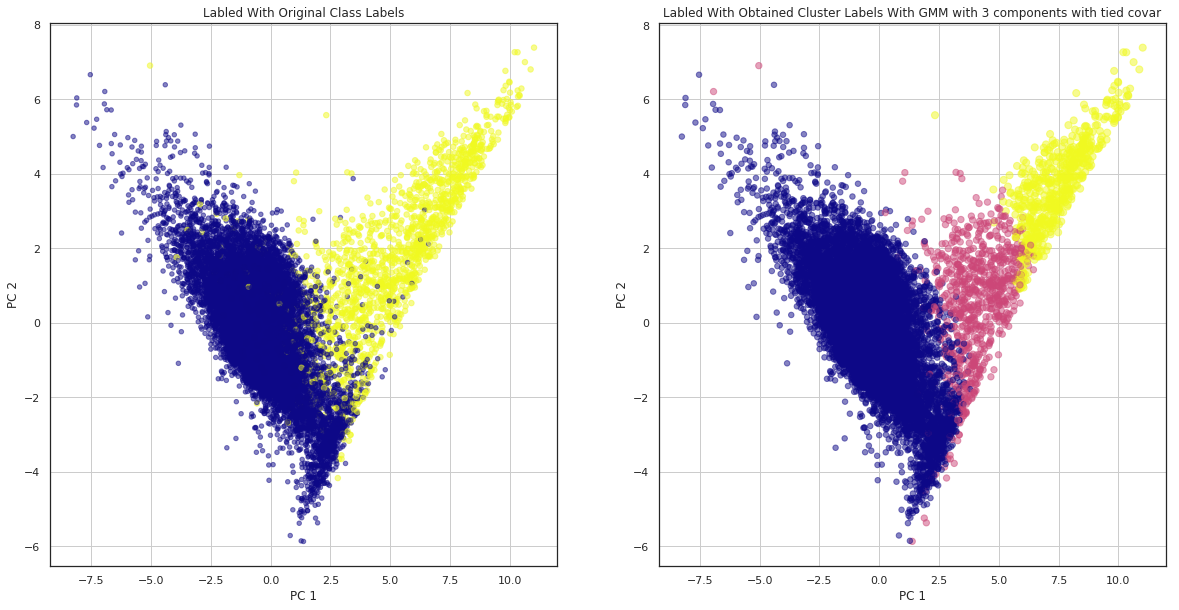

In [799]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.set(style="white")
ax[0].scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["class"], cmap ="plasma", s = (df_pca["class"] + 2)*10, alpha = 0.5)

ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[0].set_title("Labled With Original Class Labels")
ax[0].grid()

ax[1].scatter(x = X[: , 0], y = X[: , 1] , \
            c = (y_pred + 1) , cmap ="plasma", s = ((y_pred + 1) + 2)*10, alpha = 0.5)

ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 2")
ax[1].set_title("Labled With Obtained Cluster Labels With GMM with 3 components with tied covar")

ax[1].grid()

GMM clustering with 3 components and 'tied' covariance is providing the best Adj Rand Index. A look at the visualization above confirms that its breaking up the pulsars cluster in two parts. So we can next combine these subclusters and plot the obtained clusters again.

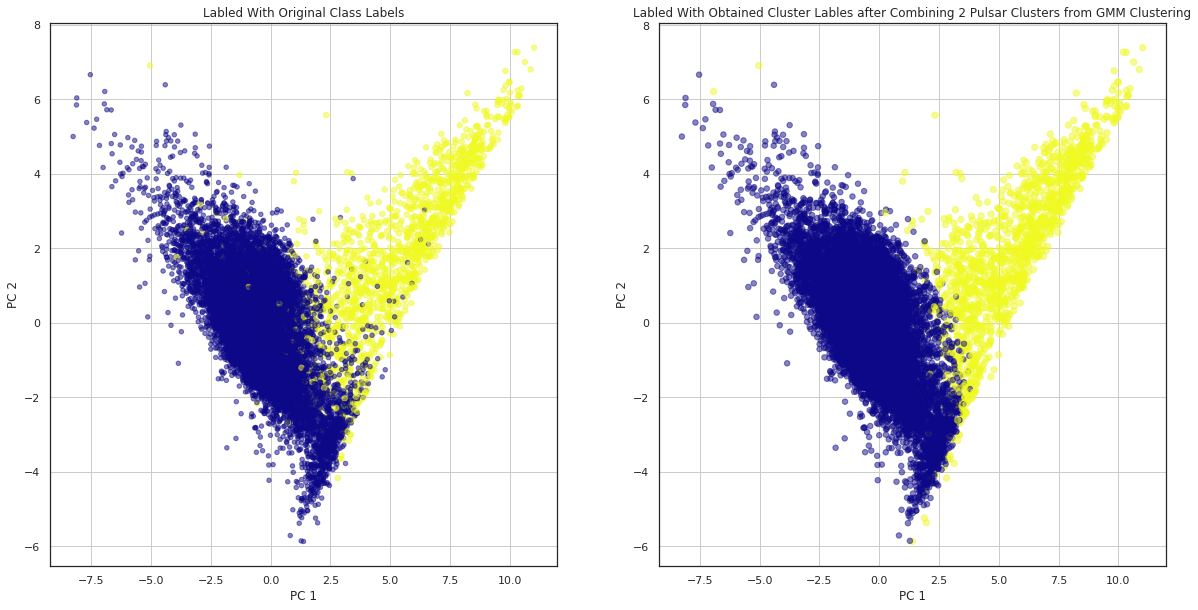

In [800]:
# Since Pulsars cluster has been broken down into 2 subclusters, combine and clusters 1 and 2
# and plot again
y_pred[y_pred == 2] = 1

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.set(style="white")
ax[0].scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["class"], cmap ="plasma", s = (df_pca["class"] + 2)*10, alpha = 0.5)

ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[0].set_title("Labled With Original Class Labels")
ax[0].grid()

ax[1].scatter(x = X[: , 0], y = X[: , 1] , \
            c = (y_pred + 1) , cmap ="plasma", s = ((y_pred + 1) + 2)*10, alpha = 0.5)

ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 2")
ax[1].set_title("Labled With Obtained Cluster Lables after Combining 2 Pulsar Clusters from GMM Clustering")

ax[1].grid()

In [801]:
print("Adjusted Rand Index after Combining 2 Sub clusters as found in GMM Model with 3 components = %s" \
      %adjusted_rand_score(imputedPulsarDf['class'].values, y_pred))

Adjusted Rand Index after Combining 2 Sub clusters as found in GMM Model with 3 components = 0.7996629966193992


In [822]:
## Now Trying Various Spectral Clustering Techniques on PCA components
from sklearn.cluster import SpectralClustering

# add fix parameters
fixed_params = {"n_jobs": -1, "random_state": 999 } 

# Add variable parameters
param_grid = {"n_clusters": range(2, 5), "gamma": np.arange(0.8, 2.1, 0.2) }

scoreDictSpecRBF = {}

for params in make_generator(param_grid):
    params.update(fixed_params)
    specClus = SpectralClustering(**params)
    y_pred = specClus.fit_predict(X)
    scoreDictSpecRBF[str(params)] = (adjusted_rand_score(imputedPulsarDf['class'].values, y_pred), silhouette_score(X, y_pred))

pd.DataFrame(scoreDictSpecRBF, index = ['Adjusted Rand Index', 'Silhouette Score']).T.sort_values(by=['Adjusted Rand Index'], \
                                                                                       ascending=False)


Adjusted Rand Index  \
{'gamma': 1.7999999999999998, 'n_clusters': 3, ...             0.748313   
{'gamma': 1.5999999999999999, 'n_clusters': 3, ...             0.747217   
{'gamma': 1.4, 'n_clusters': 3, 'n_jobs': -1, '...             0.744339   
{'gamma': 1.2, 'n_clusters': 3, 'n_jobs': -1, '...             0.742919   
{'gamma': 1.0, 'n_clusters': 3, 'n_jobs': -1, '...             0.740924   
{'gamma': 0.8, 'n_clusters': 3, 'n_jobs': -1, '...             0.732994   
{'gamma': 1.9999999999999998, 'n_clusters': 2, ...             0.611202   
{'gamma': 1.7999999999999998, 'n_clusters': 2, ...             0.610070   
{'gamma': 1.5999999999999999, 'n_clusters': 2, ...             0.607232   
{'gamma': 1.4, 'n_clusters': 2, 'n_jobs': -1, '...             0.603247   
{'gamma': 1.2, 'n_clusters': 2, 'n_jobs': -1, '...             0.600722   
{'gamma': 1.0, 'n_clusters': 2, 'n_jobs': -1, '...             0.598189   
{'gamma': 0.8, 'n_clusters': 2, 'n_jobs': -1, '...             0.594165   
{'gamma': 1.7999999999999998, 'n_clusters': 4, ...             0.593541   
{'gamma': 1.9999999999999998, 'n_clusters': 4, ...             0.589548   
{'gamma': 1.5999999999999999, 'n_clusters': 4, ...             0.565005   
{'gamma': 1.4, 'n_clusters': 4, 'n_jobs': -1, '...             0.563455   
{'gamma': 1.2, 'n_clusters': 4, 'n_jobs': -1, '...             0.561553   
{'gamma': 1.0, 'n_clusters': 4, 'n_jobs': -1, '...             0.558125   
{'gamma': 0.8, 'n_clusters': 4, 'n_jobs': -1, '...             0.551424   
{'gamma': 1.9999999999999998, 'n_clusters': 3, ...             0.002986   

                                                    Silhouette Score  
{'gamma': 1.7999999999999998, 'n_clusters': 3, ...          0.565508  
{'gamma': 1.5999999999999999, 'n_clusters': 3, ...          0.566101  
{'gamma': 1.4, 'n_clusters': 3, 'n_jobs': -1, '...          0.567632  
{'gamma': 1.2, 'n_clusters': 3, 'n_jobs': -1, '...          0.569053  
{'gamma': 1.0, 'n_clusters': 3, 'n_jobs': -1, '...          0.571899  
{'gamma': 0.8, 'n_clusters': 3, 'n_jobs': -1, '...          0.575225  
{'gamma': 1.9999999999999998, 'n_clusters': 2, ...          0.668022  
{'gamma': 1.7999999999999998, 'n_clusters': 2, ...          0.668157  
{'gamma': 1.5999999999999999, 'n_clusters': 2, ...          0.668518  
{'gamma': 1.4, 'n_clusters': 2, 'n_jobs': -1, '...          0.669017  
{'gamma': 1.2, 'n_clusters': 2, 'n_jobs': -1, '...          0.669448  
{'gamma': 1.0, 'n_clusters': 2, 'n_jobs': -1, '...          0.669867  
{'gamma': 0.8, 'n_clusters': 2, 'n_jobs': -1, '...          0.670369  
{'gamma': 1.7999999999999998, 'n_clusters': 4, ...          0.424644  
{'gamma': 1.9999999999999998, 'n_clusters': 4, ...          0.423199  
{'gamma': 1.5999999999999999, 'n_clusters': 4, ...          0.486329  
{'gamma': 1.4, 'n_clusters': 4, 'n_jobs': -1, '...          0.486215  
{'gamma': 1.2, 'n_clusters': 4, 'n_jobs': -1, '...          0.486131  
{'gamma': 1.0, 'n_clusters': 4, 'n_jobs': -1, '...          0.485826  
{'gamma': 0.8, 'n_clusters': 4, 'n_jobs': -1, '...          0.485355  
{'gamma': 1.9999999999999998, 'n_clusters': 3, ...          0.383955

In [825]:
specClus3clus = SpectralClustering(gamma= 1.8, n_clusters= 3, n_jobs= -1, random_state= 999)
y_pred = specClus3clus.fit_predict(X)

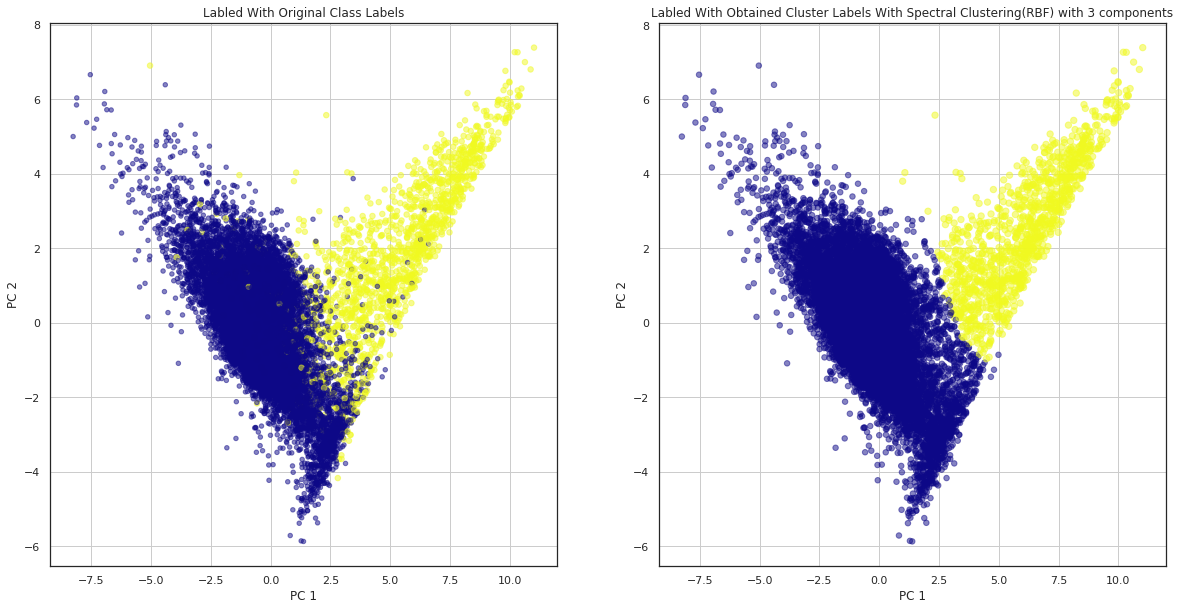

In [835]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.set(style="white")
ax[0].scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["class"], cmap ="plasma", s = (df_pca["class"] + 2)*10, alpha = 0.5)

ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[0].set_title("Labled With Original Class Labels")
ax[0].grid()

ax[1].scatter(x = X[: , 0], y = X[: , 1] , \
            c = (specClus3clus.labels_ + 1) , cmap ="plasma", s = ((specClus3clus.labels_ + 1) + 2)*10, alpha = 0.5)

ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 2")
ax[1].set_title("Labled With Obtained Cluster Labels With Spectral Clustering(RBF) with 3 components")

ax[1].grid()

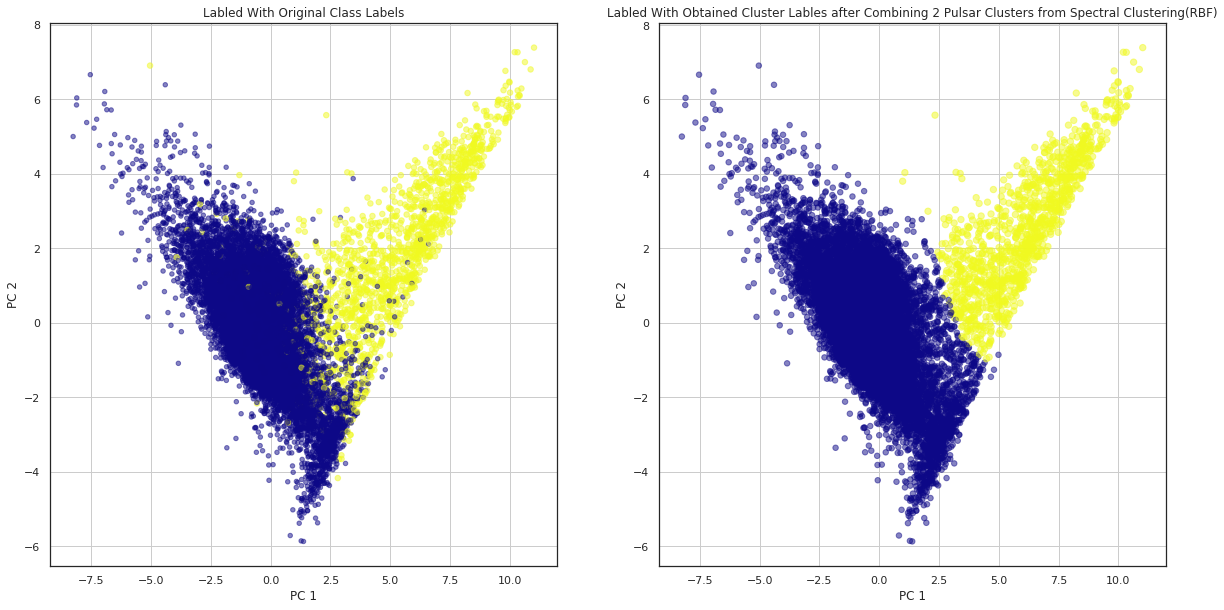

In [836]:
# Since Pulsars cluster has been broken down into 2 subclusters, combine and clusters 1 and 2
# and plot again
y_pred[y_pred == 2] = 1

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.set(style="white")
ax[0].scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["class"], cmap ="plasma", s = (df_pca["class"] + 2)*10, alpha = 0.5)

ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[0].set_title("Labled With Original Class Labels")
ax[0].grid()

ax[1].scatter(x = X[: , 0], y = X[: , 1] , \
            c = (y_pred + 1) , cmap ="plasma", s = ((y_pred + 1) + 2)*10, alpha = 0.5)

ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 2")
ax[1].set_title("Labled With Obtained Cluster Lables after Combining 2 Pulsar Clusters from Spectral Clustering(RBF)")

ax[1].grid()

In [837]:
print("Adjusted Rand Index after Combining 2 Sub clusters as found in Spectral Clustering(RBF) with 3 components = %s" \
      %adjusted_rand_score(imputedPulsarDf['class'].values, y_pred))

Adjusted Rand Index after Combining 2 Sub clusters as found in Spectral Clustering(RBF) with 3 components = 0.7537073406302497


In [846]:
## Now Trying  affinity = nearest neighbours in Spectral Clustering Techniques on PCA components

# add fix parameters
fixed_params = {"n_jobs": -1, "random_state": 999, 'affinity': 'nearest_neighbors' } 

# Add variable parameters
param_grid = {"n_clusters": [2,3], "n_neighbors": range(145,150,1) }

scoreDictSpecNN = {}

for params in make_generator(param_grid):
    params.update(fixed_params)
    specClusNN = SpectralClustering(**params)
    y_pred = specClusNN.fit_predict(X)
    scoreDictSpecNN[str(params)] = (adjusted_rand_score(imputedPulsarDf['class'].values, y_pred), silhouette_score(X, y_pred))

pd.DataFrame(scoreDictSpecNN, index = ['Adjusted Rand Index', 'Silhouette Score']).T.sort_values(by=['Adjusted Rand Index'], \
                                                                                       ascending=False)

Adjusted Rand Index  \
{'n_neighbors': 146, 'n_clusters': 2, 'n_jobs':...             0.770754   
{'n_neighbors': 147, 'n_clusters': 2, 'n_jobs':...             0.770754   
{'n_neighbors': 148, 'n_clusters': 2, 'n_jobs':...             0.770393   
{'n_neighbors': 145, 'n_clusters': 2, 'n_jobs':...             0.770275   
{'n_neighbors': 149, 'n_clusters': 2, 'n_jobs':...             0.770033   
{'n_neighbors': 145, 'n_clusters': 3, 'n_jobs':...             0.167548   
{'n_neighbors': 149, 'n_clusters': 3, 'n_jobs':...             0.167280   
{'n_neighbors': 148, 'n_clusters': 3, 'n_jobs':...             0.167218   
{'n_neighbors': 147, 'n_clusters': 3, 'n_jobs':...             0.167122   
{'n_neighbors': 146, 'n_clusters': 3, 'n_jobs':...             0.166248   

                                                    Silhouette Score  
{'n_neighbors': 146, 'n_clusters': 2, 'n_jobs':...          0.633988  
{'n_neighbors': 147, 'n_clusters': 2, 'n_jobs':...          0.633988  
{'n_neighbors': 148, 'n_clusters': 2, 'n_jobs':...          0.633930  
{'n_neighbors': 145, 'n_clusters': 2, 'n_jobs':...          0.634119  
{'n_neighbors': 149, 'n_clusters': 2, 'n_jobs':...          0.633860  
{'n_neighbors': 145, 'n_clusters': 3, 'n_jobs':...          0.338999  
{'n_neighbors': 149, 'n_clusters': 3, 'n_jobs':...          0.338665  
{'n_neighbors': 148, 'n_clusters': 3, 'n_jobs':...          0.338728  
{'n_neighbors': 147, 'n_clusters': 3, 'n_jobs':...          0.338683  
{'n_neighbors': 146, 'n_clusters': 3, 'n_jobs':...          0.338133

In [847]:
specClusNN = SpectralClustering(n_neighbors= 146, n_clusters= 2, n_jobs= -1, random_state= 999, \
                                affinity= 'nearest_neighbors')
y_pred = specClusNN.fit_predict(X)

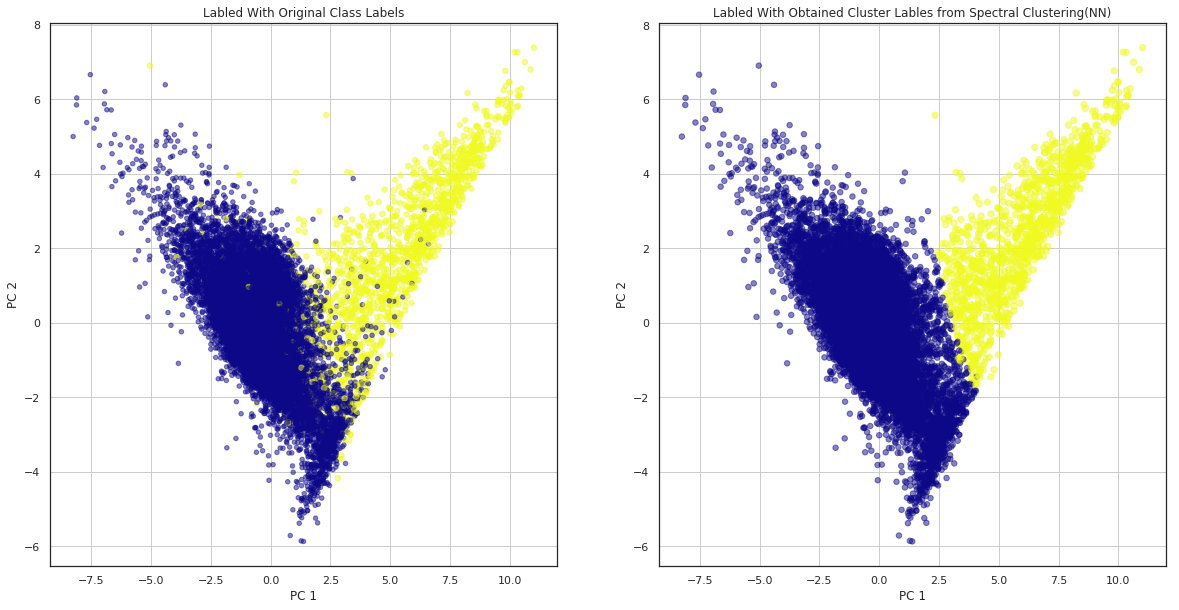

In [849]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,10))
sns.set(style="white")
ax[0].scatter(x = df_pca[pca_weight_strings[0]], y = df_pca[pca_weight_strings[1]] , \
            c = df_pca["class"], cmap ="plasma", s = (df_pca["class"] + 2)*10, alpha = 0.5)

ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")
ax[0].set_title("Labled With Original Class Labels")
ax[0].grid()

ax[1].scatter(x = X[: , 0], y = X[: , 1] , \
            c = (y_pred + 1) , cmap ="plasma", s = ((y_pred + 1) + 2)*10, alpha = 0.5)

ax[1].set_xlabel("PC 1")
ax[1].set_ylabel("PC 2")
ax[1].set_title("Labled With Obtained Cluster Lables from Spectral Clustering(NN)")

ax[1].grid()

In [853]:
## Now Trying  affinity = precomputed in Spectral Clustering Techniques on PCA components

# this is taken from Dr Larson's Notebook
from sklearn.metrics.pairwise import pairwise_distances

d = pairwise_distances(X, metric= 'euclidean')

d = np.exp(- d**2 / (2.* 0.1**2)) # convert from euclidean distance to similarity

# add fix parameters
#fixed_params = {"n_jobs": -1, "random_state": 999, 'affinity': 'precomputed' } 

# Add variable parameters
#param_grid = {"n_clusters": [2,3], "degree": [2,3] }

#scoreDictSpecPre = {}

#for params in make_generator(param_grid):
#    params.update(fixed_params)
#    specClusPre = SpectralClustering(**params)
#    y_pred = specClusPre.fit_predict(d)
#    scoreDictSpecPre[str(params)] = (adjusted_rand_score(imputedPulsarDf['class'].values, y_pred), silhouette_score(X, y_pred))
#
#pd.DataFrame(scoreDictSpecPre, index = ['Adjusted Rand Index', 'Silhouette Score']).T.sort_values(by=['Adjusted Rand Index'], \
#                                                                                       ascending=False)

In [ ]:
specClusPre = SpectralClustering(n_clusters = 2, n_jobs= -1, random_state= 999, affinity = 'precomputed')
y_pred = specClusPre.fit_predict(d)
adjusted_rand_score(imputedPulsarDf['class'].values, y_pred)

In [802]:
# Sample K-Means on Whole DataSet
k = 2
X = scaledPulsarData
kmeans = KMeans(n_clusters=k, random_state=999)
y_pred = kmeans.fit_predict(X)
silhouette_score(X, kmeans.labels_)

0.615609409394205

## Clustering in Pre Processing stage for Classification

In [1]:
### Seperate the class and predictor variables

X = scaledPulsarData
y = imputedPulsarDf['class'].values

NameError: name 'scaledPulsarData' is not defined

In [78]:
## Since we have class imbalance, create a stratified Shuffle 80/20 split CV object
from sklearn.model_selection import StratifiedShuffleSplit

num_cv_iterations = 10
stratified_cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state=999)
                         
print(stratified_cv_object)

StratifiedShuffleSplit(n_splits=10, random_state=999, test_size=0.2,
            train_size=None)


In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline


scoring = {'F1_Score': 'f1', 'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'Precision': 'precision', \
          'Recall': 'recall'}

clf = SVC(C=1.0, kernel='rbf', degree=3 , gamma='auto', random_state=999, class_weight="balanced")

scores = cross_validate(clf, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

testCol = ['test_F1_Score', 'test_AUC', 'test_Accuracy', 'test_Precision', 'test_Recall' ]
trainCol = ['train_F1_Score', 'train_AUC', 'train_Accuracy', 'train_Precision', 'train_Recall' ]

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

fit_time  score_time  test_F1_Score  train_F1_Score  test_AUC  train_AUC  \
0  7.344087    2.101836       0.860399        0.874047  0.970675   0.977259   
1  7.373630    1.898369       0.879643        0.872635  0.974503   0.975718   
2  7.111540    1.908732       0.876437        0.865779  0.969561   0.978370   
3  7.433530    1.802450       0.872781        0.870537  0.968482   0.976642   
4  7.237479    2.007261       0.883652        0.864962  0.971997   0.975363   
5  7.566842    2.102877       0.845390        0.869848  0.968076   0.976502   
6  7.362104    1.836149       0.868035        0.872317  0.977644   0.974857   
7  7.793238    2.177879       0.888567        0.864162  0.978062   0.975351   
8  2.292783    1.591047       0.875184        0.867435  0.975714   0.974634   
9  2.211663    1.672395       0.878613        0.862379  0.971832   0.976586   

   test_Accuracy  train_Accuracy  test_Precision  train_Precision  \
0       0.972626        0.975765        0.807487         0.833795   
1       0.977374        0.975555        0.857971         0.834377   
2       0.975978        0.973949        0.828804         0.819482   
3       0.975978        0.974927        0.847701         0.825581   
4       0.977933        0.973809        0.854701         0.819236   
5       0.969553        0.974857        0.790451         0.826804   
6       0.974860        0.975485        0.836158         0.833797   
7       0.978492        0.973739        0.845730         0.820865   
8       0.976257        0.974298        0.844193         0.821843   
9       0.976536        0.973250        0.835165         0.815217   

   test_Recall  train_Recall  
0     0.920732      0.918383  
1     0.902439      0.914569  
2     0.929878      0.917620  
3     0.899390      0.920671  
4     0.914634      0.916095  
5     0.908537      0.917620  
6     0.902439      0.914569  
7     0.935976      0.912281  
8     0.908537      0.918383  
9     0.926829      0.915332


 Mean values for Performance Metrices on Train Set are .......


train_F1_Score  train_AUC  train_Accuracy  train_Precision  train_Recall
0         0.86841   0.976128        0.974563           0.8251      0.916552


 Mean values for Performance Metrices on Test Set are .......


test_F1_Score  test_AUC  test_Accuracy  test_Precision  test_Recall
0        0.87287  0.972655       0.975559        0.834836     0.914939

In [80]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=20)),
    ("svm", SVC(C=1.0, kernel='rbf', degree=3 , gamma='auto', random_state=999, class_weight="balanced")),
])

scores = cross_validate(pipeline, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

fit_time  score_time  test_F1_Score  train_F1_Score  test_AUC  train_AUC  \
0  14.311651    3.738974       0.829404        0.844082  0.963869   0.970250   
1  14.091505    3.524558       0.829545        0.843186  0.961797   0.971281   
2  13.500434    4.218083       0.848315        0.839673  0.968365   0.970754   
3  13.014239    3.991831       0.856725        0.843783  0.960114   0.970129   
4  12.189286    3.617590       0.847025        0.843605  0.966957   0.968651   
5  13.611126    3.824653       0.832402        0.840283  0.956410   0.971490   
6  13.965838    3.495139       0.827684        0.840467  0.963490   0.968391   
7  13.495920    4.143680       0.860367        0.833216  0.970596   0.969402   
8   6.318843    2.023676       0.837341        0.841770  0.967899   0.967962   
9   6.055911    1.903707       0.842999        0.833567  0.968970   0.969454   

   test_Accuracy  train_Accuracy  test_Precision  train_Precision  \
0       0.965642        0.969269        0.760814         0.788220   
1       0.966480        0.969060        0.776596         0.786658   
2       0.969832        0.968501        0.786458         0.786285   
3       0.972626        0.969200        0.823034         0.787698   
4       0.969832        0.969339        0.791005         0.791444   
5       0.966480        0.968431        0.768041         0.782752   
6       0.965922        0.968501        0.771053         0.783641   
7       0.972346        0.967035        0.800525         0.776169   
8       0.967877        0.968781        0.781003         0.785337   
9       0.968994        0.966895        0.786280         0.772284   

   test_Recall  train_Recall  
0     0.911585      0.908467  
1     0.890244      0.908467  
2     0.920732      0.900839  
3     0.893293      0.908467  
4     0.911585      0.903127  
5     0.908537      0.906941  
6     0.893293      0.906178  
7     0.929878      0.899314  
8     0.902439      0.906941  
9     0.908537      0.905416


 Mean values for Performance Metrices on Train Set are .......


train_F1_Score  train_AUC  train_Accuracy  train_Precision  train_Recall
0        0.840363   0.969776        0.968501         0.784049      0.905416


 Mean values for Performance Metrices on Test Set are .......


test_F1_Score  test_AUC  test_Accuracy  test_Precision  test_Recall
0       0.841181  0.964847       0.968603        0.784481     0.907012

In [81]:
## Running Grid Search to find number of clusters
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))

grid = GridSearchCV(pipeline, \
                   param_grid = param_grid, cv = StratifiedShuffleSplit(n_splits=5, test_size  = 0.2, random_state=999), \
                   verbose=2, n_jobs=-1, scoring=scoring, refit='Accuracy', \
                   return_train_score=True)

grid.fit(X, y=y)


print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed: 50.3min finished


The best parameters are {'kmeans__n_clusters': 10} with a score of 0.97


In [82]:
## Running with best params found with Grid Search ie 10 clusters.

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=10)),
    ("svm", SVC(C=1.0, kernel='rbf', degree=3 , gamma='auto', random_state=999, class_weight="balanced")),
])

scores = cross_validate(pipeline, X, y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)

fit_time  score_time  test_F1_Score  train_F1_Score  test_AUC  train_AUC  \
0  8.505534    2.831484       0.838983        0.845442  0.965625   0.970349   
1  8.153043    3.184665       0.825532        0.846154  0.963522   0.970317   
2  7.898030    2.669054       0.848315        0.839787  0.969005   0.970825   
3  7.904673    2.597289       0.857562        0.842963  0.962541   0.969374   
4  8.755617    3.060028       0.854676        0.846485  0.966362   0.968195   
5  8.344572    3.284878       0.831933        0.838641  0.955501   0.970305   
6  8.584238    2.827914       0.840000        0.846044  0.964113   0.969022   
7  8.130925    2.751625       0.868946        0.835874  0.967306   0.968863   
8  4.634622    1.467062       0.843305        0.840014  0.961784   0.968008   
9  4.002774    1.507211       0.845390        0.834917  0.967757   0.969127   

   test_Accuracy  train_Accuracy  test_Precision  train_Precision  \
0       0.968156        0.969689        0.781579         0.792919   
1       0.965642        0.969828        0.771883         0.793587   
2       0.969832        0.968501        0.786458         0.785904   
3       0.972905        0.969060        0.827195         0.787417   
4       0.971788        0.970108        0.809264         0.798917   
5       0.966480        0.968152        0.769430         0.782178   
6       0.968715        0.969828        0.790323         0.793980   
7       0.974302        0.967663        0.815508         0.780795   
8       0.969274        0.968501        0.791444         0.785146   
9       0.969553        0.967244        0.790451         0.775163   

   test_Recall  train_Recall  
0     0.905488      0.905416  
1     0.887195      0.906178  
2     0.920732      0.901602  
3     0.890244      0.906941  
4     0.905488      0.900076  
5     0.905488      0.903890  
6     0.896341      0.905416  
7     0.929878      0.899314  
8     0.902439      0.903127  
9     0.908537      0.904653


 Mean values for Performance Metrices on Train Set are .......


train_F1_Score  train_AUC  train_Accuracy  train_Precision  train_Recall
0        0.841632   0.969438        0.968857         0.787601      0.903661


 Mean values for Performance Metrices on Test Set are .......


test_F1_Score  test_AUC  test_Accuracy  test_Precision  test_Recall
0       0.845464  0.964352       0.969665        0.793354     0.905183

In [90]:
## Now trying DBSCAN clustering algo with Grid Search 
from sklearn.cluster import DBSCAN

cls = DBSCAN()

ypred = cls.fit_predict(X)

clf = SVC(C=1.0, kernel='rbf', degree=3 , gamma='auto', random_state=999, class_weight="balanced")

scores = cross_validate(clf, ypred , y=y, cv=stratified_cv_object, n_jobs=-1, scoring=scoring)

display(pd.DataFrame(scores))

print("\n Mean values for Performance Metrices on Train Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[trainCol].mean()).T)


print("\n Mean values for Performance Metrices on Test Set are .......")
display(pd.DataFrame(pd.DataFrame(scores)[testCol].mean()).T)


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.